# **Capstone Project Module 2: EDA Transjakarta Transaction**
---
(Almira Dita - JCDS2104)

In [3]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import warnings 
warnings.filterwarnings('ignore')


In [4]:
# Import Data
df = pd.read_csv('Transjakarta.csv')

# Context Data
---

## **Latar Belakang**
PT Transportasi Jakarta (TransJakarta) adalah sebuah perusahaan Badan Usaha Milik Daerah (BUMD) yang bergerak di bidang layanan transportasi umum, khususnya bus. Secara umum, perusahaan tersebut memiliki 3 layanan transportasi publik yaitu, Transjakarta, Royal Trans, dan Mikrotrans JakLingko dengan rincian sebagai berikut:

#### 3 Layanan TransJakarta
| Jenis Transportasi                 | Deskripsi                                                   | Harga   |
|-----------------------------------|-------------------------------------------------------------|---------|
| 1. Transjakarta                   | Menawarkan perjalanan dalam kota                           | Rp3.500       |
| 2. Royal Trans                    | Menawarkan perjalanan lintas kota                           | Rp20.000   |
| 3. Mikrotrans JakLingko           | Menawarkan perjalanan dalam kota dengan kapasitas bangku lebih sedikit dan bisa berhenti dimana saja tanpa harus berhenti di halte pemberhentian | Rp0 |

## **Pernyataan Masalah**
Direktur Pelayanan & Bisnis PT Transportasi Jakarta berusaha untuk **mengevaluasi dan meningkatkan efektivitas operasional serta infrastruktur Transjakarta**. Apakah rute yang digunakan telah efisien dan apakah infrastruktur yang ada telah mencukupi. Dengan begitu, Direktur akan berupaya untuk meningkatkan efektifitas operasional Transjakarta. Oleh karena itu, Direktur merekrut *data analyst* untuk membantu dalam optimalisasi perjalanan Transjakarta. 

### **Problem**
**Bagaimana langkah-langkah yang dapat diambil oleh Direktur Pelayanan & Bisnis PT Transportasi Jakarta dalam rangka mengoptimalisasi operasional Transjakarta?**

Dalam menjawab pertanyaan tersebut, kita dapat melakukan analisis seperti berikut:
1. **Analisis Rute Perjalanan** :
    1. Rute/Corridor yang paling sering digunakan
    2. Halte yang paling ramai
2. **Analisis Waktu Perjalanan** :
    1. Peak Hour 
    2. Waktu tap in dan tap out terbanyak
    3. Waktu rute dan halte terpadat terjadi di jam berapa 
    4. Waktu yang dibutuhkan dalam melakukan 1x perjalanan
3. **Analisis Penumpang Transjakarta** 
    1. Distribusi jenis kelamin penumpang
    2. Volume penumpang di setiap halte
    3. Distribusi usia penumpang

# Data Understanding
---


## **What the data is about?**
- Data ini merupakan data mengenai transaksi penggunaan salah satu layanan transportasi umum di DKI Jakarta yaitu, Transjakarta [dataset](https://www.kaggle.com/datasets/dikisahkan/transjakarta-transportation-transaction)
- Data diambil berdasarkan data layanan Transjakarta yang beroperasi dan diperbarui setiap 1 bulan sekali (https://ppid.transjakarta.co.id/pusat-data/data-terbuka/transjakarta-gtfs-feed)
- Data kali ini merupakan data transaksi penggunaan TransJakarta pada bulan April 2023 dan terdiri dari 3 layanan yaitu, Transjakarta, Royal Trans, dan Angkot JakLingko
- Data transaksi Transjakarta yang dimaksud meliputi detail pembayaran (metode pembayaran), informasi penumpang, dan rute perjalanan yang dilakukan (corridorID, tap in, tap out, date & time)
- Tipe Transjakarta:
    1. Bus : Rp3.500
    2. Royal Trans : Rp20.000
    3. Angkot JakLingko: Rp0

## **Columns Raw Data**

| Column Name       | Description                                                                           |
|-------------------|--------------------------------------------------------------                         |
| transID           | Unique transaction id for every transaction                                           |
| payCardID         | Customers main identifier. The card customers use as a ticket for entrance and exit.  |
| payCardBank       | Customers card bank issuer name                                                       |
| payCardName       | Customers name that is embedded in the card.                                          |
| payCardSex        | Customers sex that is embedded in the card                                            |
| payCardBirthDate  | Customers birth year                                                                  |
| corridorID        | Corridor ID / Route ID as key for route grouping.                                     |
| corridorName      | Corridor Name / Route Name contains Start and Finish for each route.                  |
| direction         | 0 for Go, 1 for Back. Direction of the route.                                         |
| tapInStops        | Tap In (entrance) Stops ID for identifying stops name                                 |
| tapInStopsName    | Tap In (entrance) Stops Name where customers tap in.                                  |
| tapInStopsLat     | Latitude of Tap In Stops                                                              |
| tapInStopsLon     | Longitude of Tap In Stops                                                             |
| stopStartSeq      | Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.                 |
| tapInTime         | Time of tap in. Date and time                                                         |
| tapOutStops       | Tap Out (Exit) Stops ID for identifying stops name                                    |
| tapOutStopsName   | Tap out (exit) Stops Name where customers tap out.                                    |
| tapOutStopsLat    | Latitude of Tap Out Stops                                                             |
| tapOutStopsLon    | Longitude of Tap Out Stops                                                            |
| stopEndSeq        | Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.                 |
| tapOutTime        | Time of tap out. Date and time                                                        |
| payAmount         | The number of what customers pay. Some are free. Some not                             |

## **Display Dataset**

In [5]:
# Display a piece of dataset
pd.options.display.max_columns=30
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


Contoh informasi dalam data (Baris Index ke-0)
- Bajragin Usada merupakan seorang laki-laki yang berumur 15 tahun (2023-2008) dan menggunakan Transjakarta rute Matraman Baru-Ancol untuk balik (direction = 1) dari Pal Putih ke Tegalan
- Bayar menggunakan kartu emoney
- Terdapat 5 stops/pemberhentian selama perjalanan
- Berangkat pada tanggal 2023-04-03 05:21:44 dan sampai tujuan tanggal 2023-04-03 06:00:53

# Data Cleaning & Data Wrangling
---

## **Preparation**
**Tujuan** : Mencari anomali data dan *treatment* apa yang harus dilakukan

Berikut merupakan outline apa saja yang harus dilakukan dalam data cleaning:
1. Melihat tipe data dari masing-masing kolom, apakah sudah sesuai atau belum
2. Membuat kolom baru yang sekiranya diperlukan untuk melakukan analisis lebih lanjut
3. Menganalisa missing values yang ada pada masing-masing kolom
4. Menganalisa duplicate values
5. Menganalisa outliers

### Check Data Information

In [6]:
# Detailed Data Information
df_desc = []

for i in df.columns:
    df_desc.append([i,df[i].dtypes,
                    df[i].isna().sum(),
                    round((df[i].isna().sum()/len(df)*100),2),
                    df[i].nunique(),
                    df[i].sample(3).values])

df_deepInfo = pd.DataFrame(df_desc, columns = ['Columns', 'dataType', 'null', '% null', 'unique','uniqueSample'])
df_deepInfo

,Columns,dataType,null,% null,unique,uniqueSample
0,transID,object,0,0.00,37900,"[WQOJ758A2V57LT, OATV870M9F27KT, EHKF343D2V15IJ]"
1,payCardID,int64,0,0.00,2000,"[377951303236425, 4122123545871, 4306399682236..."
2,payCardBank,object,0,0.00,6,"[dki, emoney, brizzi]"
3,payCardName,object,0,0.00,1993,"[Maryadi Simanjuntak, Nyoman Waskita, S.Ked, W..."
4,payCardSex,object,0,0.00,2,"[F, M, M]"
5,payCardBirthDate,int64,0,0.00,67,"[1984, 1981, 1996]"
6,corridorID,object,1257,3.32,221,"[6U, JAK.34, JAK.27]"
7,corridorName,object,1930,5.09,216,"[Rusun Cakung Barat - Pulo Gadung, Pancoran - ..."
8,direction,float64,0,0.00,2,"[0.0, 1.0, 1.0]"
9,tapInStops,object,1213,3.20,2570,"[B00115P, B02140P, B06058P]"


## Change Data Types
Column 'tapInTime' & 'tapOutTime' harus di convert dari tipe data "object" menjadi "datetime"

In [7]:
# Convert ke datetime
df[['tapInTime','tapOutTime']] = df[['tapInTime','tapOutTime']].apply(pd.to_datetime)

In [8]:
# Check data types setelah converting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  int64         
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  int64         
 6   corridorID        36643 non-null  object        
 7   corridorName      35970 non-null  object        
 8   direction         37900 non-null  float64       
 9   tapInStops        36687 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

Column 'tapInTime' & 'tapOutTime' berhasil memiliki tipe data "datetime"!

## New Columns

| Column Name       | Description                                                                           |
|-------------------|--------------------------------------------------------------                         |
|1. TapInHour| Waktu ketika Tap In (dalam bentuk jam)|
|2. TapOutHour | Waktu ketika Tap Out (dalam bentuk jam) |
|3. TapInDays | Hari ketika Tap In |
|4. TapOutDays | Hari ketika Tap Out |
|5. TimeDifference | Selisih waktu ketika Tap In dan Tap Out |
|6. Age | Usia penumpang |
|7. jenisTransjakarta | Membagi tipe Transjakarta berdasarkan payAmount yang dibayar oleh penumpang |
|8. ageGroup | Kelompok usia penumpang |

**Columns for Tap In and Tap Out in Time**

In [9]:
# Create kolom baru untuk tap in dan tap out hour
df['tapInHour'] = df['tapInTime'].dt.hour
df['tapOutHour'] = df['tapOutTime'].dt.hour

In [10]:
# Check unique value tapInHour (lihat ada value yang ambigu/tidak)
df['tapInHour'].unique()

array([ 5,  6, 17, 16,  7,  8,  9, 21, 19, 18, 20, 11, 12, 14, 13, 10, 15],
      dtype=int32)

Value dalam kolom 'tapInHour' sudah sesuai. Tidak ada value yang ambigu dalam kolom terseubut

In [11]:
# Check unique value tapOutHour (lihat ada value yang ambigu/tidak)
df['tapOutHour'].unique()

array([ 6.,  5., nan,  7., 19., 18., 17., 16.,  9.,  8., 10., 11., 22.,
       20., 21., 23., 13., 15., 14., 12.,  0.])

In [12]:
# Check tapOutHour dengan value 0
df[df['tapOutHour']==0.0]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour
37615,JEES739W6T40LL,3563362178943707,dki,drg. Michelle Puspita,F,1968,2E,Rusun Rawa Bebek - Kodamar,0.0,B00554P,Gg. Sawo 1,-6.20176,106.93513,11,2023-04-24 21:46:56,B01850P,Kayu Mas,-6.17911,106.90255,25.0,2023-04-25 00:30:08,0.0,21,0.0


Pada kolom 'tapOutHour' terdapat value 0 karena terdapat satu baris index dimana waktu tap out (exit) di jam 00:30:08. Hal ini menimbulkan value dalam kolom 'tapOutHour' menjadi 0. 

Demi analisis data yang lebih rapih, kita akan coba mengubah value tersebut menjadi jam 24:00:00 dimana value nya menjadi 24. 
Kita ubah value dalam kolom 'tapOutHour' yang 0 menjadi 24 sebagai berikut. 

In [13]:
# Ubah value agar sesuai berdasarkan baris index
df.loc[37615,'tapOutHour'] = 24.0

In [14]:
# Check kembali apakah sudah sesuai
df[df['tapOutHour']==24.0]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour
37615,JEES739W6T40LL,3563362178943707,dki,drg. Michelle Puspita,F,1968,2E,Rusun Rawa Bebek - Kodamar,0.0,B00554P,Gg. Sawo 1,-6.20176,106.93513,11,2023-04-24 21:46:56,B01850P,Kayu Mas,-6.17911,106.90255,25.0,2023-04-25 00:30:08,0.0,21,24.0


Karena hanya satu baris saja yang memiliki anomali tersebut, sehingga kita cukup memanggil baris index dan nama kolom saja untuk mengganti value nya menjadi 24. 

**Columns for Tap In and Tap Out in Days**

In [15]:
# Create kolom baru untuk hari tap in dan tap out
df['tapInDays'] = df['tapInTime'].dt.day_name()
df['tapOutDays'] = df['tapOutTime'].dt.day_name()

**Columns for time difference between Tap in and Tap Out in minutes**

In [16]:
# Create kolom baru untuk lama perjalanan
df['timeDifference'] = (round((df['tapOutTime'] - df['tapInTime']).dt.total_seconds()/60))

**Columns for Customers Age assumming the current year is 2023**

In [17]:
# Create kolom baru untuk umur penumpang
df['Age'] = 2023 - df['payCardBirthDate']

**Columns for Identifying Types of Transjakarta**

Tipe transjakarta akan di identifikasi berdasarkan jumlah harga yang dibayar setiap penumpang. Hal ini didasari oleh tarif flat yang diberlakukan oleh Transjakarta untuk setiap jenis transportasinya. 

In [18]:
# Create function untuk identifikasi jenis Transjakarta
def assign_jenis_transjakarta(payAmount):
    if payAmount == 0.0:
        return 'Mikrotrans JakLingko'
    elif payAmount == 3500.0:
        return 'Transjakarta'
    elif payAmount == 20000.0:
        return 'Royal Trans'
    else:
        return 'Tidak Diketahui'

df['jenisTransjakarta'] =  df['payAmount'].apply(assign_jenis_transjakarta)

**Columns for Age Grouping**

In [19]:
# Check unique values 
df['Age'].unique()

array([15, 26, 31, 45, 41, 30, 49, 32, 19, 39, 35, 21, 48, 12, 20, 42, 14,
       40, 24, 16, 44, 63, 28, 22, 33, 55, 38, 13, 34, 17, 37, 58, 18, 57,
       29, 51, 54, 53, 23, 70, 46, 11, 36, 27, 52, 67, 43, 25, 50, 77, 47,
       64, 56, 72, 66, 75, 62, 59, 60, 61, 74, 69, 76, 71, 65, 68, 73])

Usia penumpang paling muda adalah 11 tahun dan paling tua adalah 77 tahun. Maka dari itu, kita akan coba grouping usia penumpang dimana setiap kategorinya memiliki rentang usia 7 tahun. 

Contoh: kategori pertama dimulai dari rentang 11-17 Tahun, 18-24 Tahun, 25-31 Tahun, hingga kategori terakhir 74-80 tahun.

In [20]:
# Create function untuk identifikasi kelompok usia 
def assign_usia_penumpang(Age):
    if Age >= 11 and Age < 18:
        return '11-17'
    elif Age >= 18 and Age < 25:
        return '18-24'
    elif Age >= 25 and Age < 32:
        return '25-31'
    elif Age >= 32 and Age < 40:
        return '32-39'
    elif Age >= 40 and Age < 47:
        return '40-46'
    elif Age >= 47 and Age < 54:
        return '47-53'
    elif Age >= 53 and Age < 60:
        return '53-59'
    elif Age >= 60 and Age < 67:
        return '60-66'
    elif Age >= 67 and Age < 74:
        return '67-73'
    else :
        return '74-80'

df['ageGroup'] = df['Age'].apply(assign_usia_penumpang)

In [21]:
# Check kolom-kolom baru dalam dataset
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDays,tapOutDays,timeDifference,Age,jenisTransjakarta,ageGroup
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6.0,Monday,Monday,39.0,15,Transjakarta,11-17
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6.0,Monday,Monday,57.0,26,Transjakarta,25-31
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6.0,Monday,Monday,52.0,31,Transjakarta,25-31
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6.0,Monday,Monday,43.0,45,Transjakarta,40-46
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6.0,Monday,Monday,39.0,41,Transjakarta,40-46


Kolom-kolom baru berhasil ditambahkan ke dalam dataset!

## Missing Values

Setelah menganalisa missing values pada setiap kolom, berikut langkah-langkah yang akan dilakukan:

1. Column 'payAmount' NaN di fillna sesuai dengan rute perjalanan
2. Column 'corridorName' NaN, tetapi memiliki 'corridorID' bisa diisi berdasarkan 'corridorID' (dan sebaliknya)
3. Column 'tapOutTime' NaN di drop
    - Columns "tapOutHour", "tapOutDays", "timeDifference" NaN di drop karena tidak ada keterangan tapOutTime
4. Cek Column 'tapInStops' NaN
    - Apakah kolom tsb bisa di drop saja? Karena bisa hanya menggunakan column 'tapInStopsName'
5. Cek Column 'tapOutStops' NaN 
    - Apakah kolom tsb bisa di drop saja? Karena bisa hanya menggunakan column 'tapOutStopsName'
6. Column 'stopEndSeq' NaN di drop


In [22]:
# Check jumlah missing values
df.isna().sum()

transID                 0
payCardID               0
payCardBank             0
payCardName             0
payCardSex              0
payCardBirthDate        0
corridorID           1257
corridorName         1930
direction               0
tapInStops           1213
tapInStopsName          0
tapInStopsLat           0
tapInStopsLon           0
stopStartSeq            0
tapInTime               0
tapOutStops          2289
tapOutStopsName      1344
tapOutStopsLat       1344
tapOutStopsLon       1344
stopEndSeq           1344
tapOutTime           1344
payAmount            1007
tapInHour               0
tapOutHour           1344
tapInDays               0
tapOutDays           1344
timeDifference       1344
Age                     0
jenisTransjakarta       0
ageGroup                0
dtype: int64

### 1. Missing Value: Column "payAmount"

In [23]:
# Check missing values pada kolom payAmount
df[df['payAmount'].isna()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDays,tapOutDays,timeDifference,Age,jenisTransjakarta,ageGroup
11,IIEK980X1O23NZ,347204308990092,emoney,R.M. Labuh Laksmiwati,F,1984,M7B,BKN - Blok M,1.0,P00254,Tendean,-6.240213,106.83102,12,2023-04-03 06:22:10,P00129,Mampang Prapatan,-6.242699,106.82572,14.0,2023-04-03 06:50:21,NaN,6,6.0,Monday,Monday,28.0,39,Tidak Diketahui,32-39
76,VHUC320U1S58CB,567286069354,flazz,"Dt. Atmaja Suartini, M.Farm",F,2000,JAK.48B,Stasiun Tebet - Kampung Melayu,0.0,B02272P,Masjid As Sudairi,-6.220626,106.85910,1,2023-04-03 06:12:01,B01732P,Jatinegara Timur,-6.220486,106.86825,11.0,2023-04-03 06:57:35,NaN,6,6.0,Monday,Monday,46.0,23,Tidak Diketahui,18-24
97,KFYK655N1H73XS,6590854673757012,dki,Bajragin Najmudin,M,1986,3H,Jelambar - Kota,0.0,P00087,Jelambar,-6.166548,106.78651,0,2023-04-03 06:03:19,P00138,Museum Fatahillah,-6.133930,106.81209,9.0,2023-04-03 06:35:04,NaN,6,6.0,Monday,Monday,32.0,37,Tidak Diketahui,32-39
169,IWEH403G6J82OS,30428250357040,bni,Estiawan Hastuti,M,2008,M7B,BKN - Blok M,1.0,B02114P,Lapangan Blok S,-6.237011,106.81421,6,2023-04-03 05:20:08,B00290P,Dammara,-6.254190,106.83146,18.0,2023-04-03 06:08:02,NaN,5,6.0,Monday,Monday,48.0,15,Tidak Diketahui,11-17
198,WFVC738E7S60SH,3540286623681182,dki,"Karimah Pangestu, S.Kom",M,1968,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,1.0,B05695P,Telkom Tebet,-6.224064,106.85160,21,2023-04-03 05:24:09,B02320P,Masjid Jami Al Mamur Bukit Duri,-6.225059,106.85606,23.0,2023-04-03 05:54:13,NaN,5,5.0,Monday,Monday,30.0,55,Tidak Diketahui,53-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37661,PPYR040S6J76TM,4706129919148789,dki,Dt. Galuh Suryono,F,1987,M7B,BKN - Blok M,0.0,B03195P,RSIA Duren Tiga 1,-6.253592,106.84130,10,2023-04-16 13:52:59,B02877P,PLN Duren Tiga 1,-6.254389,106.83416,13.0,2023-04-16 16:38:08,NaN,13,16.0,Sunday,Sunday,165.0,36,Tidak Diketahui,32-39
37674,JXJU834Q7X41YL,4558670606659888636,brizzi,Tantri Siregar,M,1996,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,1.0,B03305P,Sahid Sudirman Center,-6.211191,106.81794,10,2023-04-21 14:08:16,B03318P,Sawo Kecik Raya,-6.224852,106.85489,22.0,2023-04-21 16:56:14,NaN,14,16.0,Friday,Friday,168.0,27,Tidak Diketahui,25-31
37741,DEMB799H8M93RH,572311836488,flazz,Cornelia Haryanti,F,1989,3H,Jelambar - Kota,0.0,P00072,Glodok,-6.144500,106.81545,7,2023-04-07 13:19:18,P00013,Kota,-6.136790,106.81490,10.0,2023-04-07 14:05:43,NaN,13,14.0,Friday,Friday,46.0,34,Tidak Diketahui,32-39
37861,EDZA126J0W55DK,3520040370814007,dki,Farah Latupono,M,2010,M1H,Tanah Abang - St. Gondangdia,0.0,B01232P,Jln. Kb. Kacang VIII,-6.187181,106.81827,8,2023-04-30 15:52:34,B02972P,Pospol Jati Bunder,-6.189707,106.81317,15.0,2023-04-30 18:38:25,NaN,15,18.0,Sunday,Sunday,166.0,13,Tidak Diketahui,11-17


In [24]:
# Check corridorID untuk missing values di payAmount
df[df['payAmount'].isna()]['corridorID'].unique()

array(['M7B', 'JAK.48B', '3H', 'JAK.48A', 'M1H', nan], dtype=object)

Fill missing values di kolom 'payAmount' sesuai dengan tarif pada rute 'M7B', 'JAK.48B', '3H', 'JAK.48A', 'M1H'

In [25]:
# Check corridorID untuk missing values di payAmount
df[df['payAmount'].isna()][['corridorID','payAmount']]

,corridorID,payAmount
11,M7B,NaN
76,JAK.48B,NaN
97,3H,NaN
169,M7B,NaN
198,JAK.48A,NaN
...,...,...
37661,M7B,NaN
37674,JAK.48A,NaN
37741,3H,NaN
37861,M1H,NaN


In [26]:
# Check value payAmount di setiap corridorID 
df[df['corridorID']=='JAK.48A']

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDays,tapOutDays,timeDifference,Age,jenisTransjakarta,ageGroup
198,WFVC738E7S60SH,3540286623681182,dki,"Karimah Pangestu, S.Kom",M,1968,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,1.0,B05695P,Telkom Tebet,-6.224064,106.85160,21,2023-04-03 05:24:09,B02320P,Masjid Jami Al Mamur Bukit Duri,-6.225059,106.85606,23.0,2023-04-03 05:54:13,NaN,5,5.0,Monday,Monday,30.0,55,Tidak Diketahui,53-59
219,HVGS687T2A21US,180074627743328,emoney,"Dt. Karsa Nasyidah, M.Kom.",F,1990,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,1.0,B00115P,UPT. LLHD 2,-6.225501,106.83489,17,2023-04-03 06:27:04,B05695P,Telkom Tebet,-6.224064,106.85160,21.0,2023-04-03 07:13:02,NaN,6,7.0,Monday,Monday,46.0,33,Tidak Diketahui,32-39
498,NERK958N2X72YK,3540286623681182,dki,"Karimah Pangestu, S.Kom",M,1968,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,0.0,B02122P,Lapangan Ros,-6.225111,106.85460,2,2023-04-03 17:09:54,B01444P,Jln. Pam Baru,-6.204796,106.80946,24.0,2023-04-03 18:27:21,NaN,17,18.0,Monday,Monday,77.0,55,Tidak Diketahui,53-59
519,ZSDW524F5P28MF,180074627743328,emoney,"Dt. Karsa Nasyidah, M.Kom.",F,1990,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,0.0,B03395P,Pal Batu 3,-6.225075,106.84149,5,2023-04-03 17:30:20,B01904P,Kel. Benhil,-6.201552,106.80809,21.0,2023-04-03 19:14:50,NaN,17,19.0,Monday,Monday,104.0,33,Tidak Diketahui,32-39
798,KADZ329A6K51VW,3540286623681182,dki,"Karimah Pangestu, S.Kom",M,1968,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,1.0,B05695P,Telkom Tebet,-6.224064,106.85160,21,2023-04-04 06:53:46,B02320P,Masjid Jami Al Mamur Bukit Duri,-6.225059,106.85606,23.0,2023-04-04 07:33:13,NaN,6,7.0,Tuesday,Tuesday,39.0,55,Tidak Diketahui,53-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37487,DOYO076Z1M99OY,4844470388320,online,"Rina Gunarto, S.Sos",M,1984,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,0.0,B02396P,Mega Kuningan,-6.224556,106.82677,10,2023-04-19 18:07:29,B01833P,Karet Pedurenan 1,-6.221933,106.82093,12.0,2023-04-19 19:08:35,NaN,18,19.0,Wednesday,Wednesday,61.0,39,Tidak Diketahui,32-39
37530,QRAE645J8D49EE,4140911047830363924,brizzi,Yance Aryani,M,1978,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,0.0,B01833P,Karet Pedurenan 1,-6.221933,106.82093,12,2023-04-19 18:42:22,B03307P,Sampoerna Strategic,-6.217152,106.81892,14.0,2023-04-19 20:38:16,NaN,18,20.0,Wednesday,Wednesday,116.0,45,Tidak Diketahui,40-46
37590,AYBV658T8X28IW,630485154219,flazz,Jaga Saputra,M,2012,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,0.0,B02154P,Lotte Mall Kuningan 1,-6.223320,106.82290,11,2023-04-19 19:49:04,B01205P,Jln. Karet Pasar Baru Barat I,-6.204690,106.81640,18.0,2023-04-19 21:08:55,NaN,19,21.0,Wednesday,Wednesday,80.0,11,Tidak Diketahui,11-17
37642,ITGQ997P3K72LV,30076208696652,bni,"Tgk. Oliva Nainggolan, M.Pd",F,2010,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,1.0,B05954P,Jln. Tiong,-6.219243,106.81991,12,2023-04-05 13:53:09,B02215P,Kuningan 18,-6.225239,106.83015,16.0,2023-04-05 15:20:04,NaN,13,15.0,Wednesday,Wednesday,87.0,13,Tidak Diketahui,11-17


Dapat diisi berdasarkan kolom 'corridorID' karena value payAmount tersebut ada di dalam data. Kita akan mencoba untuk melengkapinya dengan mengisi missing values berdasarkan payAmount masing-masing corridorID.
1. M7B &rarr; Rp3.500
2. JAK.48B &rarr; Rp0
3. 3H &rarr; Rp3.500
4. JAK.48A &rarr; Rp0
5. M1H &rarr; Rp3.500

**1. Fill missing values di kolom 'payAmount' dengan rute 'JAK.48B' dan 'JAK.48A' senilai 0 rupiah**

In [27]:
# Fill missing value
df['payAmount'] = np.where((df['corridorID'] == 'JAK.48B') & (df['payAmount'].isna()), 0, df['payAmount'])

In [28]:
# Fill missing value
df['payAmount'] = np.where((df['corridorID'] == 'JAK.48A') & (df['payAmount'].isna()), 0, df['payAmount'])

**2. Fill missing values di kolom 'payAmount' dengan rute 'M7B', '3H', dan 'M1H' senilai 3500 rupiah**

In [29]:
# Fill missing value
df['payAmount'] = np.where((df['corridorID'] == 'M7B') & (df['payAmount'].isna()), 3500, df['payAmount'])

In [30]:
# Fill missing value
df['payAmount'] = np.where((df['corridorID'] == '3H') & (df['payAmount'].isna()), 3500, df['payAmount'])

In [31]:
# Fill missing value
df['payAmount'] = np.where((df['corridorID'] == 'M1H') & (df['payAmount'].isna()), 3500, df['payAmount'])

**Crosscheck &rarr; apakah jumlah missing values pada kolom 'payAmount' sudah berkurang atau belum**

In [32]:
# Crosscheck missing value
df['payAmount'].isna().sum()

31

Missing value pada kolom 'payAmount' turun dari 1007 menjadi 31 setelah diisi berdasarkan keterangan yang ada. Kemudian, kita cek kembali sisa missing value tersebut

In [33]:
# Crosscheck missing value
df[df['payAmount'].isna()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDays,tapOutDays,timeDifference,Age,jenisTransjakarta,ageGroup
1719,NPVW580E8N31IT,180074627743328,emoney,"Dt. Karsa Nasyidah, M.Kom.",F,1990,NaN,NaN,0.0,B03395P,Pal Batu 3,-6.225075,106.841490,5,2023-04-05 16:18:54,B01904P,Kel. Benhil,-6.201552,106.808090,21.0,2023-04-05 17:16:12,NaN,16,17.0,Wednesday,Wednesday,57.0,33,Tidak Diketahui,32-39
3219,IBPZ304Q9R57KS,180074627743328,emoney,"Dt. Karsa Nasyidah, M.Kom.",F,1990,NaN,NaN,1.0,B00115P,UPT. LLHD 2,-6.225501,106.834890,17,2023-04-10 06:23:13,B05695P,Telkom Tebet,-6.224064,106.851600,21.0,2023-04-10 07:17:52,NaN,6,7.0,Monday,Monday,55.0,33,Tidak Diketahui,32-39
3397,TUBV978F9Z82XZ,6590854673757012,dki,Bajragin Najmudin,M,1986,NaN,NaN,1.0,P00294,Sawah Besar Arah Selatan,-6.157368,106.818661,4,2023-04-10 16:13:48,P00292,Harmoni Arah Selatan,-6.162687,106.819920,5.0,2023-04-10 18:12:24,NaN,16,18.0,Monday,Monday,119.0,37,Tidak Diketahui,32-39
4297,HWFZ515R8H30IC,6590854673757012,dki,Bajragin Najmudin,M,1986,NaN,NaN,0.0,P00087,Jelambar,-6.166548,106.786510,0,2023-04-12 05:53:35,P00138,Museum Fatahillah,-6.133930,106.812090,9.0,2023-04-12 06:22:52,NaN,5,6.0,Wednesday,Wednesday,29.0,37,Tidak Diketahui,32-39
4669,PRHA534Y1H52BC,30428250357040,bni,Estiawan Hastuti,M,2008,NaN,NaN,0.0,P00177,PGC 1,-6.262494,106.866350,1,2023-04-12 17:33:54,B06577P,Blok M Jalur 2,-6.243369,106.801880,24.0,2023-04-12 19:10:34,NaN,17,19.0,Wednesday,Wednesday,97.0,15,Tidak Diketahui,11-17
5927,YUDK995Y4U99MM,501828129459,flazz,"Unjani Damanik, S.T.",M,1975,NaN,NaN,0.0,P00056,Explorer Tanah Abang,-6.184305,106.811580,13,2023-04-14 16:27:34,B02972P,Pospol Jati Bunder,-6.189707,106.813170,15.0,2023-04-14 18:14:19,NaN,16,18.0,Friday,Friday,107.0,48,Tidak Diketahui,47-53
7969,DGQY221D1M19ER,30428250357040,bni,Estiawan Hastuti,M,2008,NaN,NaN,1.0,B02114P,Lapangan Blok S,-6.237011,106.814210,6,2023-04-20 06:07:10,NaN,NaN,NaN,NaN,NaN,NaT,NaN,6,NaN,Thursday,NaN,NaN,15,Tidak Diketahui,11-17
8327,AQLS647I6W76RK,501828129459,flazz,"Unjani Damanik, S.T.",M,1975,NaN,NaN,0.0,P00056,Explorer Tanah Abang,-6.184305,106.811580,13,2023-04-20 16:48:37,B02972P,Pospol Jati Bunder,-6.189707,106.813170,15.0,2023-04-20 18:06:07,NaN,16,18.0,Thursday,Thursday,78.0,48,Tidak Diketahui,47-53
9469,RIFB371Z9M12AB,30428250357040,bni,Estiawan Hastuti,M,2008,NaN,NaN,0.0,P00177,PGC 1,-6.262494,106.866350,1,2023-04-24 16:07:07,B06577P,Blok M Jalur 2,-6.243369,106.801880,24.0,2023-04-24 17:28:04,NaN,16,17.0,Monday,Monday,81.0,15,Tidak Diketahui,11-17
11027,IMWN594N0B50LW,501828129459,flazz,"Unjani Damanik, S.T.",M,1975,NaN,NaN,1.0,B04101P,Sbr. MNC Center,-6.182744,106.830840,10,2023-04-27 05:58:48,B05445P,St. Gondangdia 2,-6.185054,106.832300,11.0,2023-04-27 06:47:40,NaN,5,6.0,Thursday,Thursday,49.0,48,Tidak Diketahui,47-53


In [34]:
# Check corridorName untuk missing values di corridorID
df[df['corridorName']=='BKN - Blok M']

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDays,tapOutDays,timeDifference,Age,jenisTransjakarta,ageGroup
11,IIEK980X1O23NZ,347204308990092,emoney,R.M. Labuh Laksmiwati,F,1984,M7B,BKN - Blok M,1.0,P00254,Tendean,-6.240213,106.83102,12,2023-04-03 06:22:10,P00129,Mampang Prapatan,-6.242699,106.82572,14.0,2023-04-03 06:50:21,3500.0,6,6.0,Monday,Monday,28.0,39,Tidak Diketahui,32-39
169,IWEH403G6J82OS,30428250357040,bni,Estiawan Hastuti,M,2008,M7B,BKN - Blok M,1.0,B02114P,Lapangan Blok S,-6.237011,106.81421,6,2023-04-03 05:20:08,B00290P,Dammara,-6.254190,106.83146,18.0,2023-04-03 06:08:02,3500.0,5,6.0,Monday,Monday,48.0,15,Tidak Diketahui,11-17
311,NRTT780I2X88BF,347204308990092,emoney,R.M. Labuh Laksmiwati,F,1984,M7B,BKN - Blok M,0.0,B01795P,Kalibata City 2,-6.255816,106.85237,7,2023-04-03 16:37:22,P00254,Tendean,-6.240213,106.83102,20.0,2023-04-03 18:36:21,3500.0,16,18.0,Monday,Monday,119.0,39,Tidak Diketahui,32-39
469,ZDMN565Y7P06OK,30428250357040,bni,Estiawan Hastuti,M,2008,M7B,BKN - Blok M,0.0,P00177,PGC 1,-6.262494,106.86635,1,2023-04-03 17:29:10,B06577P,Blok M Jalur 2,-6.243369,106.80188,24.0,2023-04-03 19:00:37,3500.0,17,19.0,Monday,Monday,91.0,15,Tidak Diketahui,11-17
611,SKAH640J9M53VV,347204308990092,emoney,R.M. Labuh Laksmiwati,F,1984,M7B,BKN - Blok M,1.0,P00254,Tendean,-6.240213,106.83102,12,2023-04-04 05:13:50,P00129,Mampang Prapatan,-6.242699,106.82572,14.0,2023-04-04 06:03:14,3500.0,5,6.0,Tuesday,Tuesday,49.0,39,Tidak Diketahui,32-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37262,CNRB218H7Z49AS,4236399289828180970,brizzi,Eman Hutasoit,M,1956,M7B,BKN - Blok M,1.0,B03079P,Rawa Barat 1,-6.238813,106.81590,8,2023-04-19 09:08:31,B01825P,Kantor Pos Mampang,-6.240216,106.82259,10.0,2023-04-19 10:23:45,3500.0,9,10.0,Wednesday,Wednesday,75.0,67,Tidak Diketahui,67-73
37308,BVMZ084V4D69KD,2614059373381201,dki,T. Bakidin Sihotang,F,1987,M7B,BKN - Blok M,1.0,P00254,Tendean,-6.240213,106.83102,12,2023-04-19 09:32:10,B05920P,Yayasan Mambaul Ula,-6.259350,106.86430,31.0,2023-04-19 10:04:26,3500.0,9,10.0,Wednesday,Wednesday,32.0,36,Tidak Diketahui,32-39
37462,HBAX164L8J57XM,4236399289828180970,brizzi,Eman Hutasoit,M,1956,M7B,BKN - Blok M,0.0,P00254,Tendean,-6.240213,106.83102,20,2023-04-19 19:29:53,P00112,Kejaksaan Agung,-6.240500,106.79844,23.0,2023-04-19 20:58:14,3500.0,19,20.0,Wednesday,Wednesday,88.0,67,Tidak Diketahui,67-73
37508,IXFT051X9U75IO,2614059373381201,dki,T. Bakidin Sihotang,F,1987,M7B,BKN - Blok M,0.0,B02062P,Komplek Polri Duren Tiga,-6.254242,106.83148,14,2023-04-19 17:37:25,B05802P,Transvision,-6.240036,106.82842,19.0,2023-04-19 19:18:35,3500.0,17,19.0,Wednesday,Wednesday,101.0,36,Tidak Diketahui,32-39


In [35]:
# Check payAmount untuk masing-masing corridorID
df[df['corridorID']=='M7B']['payAmount'].unique()

array([3500.])

Missing value (31) akan diisi kembali dengan mengisi kolom 'corridorID' terlebih dahulu baru diisi value pada kolom 'payAmount'

1. Stasiun Tebet - Rusun Karet Tengsin &rarr; JAK.48A &rarr; Rp.0
2. Tanah Abang - St. Gondangdia &rarr; M1H &rarr; Rp3.500
3. BKN - Blok M &rarr; M7B &rarr; Rp3.500

In [36]:
# Fill missing value
df['corridorID'] = np.where((df['corridorName'] == 'Stasiun Tebet - Rusun Karet Tengsin') & (df['corridorID'].isna()), 'JAK.48A', df['corridorID'])
df['payAmount'] = np.where((df['corridorName'] == 'Stasiun Tebet - Rusun Karet Tengsin') & (df['payAmount'].isna()), 0, df['payAmount'])

In [37]:
# Fill missing value
df['corridorID'] = np.where((df['corridorName'] == 'Tanah Abang - St. Gondangdia') & (df['corridorID'].isna()), 'M1H', df['corridorID'])
df['payAmount'] = np.where((df['corridorName'] == 'Tanah Abang - St. Gondangdia') & (df['payAmount'].isna()), 3500, df['payAmount'])

In [38]:
# Fill missing value
df['corridorID'] = np.where((df['corridorName'] == 'BKN - Blok M') & (df['corridorID'].isna()), 'M7B', df['corridorID'])
df['payAmount'] = np.where((df['corridorName'] == 'BKN - Blok M') & (df['payAmount'].isna()), 3500, df['payAmount'])

In [39]:
# Check missing value
df['payAmount'].isna().sum()

28

In [40]:
# Check missing value
df[df['payAmount'].isna()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDays,tapOutDays,timeDifference,Age,jenisTransjakarta,ageGroup
1719,NPVW580E8N31IT,180074627743328,emoney,"Dt. Karsa Nasyidah, M.Kom.",F,1990,NaN,NaN,0.0,B03395P,Pal Batu 3,-6.225075,106.841490,5,2023-04-05 16:18:54,B01904P,Kel. Benhil,-6.201552,106.808090,21.0,2023-04-05 17:16:12,NaN,16,17.0,Wednesday,Wednesday,57.0,33,Tidak Diketahui,32-39
3219,IBPZ304Q9R57KS,180074627743328,emoney,"Dt. Karsa Nasyidah, M.Kom.",F,1990,NaN,NaN,1.0,B00115P,UPT. LLHD 2,-6.225501,106.834890,17,2023-04-10 06:23:13,B05695P,Telkom Tebet,-6.224064,106.851600,21.0,2023-04-10 07:17:52,NaN,6,7.0,Monday,Monday,55.0,33,Tidak Diketahui,32-39
3397,TUBV978F9Z82XZ,6590854673757012,dki,Bajragin Najmudin,M,1986,NaN,NaN,1.0,P00294,Sawah Besar Arah Selatan,-6.157368,106.818661,4,2023-04-10 16:13:48,P00292,Harmoni Arah Selatan,-6.162687,106.819920,5.0,2023-04-10 18:12:24,NaN,16,18.0,Monday,Monday,119.0,37,Tidak Diketahui,32-39
4297,HWFZ515R8H30IC,6590854673757012,dki,Bajragin Najmudin,M,1986,NaN,NaN,0.0,P00087,Jelambar,-6.166548,106.786510,0,2023-04-12 05:53:35,P00138,Museum Fatahillah,-6.133930,106.812090,9.0,2023-04-12 06:22:52,NaN,5,6.0,Wednesday,Wednesday,29.0,37,Tidak Diketahui,32-39
4669,PRHA534Y1H52BC,30428250357040,bni,Estiawan Hastuti,M,2008,NaN,NaN,0.0,P00177,PGC 1,-6.262494,106.866350,1,2023-04-12 17:33:54,B06577P,Blok M Jalur 2,-6.243369,106.801880,24.0,2023-04-12 19:10:34,NaN,17,19.0,Wednesday,Wednesday,97.0,15,Tidak Diketahui,11-17
5927,YUDK995Y4U99MM,501828129459,flazz,"Unjani Damanik, S.T.",M,1975,NaN,NaN,0.0,P00056,Explorer Tanah Abang,-6.184305,106.811580,13,2023-04-14 16:27:34,B02972P,Pospol Jati Bunder,-6.189707,106.813170,15.0,2023-04-14 18:14:19,NaN,16,18.0,Friday,Friday,107.0,48,Tidak Diketahui,47-53
7969,DGQY221D1M19ER,30428250357040,bni,Estiawan Hastuti,M,2008,NaN,NaN,1.0,B02114P,Lapangan Blok S,-6.237011,106.814210,6,2023-04-20 06:07:10,NaN,NaN,NaN,NaN,NaN,NaT,NaN,6,NaN,Thursday,NaN,NaN,15,Tidak Diketahui,11-17
8327,AQLS647I6W76RK,501828129459,flazz,"Unjani Damanik, S.T.",M,1975,NaN,NaN,0.0,P00056,Explorer Tanah Abang,-6.184305,106.811580,13,2023-04-20 16:48:37,B02972P,Pospol Jati Bunder,-6.189707,106.813170,15.0,2023-04-20 18:06:07,NaN,16,18.0,Thursday,Thursday,78.0,48,Tidak Diketahui,47-53
9469,RIFB371Z9M12AB,30428250357040,bni,Estiawan Hastuti,M,2008,NaN,NaN,0.0,P00177,PGC 1,-6.262494,106.866350,1,2023-04-24 16:07:07,B06577P,Blok M Jalur 2,-6.243369,106.801880,24.0,2023-04-24 17:28:04,NaN,16,17.0,Monday,Monday,81.0,15,Tidak Diketahui,11-17
11027,IMWN594N0B50LW,501828129459,flazz,"Unjani Damanik, S.T.",M,1975,NaN,NaN,1.0,B04101P,Sbr. MNC Center,-6.182744,106.830840,10,2023-04-27 05:58:48,B05445P,St. Gondangdia 2,-6.185054,106.832300,11.0,2023-04-27 06:47:40,NaN,5,6.0,Thursday,Thursday,49.0,48,Tidak Diketahui,47-53


Missing value sudah berkurang dari 31 menjadi 28. Kemudian, sisa missing value tersebut akan di drop karena sudah tidak bisa mengisi lagi akibat tidak ada keterangan yang ada alias kolom 'corridorID' dan 'corridorName'

In [41]:
# Drop sisa missing value
df.dropna(subset='payAmount',inplace=True)

In [42]:
# Check missing value
df['payAmount'].isna().sum()

0

**Missing value pada kolom 'payAmount' sudah tidak ada**

### Missing Values: Column 'corridorID'


  

In [43]:
# Check missing value
df['corridorID'].isna().sum()

1226

Sorting column 'corridorName' berdasarkan alphabetical

In [44]:
# Sort values berdasarkan urutkan alphabetical corridorName
df.sort_values(by='corridorName',inplace=True)

Kolom 'corridorID' dan 'corridorName' saling berhubungan. Apabila kedua kolom tsb memiliki missing values maka missing values di kedua kolom akan di drop terlebih dahulu

In [45]:
# Drop Missing Values di kedua kolom (apabila kedua kolom NaN maka akan di drop)
df.dropna(subset=['corridorID', 'corridorName'], how='all', inplace=True)

In [46]:
# Check missing value
df['corridorID'].isna().sum()

129

In [47]:
# Check missing value
df[df['corridorID'].isna()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDays,tapOutDays,timeDifference,Age,jenisTransjakarta,ageGroup
11474,RQHS126P9X73JS,3576239635494729,dki,Harsaya Natsir,F,1970,NaN,Andara - Stasiun Universitas Pancasila,0.0,B04386P,Sbr. Sekolah Islam Al Azhar Jagakarsa,-6.330035,106.82621,25,2023-04-28 06:35:06,B06832P,Gg. H. Ali,-6.327369,106.833219,34.0,2023-04-28 07:33:40,0.0,6,7.0,Friday,Friday,59.0,53,Mikrotrans JakLingko,47-53
23666,MHDD615O4C57SE,4306567886746588452,brizzi,Timbul Suartini,F,1996,NaN,BSD - Jelambar,1.0,B00118P,Batalyon Kavaleri 2,-6.252704,106.65081,13,2023-04-18 17:17:35,B02405P,Melati Mas Residence 2,-6.271291,106.655630,18.0,2023-04-18 18:57:37,3500.0,17,18.0,Tuesday,Tuesday,100.0,27,Transjakarta,25-31
4577,ESJR192Z1K11PT,4097122165824,online,Dewi Mansur,M,1994,NaN,Batusari - Grogol,0.0,B02048P,Komplek Kodam Jaya Kb. Jeruk,-6.197819,106.77097,5,2023-04-12 16:14:36,B05344P,SMPN 127,-6.198939,106.778300,10.0,2023-04-12 17:51:26,3500.0,16,17.0,Wednesday,Wednesday,97.0,29,Transjakarta,25-31
30137,ELKE437U8U35VR,3593536489487546,dki,"Puti Mila Salahudin, M.Pd",M,1975,NaN,Bekasi Barat - Blok M,0.0,P00112,Kejaksaan Agung,-6.240500,106.79844,11,2023-04-27 06:13:26,B06579P,Blok M Jalur 4,-6.243474,106.801880,12.0,2023-04-27 08:09:03,20000.0,6,8.0,Thursday,Thursday,116.0,48,Royal Trans,47-53
7705,RPKF509J8C76NF,5552327039791635,dki,"Hj. Vera Narpati, S.Kom",M,1989,NaN,Cibubur - BKN,0.0,B00248P,Cibubur Junction,-6.368735,106.89366,0,2023-04-19 17:23:09,P00016,BKN,-6.257751,106.870000,1.0,2023-04-19 18:18:43,3500.0,17,18.0,Wednesday,Wednesday,56.0,34,Transjakarta,32-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18727,BSVJ174N0E00PS,6011538949512787,dki,"Calista Hastuti, S.Kom",M,1995,NaN,Tanjung Priok - Sukapura,1.0,B04762P,Simpang Cendrawasih Hybrida Terusan,-6.149750,106.92309,50,2023-04-11 17:28:50,B05942P,Gading Orchard,-6.149630,106.921470,51.0,2023-04-11 19:22:53,0.0,17,19.0,Tuesday,Tuesday,114.0,28,Mikrotrans JakLingko,25-31
26414,ABID643H0D44YU,6558770227673366,dki,Tgk. Nurul Pranowo,F,1992,NaN,Terminal Kampung Melayu - Kapin Raya,1.0,NaN,Cipinang Melayu Kalimalang,-6.240168,106.88473,32,2023-04-21 06:01:58,B05292P,SMK Hatawana,-6.229468,106.878710,38.0,2023-04-21 07:56:06,0.0,6,7.0,Friday,Friday,114.0,31,Mikrotrans JakLingko,25-31
33577,YLID097D7U73VT,3560222992102547,dki,Elvina Wasita,M,1951,NaN,Terminal Kampung Melayu - Kapin Raya,1.0,B02402P,Megatama,-6.247300,106.91049,1,2023-04-23 13:18:04,B04880P,Simpang Jatinegara Timur IV,-6.222277,106.868380,46.0,2023-04-23 13:57:07,0.0,13,13.0,Sunday,Sunday,39.0,72,Mikrotrans JakLingko,67-73
6319,PJQK427S5P30EU,5430018591726410,dki,Karna Waskita,M,1981,NaN,Terminal Tanjung Priok - Ancol Barat,1.0,NaN,SMA 40,-6.131360,106.84143,12,2023-04-17 16:41:33,B06875P,Jln. R. E. Martadinata,-6.130036,106.834290,19.0,2023-04-17 18:21:58,0.0,16,18.0,Monday,Monday,100.0,42,Mikrotrans JakLingko,40-46


Setelah drop missing values pada kedua kolom, tersisa 129 missing values di kolom 'corridorID'. Dari sini, kita bisa fill NaN pada kolom tsb sesuai dengan informasi yang ada pada kolom 'corridorName'

In [48]:
# Check corridorName untuk setiap missing values di corridorID
df[df['corridorID'].isna()]['corridorName'].unique()

array(['Andara - Stasiun Universitas Pancasila', 'BSD - Jelambar',
       'Batusari - Grogol', 'Bekasi Barat - Blok M', 'Cibubur - BKN',
       'Ciledug - Tendean', 'Cililitan - Condet', 'Cililitan - Dwikora',
       'Cilincing - Rorotan',
       'Dukuh Atas - Casablanca via Epicentrum Raya',
       'Dwikora - Penas Kalimalang', 'Grogol - Meruya via Roxy',
       'Harapan Baru - Pulo Gebang via Rawa Kuning',
       'Harmoni - Jakarta International Stadium',
       'JIS - Terminal Muara Angke',
       'Jakarta International Stadium - Senen', 'Jelambar - Juanda',
       'Joglo - Blok M', 'Kalideres - Bundaran HI via Veteran',
       'Kalideres - Gelora Bung Karno', 'Kalideres - Puri Kembangan',
       'Kalimalang - Duren Sawit', 'Kampung Melayu - Pondok Kelapa',
       'Kampung Melayu - Pulo Gadung',
       'Kampung Melayu - Pulo Gebang via BKT', 'Kampung Melayu - Ragunan',
       'Kampung Melayu - Tanah Abang', 'Kampung Rambutan - Bidara Cina',
       'Kampung Rambutan - Blok M',
      

In [49]:
# Check corridorID untuk setiap corridorName
df[df['corridorName']=='Tongtek - Tebet Eco Park (TEP) - Cililitan']

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDays,tapOutDays,timeDifference,Age,jenisTransjakarta,ageGroup
6598,CGID277A1S31RE,213146091952345,emoney,Raina Kusmawati,F,1996,JAK.43B,Tongtek - Tebet Eco Park (TEP) - Cililitan,1.0,B01795P,Kalibata City 2,-6.255816,106.852370,6,2023-04-17 16:26:47,B05517P,STEKPI,-6.255574,106.849660,8.0,2023-04-17 17:40:44,0.0,16,17.0,Monday,Monday,74.0,27,Mikrotrans JakLingko,25-31
1775,QOUO311Z0Z65KV,4684647405560965,dki,Indra Laksmiwati,M,1987,JAK.43B,Tongtek - Tebet Eco Park (TEP) - Cililitan,0.0,B00591P,Gebu Minang,-6.225359,106.855760,11,2023-04-05 17:55:15,B05920P,Yayasan Mambaul Ula,-6.259350,106.864300,26.0,2023-04-05 19:06:57,0.0,17,19.0,Wednesday,Wednesday,72.0,36,Mikrotrans JakLingko,32-39
29953,PBHN540P9B11DB,6559195405774555,dki,Puspa Wibowo,F,1982,JAK.43B,Tongtek - Tebet Eco Park (TEP) - Cililitan,1.0,B00591P,Gebu Minang,-6.225359,106.855760,27,2023-04-26 19:40:15,B01989P,Klinik Firdausy,-6.217111,106.855280,40.0,2023-04-26 21:20:07,0.0,19,21.0,Wednesday,Wednesday,100.0,41,Mikrotrans JakLingko,40-46
875,IKQH185C5Z83HR,4684647405560965,dki,Indra Laksmiwati,M,1987,JAK.43B,Tongtek - Tebet Eco Park (TEP) - Cililitan,1.0,B01794P,Kalibata City 1,-6.255951,106.854040,5,2023-04-04 06:17:52,B03889P,Sbr. Kalibata Square,-6.255574,106.851670,9.0,2023-04-04 06:50:44,0.0,6,6.0,Tuesday,Tuesday,33.0,36,Mikrotrans JakLingko,32-39
14453,PIAV460H0C74BK,6559195405774555,dki,Puspa Wibowo,F,1982,JAK.43B,Tongtek - Tebet Eco Park (TEP) - Cililitan,0.0,B06821P,Jln. Tebet Timur Dalam III,-6.230881,106.858358,14,2023-04-05 07:25:51,B02771P,Pertigaan Dewi Sartika,-6.258864,106.864131,25.0,2023-04-05 09:01:30,0.0,7,9.0,Wednesday,Wednesday,96.0,41,Mikrotrans JakLingko,40-46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,VZEM510O7N63VQ,213146091952345,emoney,Raina Kusmawati,F,1996,JAK.43B,Tongtek - Tebet Eco Park (TEP) - Cililitan,0.0,B04112P,Sbr. Mushola Al Hidayah Bukit Duri,-6.222635,106.855270,8,2023-04-11 05:12:53,B05438P,St. Duren Kalibata 2,-6.256023,106.855470,24.0,2023-04-11 05:40:51,0.0,5,5.0,Tuesday,Tuesday,28.0,27,Mikrotrans JakLingko,25-31
11998,EPPR716E5Q34DG,213146091952345,emoney,Raina Kusmawati,F,1996,JAK.43B,Tongtek - Tebet Eco Park (TEP) - Cililitan,1.0,B01795P,Kalibata City 2,-6.255816,106.852370,6,2023-04-28 17:45:40,B05517P,STEKPI,-6.255574,106.849660,8.0,2023-04-28 19:36:12,0.0,17,19.0,Friday,Friday,111.0,27,Mikrotrans JakLingko,25-31
1175,MXHV401K5N96GV,4684647405560965,dki,Indra Laksmiwati,M,1987,JAK.43B,Tongtek - Tebet Eco Park (TEP) - Cililitan,0.0,B00591P,Gebu Minang,-6.225359,106.855760,11,2023-04-04 16:51:33,B05920P,Yayasan Mambaul Ula,-6.259350,106.864300,26.0,2023-04-04 17:46:00,0.0,16,17.0,Tuesday,Tuesday,54.0,36,Mikrotrans JakLingko,32-39
15953,QSYX842O8K33DK,6559195405774555,dki,Puspa Wibowo,F,1982,JAK.43B,Tongtek - Tebet Eco Park (TEP) - Cililitan,1.0,NaN,Gebu Minang,-6.225359,106.855760,27,2023-04-06 19:43:28,B01989P,Klinik Firdausy,-6.217111,106.855280,40.0,2023-04-06 21:35:40,0.0,19,21.0,Thursday,Thursday,112.0,41,Mikrotrans JakLingko,40-46


Kita akan mengisi missing values pada corridorID berdasarkan corridorName-nya sebagai berikut

In [50]:
# Fill missing values
df.loc[(df['corridorName'] == 'Andara - Stasiun Universitas Pancasila'), 'corridorID'] = 'JAK.44'
df.loc[(df['corridorName'] == 'BSD - Jelambar'), 'corridorID'] = 'S11'
df.loc[(df['corridorName'] == 'Batusari - Grogol'), 'corridorID'] = '8K'
df.loc[(df['corridorName'] == 'Bekasi Barat - Blok M'), 'corridorID'] = 'B13'
df.loc[(df['corridorName'] == 'Cibubur - BKN'), 'corridorID'] = '7C'
df.loc[(df['corridorName'] == 'Ciledug - Tendean'), 'corridorID'] = '13'
df.loc[(df['corridorName'] == 'Cililitan - Condet'), 'corridorID'] = 'JAK.16'
df.loc[(df['corridorName'] == 'Cililitan - Dwikora'), 'corridorID'] = 'JAK.21'
df.loc[(df['corridorName'] == 'Cilincing - Rorotan'), 'corridorID'] = 'JAK.58'
df.loc[(df['corridorName'] == 'Dukuh Atas - Casablanca via Epicentrum Raya'), 'corridorID'] = '6Q'
df.loc[(df['corridorName'] == 'Dwikora - Penas Kalimalang'), 'corridorID'] = 'JAK.22'
df.loc[(df['corridorName'] == 'Grogol - Meruya via Roxy'), 'corridorID'] = 'JAK.30'
df.loc[(df['corridorName'] == 'Harapan Baru - Pulo Gebang via Rawa Kuning'), 'corridorID'] = 'JAK.40'
df.loc[(df['corridorName'] == 'Harmoni - Jakarta International Stadium'), 'corridorID'] = 'JIS3'
df.loc[(df['corridorName'] == 'JIS - Terminal Muara Angke'), 'corridorID'] = 'JAK.120'
df.loc[(df['corridorName'] == 'Jakarta International Stadium - Senen'), 'corridorID'] = '14'
df.loc[(df['corridorName'] == 'Jelambar - Juanda'), 'corridorID'] = '8A'
df.loc[(df['corridorName'] == 'Joglo - Blok M'), 'corridorID'] = '8D'
df.loc[(df['corridorName'] == 'Kalideres - Bundaran HI via Veteran'), 'corridorID'] = '3'
df.loc[(df['corridorName'] == 'Kalideres - Gelora Bung Karno'), 'corridorID'] = '3F'
df.loc[(df['corridorName'] == 'Kalideres - Puri Kembangan'), 'corridorID'] = 'JAK.50'
df.loc[(df['corridorName'] == 'Kalimalang - Duren Sawit'), 'corridorID'] = 'JAK.39'
df.loc[(df['corridorName'] == 'Kampung Melayu - Pondok Kelapa'), 'corridorID'] = 'JAK.42'
df.loc[(df['corridorName'] == 'Kampung Melayu - Pulo Gadung'), 'corridorID'] = 'JAK.41'
df.loc[(df['corridorName'] == 'Kampung Melayu - Pulo Gebang via BKT'), 'corridorID'] = '11Q'
df.loc[(df['corridorName'] == 'Kampung Melayu - Ragunan'), 'corridorID'] = '5N'
df.loc[(df['corridorName'] == 'Kampung Melayu - Tanah Abang'), 'corridorID'] = '5F'
df.loc[(df['corridorName'] == 'Kampung Rambutan - Bidara Cina'), 'corridorID'] = '7'
df.loc[(df['corridorName'] == 'Kampung Rambutan - Blok M'), 'corridorID'] = '7B'
df.loc[(df['corridorName'] == 'Kampung Rambutan - Juanda via Pasar Baru'), 'corridorID'] = '7F'
df.loc[(df['corridorName'] == 'Kampung Rambutan - Monas'), 'corridorID'] = 'M7'
df.loc[(df['corridorName'] == 'Kampung Rambutan - Tanjung Priok'), 'corridorID'] = '10D'
df.loc[(df['corridorName'] == 'Kelapa Gading - Rusun Kemayoran'), 'corridorID'] = 'JAK.60'
df.loc[(df['corridorName'] == 'Lebak Bulus - Cipulir'), 'corridorID'] = 'JAK.49'
df.loc[(df['corridorName'] == 'Lebak Bulus - Pasar Baru via Tomang'), 'corridorID'] = '8'
df.loc[(df['corridorName'] == 'Lebak Bulus - Petukangan'), 'corridorID'] = 'JAK.32'
df.loc[(df['corridorName'] == 'Lenteng Agung - Aseli'), 'corridorID'] = 'JAK.64'
df.loc[(df['corridorName'] == 'Matraman Baru - Ancol'), 'corridorID'] = '5'
df.loc[(df['corridorName'] == 'Monas - Pantai Indah Kapuk'), 'corridorID'] = 'BW9'
df.loc[(df['corridorName'] == 'PGC 1 - Ancol'), 'corridorID'] = '5D'
df.loc[(df['corridorName'] == 'PGC 2 - Grogol 2'), 'corridorID'] = '9A'
df.loc[(df['corridorName'] == 'PGC 2 - Tanjung Priok'), 'corridorID'] = 'M10'
df.loc[(df['corridorName'] == 'Pantai Maju - Balai Kota'), 'corridorID'] = '1A'
df.loc[(df['corridorName'] == 'Pantai Maju - Kota'), 'corridorID'] =  'R1A'
df.loc[(df['corridorName'] == 'Pasar Minggu - Jagakarsa'), 'corridorID'] = 'JAK.46'
df.loc[(df['corridorName'] == 'Pasar Minggu - Tanah Abang'), 'corridorID'] = '9D'
df.loc[(df['corridorName'] == 'Pasar Minggu - Velbak'), 'corridorID'] =  '6T'
df.loc[(df['corridorName'] == 'Pelabuhan Kaliadem - Kota'), 'corridorID'] = '12A'
df.loc[(df['corridorName'] == 'Pinang Ranti - Pluit'), 'corridorID'] = '9'
df.loc[(df['corridorName'] == 'Pinang Ranti - Pramuka'), 'corridorID'] = '9N'
df.loc[(df['corridorName'] == 'Pinang Ranti - Pulo Gadung'), 'corridorID'] = '4F'
df.loc[(df['corridorName'] == 'Pluit - Senen'), 'corridorID'] = '12B'
df.loc[(df['corridorName'] == 'Pondok Labu - Blok M'), 'corridorID'] = '1E'
df.loc[(df['corridorName'] == 'Pulo Gadung - Monas'), 'corridorID'] = '2'
df.loc[(df['corridorName'] == 'Pulo Gadung - Rawa Buaya via Balai Kota'), 'corridorID'] = '2A'
df.loc[(df['corridorName'] == 'Pulo Gadung 2 - Dukuh Atas 2'), 'corridorID'] = 'M4'
df.loc[(df['corridorName'] == 'Pulo Gebang - Pulo Gadung 2 via PIK'), 'corridorID'] = '11D'
df.loc[(df['corridorName'] == 'Pulo Gebang - Rorotan'), 'corridorID'] = 'JAK.27'
df.loc[(df['corridorName'] == 'Puri Beta - Dukuh Atas'), 'corridorID'] = '13C'
df.loc[(df['corridorName'] == 'Puri Beta - Pancoran Barat'), 'corridorID'] = '13B'
df.loc[(df['corridorName'] == 'Puri Beta 2 - Tendean'), 'corridorID'] = 'M13'
df.loc[(df['corridorName'] == 'Ragunan - Blok M via Kemang'), 'corridorID'] = '6N'
df.loc[(df['corridorName'] == 'Ragunan - Gelora Bung Karno'), 'corridorID'] = '6V'
df.loc[(df['corridorName'] == 'Ragunan - MH Thamrin via Semanggi'), 'corridorID'] = '6B'
df.loc[(df['corridorName'] == 'Rawamangun - Duren Sawit'), 'corridorID'] = 'JAK.26'
df.loc[(df['corridorName'] == 'Rawamangun - Klender'), 'corridorID'] = 'JAK.34'
df.loc[(df['corridorName'] == 'Rawamangun - Tanah Merah'), 'corridorID'] = 'JAK.59'
df.loc[(df['corridorName'] == 'Rempoa - Blok M'), 'corridorID'] = '1Q'
df.loc[(df['corridorName'] == 'Roxy - Benhil'), 'corridorID'] = 'JAK.08'
df.loc[(df['corridorName'] == 'Rusun Cipinang Besar Selatan - Penas Kalimalang'), 'corridorID'] = '10B'
df.loc[(df['corridorName'] == 'Rusun Cipinang Muara - Jatinegara'), 'corridorID'] = '11N'
df.loc[(df['corridorName'] == 'Rusun Flamboyan - Cengkareng'), 'corridorID'] = '3B'
df.loc[(df['corridorName'] == 'Rusun Kapuk Muara - Penjaringan'), 'corridorID'] = '3C'
df.loc[(df['corridorName'] == 'Rusun Komarudin - Penggilingan'), 'corridorID'] = '11K'
df.loc[(df['corridorName'] == 'Rusun Marunda - Tanjung Priok'), 'corridorID'] = '10A'
df.loc[(df['corridorName'] == 'Rusun Marunda - Terminal Terpadu Pulo Gebang'), 'corridorID'] = 'JAK.110A'
df.loc[(df['corridorName'] == 'Rusun Pesakih - Kalideres'), 'corridorID'] = '3A'
df.loc[(df['corridorName'] == 'Rusun Pinus Elok - Rusun Pulo Gebang'), 'corridorID'] = '11C'
df.loc[(df['corridorName'] == 'Rusun Waduk Pluit - Penjaringan'), 'corridorID'] = '12C'
df.loc[(df['corridorName'] == 'Senen - Lebak Bulus'), 'corridorID'] = '6H'
df.loc[(df['corridorName'] == 'St. LRT Pegangsaan Dua - JIS'), 'corridorID'] = '12P'
df.loc[(df['corridorName'] == 'Stasiun Palmerah - Bundaran Senayan'), 'corridorID'] = '1F'
df.loc[(df['corridorName'] == 'Stasiun Palmerah - Tosari'), 'corridorID'] = '1B'
df.loc[(df['corridorName'] == 'Stasiun Tebet - BNN'), 'corridorID'] = '5B'
df.loc[(df['corridorName'] == 'Stasiun Tebet - Karet via Patra Kuningan'), 'corridorID'] = '6C'
df.loc[(df['corridorName'] == 'Summarecon Bekasi - BNN'), 'corridorID'] = 'B11'
df.loc[(df['corridorName'] == 'Sunter Boulevard Barat - Penjaringan'), 'corridorID'] = 'M12'
df.loc[(df['corridorName'] == 'Taman Waduk Papanggo - Kota Tua'), 'corridorID'] = 'JAK.118'
df.loc[(df['corridorName'] == 'Tanah Abang - Jembatan Lima'), 'corridorID'] = 'JAK.13'
df.loc[(df['corridorName'] == 'Tanah Abang - Kebayoran Lama'), 'corridorID'] = 'JAK.11'
df.loc[(df['corridorName'] == 'Tanah Abang - Meruya'), 'corridorID'] = 'JAK.14'
df.loc[(df['corridorName'] == 'Tanjung Priok - Pluit'), 'corridorID'] = '12'
df.loc[(df['corridorName'] == 'Tanjung Priok - Senen via Taman BMW'), 'corridorID'] = '10K'
df.loc[(df['corridorName'] == 'Tanjung Priok - Sukapura'), 'corridorID'] = 'JAK.29	'
df.loc[(df['corridorName'] == 'Terminal Kampung Melayu - Kapin Raya'), 'corridorID'] = 'JAK.84'
df.loc[(df['corridorName'] == 'Terminal Tanjung Priok - Ancol Barat'), 'corridorID'] = 'JAK.88'
df.loc[(df['corridorName'] == 'Tongtek - Tebet Eco Park (TEP) - Cililitan'), 'corridorID'] = 'JAK.43B'

In [51]:
# Check missing value
df['corridorID'].isna().sum()

0

**Missing value pada kolom 'corridorID' sudah tidak ada**

### Missing Values: Column 'corridorName'

In [52]:
# Check missing value
df['corridorName'].isna().sum()

805

In [53]:
# Check missing value
df[df['corridorName'].isna()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDays,tapOutDays,timeDifference,Age,jenisTransjakarta,ageGroup
38,RLLZ887W3V14WZ,4947438345710982,dki,Rahayu Rahayu,F,2006,5M,NaN,1.0,B02994P,PTUN Jakarta,-6.196388,106.84025,16,2023-04-03 05:29:43,B05707P,Term. Kampung Melayu 2,-6.224516,106.86685,30.0,2023-04-03 05:58:35,3500.0,5,5.0,Monday,Monday,29.0,17,Transjakarta,11-17
39,JJEK861K6E37KF,3539535695881465,dki,"Dr. Zulfa Tamba, S.E.I",M,1986,2,NaN,0.0,P00202,Rawa Selatan,-6.173925,106.85809,9,2023-04-03 05:28:22,P00137,Monas,-6.176248,106.82286,19.0,2023-04-03 06:02:36,3500.0,5,6.0,Monday,Monday,34.0,37,Transjakarta,32-39
60,RHUT145C1U25ZY,4290559479079,online,Lutfan Hakim,M,2011,T21,NaN,1.0,B00589P,GBK Pintu 7,-6.222095,106.80861,3,2023-04-03 05:43:48,B02556P,Palem Semi 1,-6.218812,106.61807,14.0,2023-04-03 06:09:12,20000.0,5,6.0,Monday,Monday,25.0,12,Royal Trans,11-17
61,TWAK265Z0M88QR,213155263532652,emoney,Restu Waluyo,F,1984,12A,NaN,0.0,B05324P,SMKN 56,-6.119094,106.79423,9,2023-04-03 06:13:03,P00138,Museum Fatahillah,-6.133930,106.81209,18.0,2023-04-03 06:50:23,3500.0,6,6.0,Monday,Monday,37.0,39,Transjakarta,32-39
73,UCMI767D7M79GS,4766007569419196,dki,"Danu Suartini, S.Farm",M,2010,M3,NaN,1.0,P00237,Sumur Bor,-6.153046,106.71929,2,2023-04-03 06:49:46,P00009,Bank Indonesia Arah Selatan,-6.184784,106.82326,14.0,2023-04-03 07:21:09,3500.0,6,7.0,Monday,Monday,31.0,13,Transjakarta,11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37739,FWQV480Z5I37OH,580183341537,flazz,Rika Sihombing,M,1986,JAK.13,NaN,1.0,B05700P,Term. Bayangan Kota Intan,-6.130949,106.81172,0,2023-04-08 05:10:14,B02497P,Museum Bahari 1,-6.127695,106.80845,1.0,2023-04-08 05:40:25,0.0,5,5.0,Saturday,Saturday,30.0,37,Mikrotrans JakLingko,32-39
37792,HTYN200W0M88AC,4237219123070834,dki,Luwar Sihombing,M,2008,S31,NaN,1.0,B01184P,Jln. Kaimun Jaya,-6.292537,106.78705,2,2023-04-26 15:41:39,B03177P,RS Siloam,-6.292071,106.78467,3.0,2023-04-26 16:45:16,20000.0,15,16.0,Wednesday,Wednesday,64.0,15,Royal Trans,11-17
37815,OSYS465Q5O68VD,3534140838249087,dki,Saka Pradipta,M,2009,JAK.56,NaN,1.0,B04394P,Sbr. Sekolah Pelita II Kb. Jeruk,-6.164810,106.77141,45,2023-04-15 18:26:35,B05498P,St. Pesing,-6.161726,106.77127,52.0,2023-04-15 21:01:27,0.0,18,21.0,Saturday,Saturday,155.0,14,Mikrotrans JakLingko,11-17
37824,TMCQ904W0L70TY,4741860768238,online,"drg. Argono Nainggolan, S.Kom",F,1992,S21,NaN,1.0,B01094P,Jln. H. Ahmad,-6.262573,106.78857,11,2023-04-07 09:25:03,P00185,Pondok Indah 2,-6.267231,106.78365,13.0,2023-04-07 12:12:33,3500.0,9,12.0,Friday,Friday,168.0,31,Transjakarta,25-31


Berdasarkan hasil analisa, column 'corridorName' mengandung 805 missing values dimana hal ini dapat diatasi dengan fill NA berdasarkan 'corridorID' yang tersedia

In [54]:
df[df['corridorName'].isna()]['corridorID'].unique()

array(['5M', '2', 'T21', '12A', 'M3', 'M11', 'JAK.13', 'JAK.22', '8K',
       'JAK.27', '9H', '11D', 'JAK.75', 'JAK.84', 'JAK.120', '6Q', '12C',
       'D32', '6N', '3A', '14', '12P', '10K', '6B', 'JAK.21', 'JAK.47',
       '1', '11N', '2P', 'JAK.17', '1F', 'JAK.10', 'JAK.32', 'JAK.42',
       'JAK.02', '9D', 'JAK.117', '9N', '4B', 'JAK.14', '2E', '7C', '8C',
       '6D', '8E', '11P', '9A', 'JAK.44', '5C', '7Q', 'JAK.50', '7P',
       'JAK.36', 'JAK.16', 'JAK.115', 'JAK.41', '8', '5', 'JAK.110A',
       '3C', 'M4', '6V', 'B21', 'M7B', '10', 'S31', '2H', 'JAK.26',
       'JAK.48B', 'JAK.64', '6C', 'JAK.85', 'JIS3', 'JAK.52', '12B',
       '11Q', '1P', 'M2', '11K', 'M8', '3B', 'JAK.49', '1Q', '5F',
       'JAK.112', 'JAK.46', 'JAK.77', '7D', 'JAK.19', 'JAK.23', '1N',
       'JAK.51', 'JAK.25', '13', 'JAK.88', 'JAK.03', 'JAK.48A', 'JAK.06',
       'JAK.43B', 'JAK.29', '4F', 'M1', '13C', '3F', '1M', 'S21', '9E',
       '2F', '4', 'M9', 'JAK.07', '10B', '3H', '1C', 'JAK.43C', 'JAK.20',
    

In [55]:
# Check unique values corridorID untuk suatu corridorName
df[df['corridorName']=='Matraman Baru - Ancol\t']['corridorID'].unique()

array([], dtype=object)

In [56]:
# Check corridorID
df[df['corridorID']=='1']

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDays,tapOutDays,timeDifference,Age,jenisTransjakarta,ageGroup
26429,HIBG297C1T35LX,4965754419769895,dki,Nasrullah Megantara,M,1982,1,Blok M - Kota,1.0,P00012,Bendungan Hilir,-6.217137,106.81528,15,2023-04-21 06:36:50,P00112,Kejaksaan Agung,-6.240500,106.79844,20.0,2023-04-21 07:35:12,3500.0,6,7.0,Friday,Friday,58.0,41,Transjakarta,40-46
28539,JAUX016V2S06XD,374911260215393,emoney,Yuni Simanjuntak,M,2005,1,Blok M - Kota,1.0,NaN,Olimo,-6.149300,106.81669,4,2023-04-25 18:57:25,P00017,Blok M,-6.243312,106.80175,21.0,2023-04-25 19:53:59,3500.0,18,19.0,Tuesday,Tuesday,57.0,18,Transjakarta,18-24
28429,PQEW200N6X11RO,4965754419769895,dki,Nasrullah Megantara,M,1982,1,Blok M - Kota,1.0,P00012,Bendungan Hilir,-6.217137,106.81528,15,2023-04-25 07:48:51,P00112,Kejaksaan Agung,-6.240500,106.79844,20.0,2023-04-25 09:26:40,3500.0,7,9.0,Tuesday,Tuesday,98.0,41,Transjakarta,40-46
14039,KQZX974L5G17GH,374911260215393,emoney,Yuni Simanjuntak,M,2005,1,Blok M - Kota,0.0,P00293,Sawah Besar Arah Utara,-6.157418,106.81846,15,2023-04-05 06:47:31,P00139,Olimo,-6.149300,106.81669,17.0,2023-04-05 08:21:00,3500.0,6,8.0,Wednesday,Wednesday,93.0,18,Transjakarta,18-24
20774,BSGT235X2R00UB,6011651850954961,dki,Cut Malika Wastuti,M,1967,1,Blok M - Kota,0.0,P00293,Sawah Besar Arah Utara,-6.157418,106.81846,15,2023-04-13 20:54:59,P00139,Olimo,-6.149300,106.81669,17.0,2023-04-13 22:34:24,3500.0,20,22.0,Thursday,Thursday,99.0,56,Transjakarta,53-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10642,AXEM457Z3Y75CK,30100687125098,bni,"Galak Budiman, S.Pt",F,2008,1,NaN,1.0,P00051,Dukuh Atas,-6.205702,106.82223,13,2023-04-26 16:16:02,P00133,Masjid Agung,-6.236483,106.79845,19.0,2023-04-26 17:31:09,3500.0,16,17.0,Wednesday,Wednesday,75.0,15,Transjakarta,11-17
14539,TUAJ461J7S28OU,374911260215393,emoney,Yuni Simanjuntak,M,2005,1,NaN,1.0,P00139,Olimo,-6.149300,106.81669,4,2023-04-05 20:17:14,P00017,Blok M,-6.243312,106.80175,21.0,2023-04-05 21:36:57,3500.0,20,21.0,Wednesday,Wednesday,80.0,18,Transjakarta,18-24
25274,WXFK572I0N85UR,6011651850954961,dki,Cut Malika Wastuti,M,1967,1,NaN,1.0,P00256,MH Thamrin,-6.188149,106.82299,10,2023-04-20 06:13:26,P00071,Gelora Bung Karno,-6.224217,106.80580,17.0,2023-04-20 06:39:15,3500.0,6,6.0,Thursday,Thursday,26.0,56,Transjakarta,53-59
25978,BMTE325C8S93PQ,4799378402955576,dki,Olivia Prayoga,M,1988,1,NaN,0.0,P00012,Bendungan Hilir,-6.217137,106.81528,6,2023-04-20 18:32:33,P00010,Bank Indonesia Arah Utara,-6.182776,106.82280,12.0,2023-04-20 19:54:21,3500.0,18,19.0,Thursday,Thursday,82.0,35,Transjakarta,32-39


Ketika menganalisa missing values di 'corridorName', ditemukan bahwa terdapat 3 corridorID untuk satu corridorName yang sama. Sebagai contoh, rute Pulo Gadung - Monas terdapat 2 corridorID yaitu, M2 dan 2. Setelah mencari informasi ID apa yang benar untuk rute tersebut, kita akan replace terlebih dahulu sebelum mengisi missing values.

source:(https://id.wikipedia.org/wiki/Koridor_2_Transjakarta & https://megapolitan.kompas.com/read/2022/10/27/01150081/rute-transjakarta-3-kalideres-bundaran-hi-via-veteran & )
source:(https://id.wikipedia.org/wiki/Koridor_2_Transjakarta & https://megapolitan.kompas.com/read/2022/10/27/01150081/rute-transjakarta-3-kalideres-bundaran-hi-via-veteran & )


In [57]:
# Replace value 
df['corridorID'] = df['corridorID'].replace('M3', '3')
df['corridorID'] = df['corridorID'].replace('M2', '2')
df['corridorID'] = df['corridorID'].replace('M1', '1')

In [58]:
# Fill missing value
df.loc[(df['corridorID'] == 'T21'), 'corridorName'] = 'Palem Semi - Bundaran Senayan'
df.loc[(df['corridorID'] == '12A'), 'corridorName'] = 'Pelabuhan Kaliadem - Kota'
df.loc[(df['corridorID'] == '3'), 'corridorName'] = 'Kalideres - Bundaran HI via Veteran'
df.loc[(df['corridorID'] == 'M11'), 'corridorName'] = 'Pulo Gebang - Pulo Gadung 2'
df.loc[(df['corridorID'] == 'JAK.13'), 'corridorName'] = 'Tanah Abang - Jembatan Lima'
df.loc[(df['corridorID'] == 'JAK.22'), 'corridorName'] = 'Dwikora - Penas Kalimalang'
df.loc[(df['corridorID'] == '8K'), 'corridorName'] = 'Batusari - Grogol'
df.loc[(df['corridorID'] == 'JAK.27'), 'corridorName'] = 'Pulo Gebang - Rorotan'
df.loc[(df['corridorID'] == '9H'), 'corridorName'] = 'Blok M - Universitas Indonesia'
df.loc[(df['corridorID'] == '11D'), 'corridorName'] = 'Pulo Gebang - Pulo Gadung 2 via PIK'
df.loc[(df['corridorID'] == 'JAK.75'), 'corridorName'] = 'Cililitan - Kp. Pulo'
df.loc[(df['corridorID'] == 'JAK.84'), 'corridorName'] = 'Terminal Kampung Melayu - Kapin Raya'
df.loc[(df['corridorID'] == 'JAK.120'), 'corridorName'] = 'JIS - Terminal Muara Angke'
df.loc[(df['corridorID'] == '6Q'), 'corridorName'] = 'Dukuh Atas - Casablanca via Epicentrum Raya'
df.loc[(df['corridorID'] == '12C'), 'corridorName'] = 'Rusun Waduk Pluit - Penjaringan'
df.loc[(df['corridorID'] == 'D32'), 'corridorName'] = 'Cinere - Bundaran Senayan'
df.loc[(df['corridorID'] == '6N'), 'corridorName'] = 'Ragunan - Blok M via Kemang'
df.loc[(df['corridorID'] == '3A'), 'corridorName'] = 'Rusun Pesakih - Kalideres'
df.loc[(df['corridorID'] == '14'), 'corridorName'] = 'Jakarta International Stadium - Senen'
df.loc[(df['corridorID'] == '12P'), 'corridorName'] = 'St. LRT Pegangsaan Dua - JIS'
df.loc[(df['corridorID'] == '10K'), 'corridorName'] = 'Tanjung Priok - Senen via Taman BMW'
df.loc[(df['corridorID'] == '6B'), 'corridorName'] = 'Ragunan - MH Thamrin via Semanggi'
df.loc[(df['corridorID'] == 'JAK.21'), 'corridorName'] = 'Cililitan - Dwikora'
df.loc[(df['corridorID'] == 'JAK.47'), 'corridorName'] = 'Pasar Minggu - Ciganjur via KB Ragunan'
df.loc[(df['corridorID'] == '1'), 'corridorName'] = 'Blok M - Kota'
df.loc[(df['corridorID'] == '11N'), 'corridorName'] = 'Rusun Cipinang Muara - Jatinegara'
df.loc[(df['corridorID'] == '2P'), 'corridorName'] = 'Gondangdia - Senen'
df.loc[(df['corridorID'] == 'JAK.17'), 'corridorName'] = 'Senen - Pulo Gadung'
df.loc[(df['corridorID'] == '1F'), 'corridorName'] = 'Stasiun Palmerah - Bundaran Senayan'
df.loc[(df['corridorID'] == 'JAK.10'), 'corridorName'] = 'Tanah Abang - Kota'
df.loc[(df['corridorID'] == 'JAK.32'), 'corridorName'] = 'Lebak Bulus - Petukangan'
df.loc[(df['corridorID'] == 'JAK.42'), 'corridorName'] = 'Kampung Melayu - Pondok Kelapa'
df.loc[(df['corridorID'] == 'JAK.02'), 'corridorName'] = 'Kampung Melayu - Duren Sawit'
df.loc[(df['corridorID'] == '9D'), 'corridorName'] = 'Pasar Minggu - Tanah Abang'
df.loc[(df['corridorID'] == 'JAK.117'), 'corridorName'] = 'Tanjung Priok - Tanah Merdeka'
df.loc[(df['corridorID'] == '9N'), 'corridorName'] = 'Pinang Ranti - Pramuka'
df.loc[(df['corridorID'] == '4B'), 'corridorName'] = 'Stasiun Manggarai - UI'
df.loc[(df['corridorID'] == 'JAK.14'), 'corridorName'] = 'Tanah Abang - Meruya'
df.loc[(df['corridorID'] == '2E'), 'corridorName'] = 'Rusun Rawa Bebek - Kodamar'
df.loc[(df['corridorID'] == '7C'), 'corridorName'] = 'Cibubur - BKN'
df.loc[(df['corridorID'] == '8C'), 'corridorName'] = 'Kebayoran Lama - Tanah Abang'
df.loc[(df['corridorID'] == '6D'), 'corridorName'] = 'Stasiun Tebet - Karet via Underpass'
df.loc[(df['corridorID'] == '8E'), 'corridorName'] = 'Bintaro - Blok M'
df.loc[(df['corridorID'] == '11P'), 'corridorName'] = 'Rusun Pondok Bambu - Walikota Jakarta Timur'
df.loc[(df['corridorID'] == '9A'), 'corridorName'] = 'PGC 2 - Grogol 2'
df.loc[(df['corridorID'] == 'JAK.44'), 'corridorName'] = 'Andara - Stasiun Universitas Pancasila'
df.loc[(df['corridorID'] == '5C'), 'corridorName'] = 'PGC - Juanda'
df.loc[(df['corridorID'] == '7Q'), 'corridorName'] = 'Blok M - PGC'
df.loc[(df['corridorID'] == 'JAK.50'), 'corridorName'] = 'Kalideres - Puri Kembangan'
df.loc[(df['corridorID'] == '7P'), 'corridorName'] = 'Pondok Kelapa - BKN'
df.loc[(df['corridorID'] == 'JAK.36'), 'corridorName'] = 'Cilangkap - Cililitan'
df.loc[(df['corridorID'] == 'JAK.16'), 'corridorName'] = 'Cililitan - Condet'
df.loc[(df['corridorID'] == 'JAK.115'), 'corridorName'] = 'Term. Tj. Priok - Pegangsaan II IGI'
df.loc[(df['corridorID'] == 'JAK.41'), 'corridorName'] = 'Kampung Melayu - Pulo Gadung'
df.loc[(df['corridorID'] == '8'), 'corridorName'] = 'Lebak Bulus - Pasar Baru via Tomang'
df.loc[(df['corridorID'] == '5'), 'corridorName'] = 'Matraman Baru - Ancol	'
df.loc[(df['corridorID'] == 'JAK.110A'), 'corridorName'] = 'Rusun Marunda - Terminal Terpadu Pulo Gebang'
df.loc[(df['corridorID'] == '3C'), 'corridorName'] = 'Rusun Kapuk Muara - Penjaringan'
df.loc[(df['corridorID'] == 'M4'), 'corridorName'] = 'Pulo Gadung 2 - Dukuh Atas 2'
df.loc[(df['corridorID'] == '6V'), 'corridorName'] = 'Ragunan - Gelora Bung Karno'
df.loc[(df['corridorID'] == 'B21'), 'corridorName'] = 'Bekasi Timur - Cawang'
df.loc[(df['corridorID'] == 'M7B'), 'corridorName'] = 'BKN - Blok M	'
df.loc[(df['corridorID'] == '10'), 'corridorName'] = 'Tanjung Priok - PGC 2'
df.loc[(df['corridorID'] == 'S31'), 'corridorName'] = 'Bintaro - Fatmawati' 
df.loc[(df['corridorID'] == '2H'), 'corridorName'] = 'Rusun Jati Rawasari - Senen'
df.loc[(df['corridorID'] == 'JAK.26'), 'corridorName'] = 'Rawamangun - Duren Sawit'
df.loc[(df['corridorID'] == 'JAK.48B'), 'corridorName'] = 'Stasiun Tebet - Kampung Melayu'
df.loc[(df['corridorID'] == 'JAK.64'), 'corridorName'] = 'Lenteng Agung - Aseli	'
df.loc[(df['corridorID'] == '6C'), 'corridorName'] = 'Stasiun Tebet - Karet via Patra Kuningan'
df.loc[(df['corridorID'] == 'JAK.85'), 'corridorName'] = 'Bintara - Cipinang Indah'
df.loc[(df['corridorID'] == 'JIS3'), 'corridorName'] = 'Harmoni - Jakarta International Stadium'
df.loc[(df['corridorID'] == 'JAK.52'), 'corridorName'] = 'Terminal Kalideres - Terminal Muara Angke'
df.loc[(df['corridorID'] == '12B'), 'corridorName'] = 'Pluit - Senen' 
df.loc[df['corridorID'] == '11Q', 'corridorName'] = 'Kampung Melayu - Pulo Gebang via BKT'
df.loc[df['corridorID'] == '1P', 'corridorName'] = 'Senen - Blok M'
df.loc[df['corridorID'] == '2', 'corridorName'] = 'Pulo Gadung - Monas'
df.loc[df['corridorID'] == '11K', 'corridorName'] = 'Rusun Komarudin - Penggilingan' 
df.loc[df['corridorID'] == 'M8', 'corridorName'] = 'Lebak Bulus - Pasar Baru'
df.loc[df['corridorID'] == '3B', 'corridorName'] = 'Rusun Flamboyan - Cengkareng'
df.loc[df['corridorID'] == 'JAK.49', 'corridorName'] = 'Lebak Bulus - Cipulir' 
df.loc[df['corridorID'] == '1Q', 'corridorName'] = 'Rempoa - Blok M'
df.loc[df['corridorID'] == '5F', 'corridorName'] = 'Kampung Melayu - Tanah Abang'
df.loc[df['corridorID'] == 'JAK.112', 'corridorName'] = 'Terminal Tanah Merah - Pulo Gadung'
df.loc[df['corridorID'] == 'JAK.46', 'corridorName'] = 'Pasar Minggu - Jagakarsa'
df.loc[df['corridorID'] == 'JAK.77', 'corridorName'] = 'Tanjung Priok - Jembatan Item'
df.loc[df['corridorID'] == '7D', 'corridorName'] = 'Pancoran - Kampung Rambutan'
df.loc[df['corridorID'] == 'JAK.19', 'corridorName'] = 'Pinang Ranti - Kampung Rambutan'
df.loc[df['corridorID'] == 'JAK.23', 'corridorName'] = 'Senen - Pisangan Baru'	
df.loc[df['corridorID'] == '1N', 'corridorName'] = 'Tanah Abang - Blok M'
df.loc[df['corridorID'] == 'JAK.51', 'corridorName'] = 'Taman Kota - Budi Luhur'
df.loc[df['corridorID'] == 'JAK.25', 'corridorName'] = 'Kp. Rambutan - Kalisari'
df.loc[df['corridorID'] == '13', 'corridorName'] = 'Ciledug - Tendean'
df.loc[df['corridorID'] == 'JAK.88', 'corridorName'] = 'Terminal Tanjung Priok - Ancol Barat'
df.loc[df['corridorID'] == 'JAK.03', 'corridorName'] = 'Lebak Bulus - Andara'
df.loc[df['corridorID'] == 'JAK.48A', 'corridorName'] = 'Stasiun Tebet - Rusun Karet Tengsin'
df.loc[df['corridorID'] == 'JAK.06', 'corridorName'] = 'Kampung Rambutan - Pondok Gede'
df.loc[df['corridorID'] == 'JAK.43B', 'corridorName'] = 'Tongtek - Tebet Eco Park (TEP) - Cililitan'
df.loc[df['corridorID'] == '4F', 'corridorName'] = 'Pinang Ranti - Pulo Gadung'
df.loc[df['corridorID'] == '1', 'corridorName'] = 'Blok M - Kota'
df.loc[df['corridorID'] == '13C', 'corridorName'] = 'Puri Beta - Dukuh Atas'
df.loc[df['corridorID'] == '3F', 'corridorName'] = 'Kalideres - Gelora Bung Karno'
df.loc[df['corridorID'] == '1M', 'corridorName'] = 'Meruya - Blok M'
df.loc[df['corridorID'] == 'S21', 'corridorName'] = 'Ciputat - CSW'
df.loc[df['corridorID'] == '9E', 'corridorName'] = 'Kebayoran Lama - Jelambar'
df.loc[df['corridorID'] == '2F', 'corridorName'] = 'Rusun Cakung Barat - Pulo Gadung'
df.loc[df['corridorID'] == '4', 'corridorName'] = 'Pulo Gadung 2 - Tosari'
df.loc[df['corridorID'] == 'JAK.07', 'corridorName'] = 'Tanah Abang - Grogol via Tawakal'
df.loc[df['corridorID'] == '10B', 'corridorName'] = 'Rusun Cipinang Besar Selatan - Penas Kalimalang'
df.loc[df['corridorID'] == '3H', 'corridorName'] = 'Jelambar - Kota'
df.loc[df['corridorID'] == '1C', 'corridorName'] = 'Pesanggrahan - Blok M'
df.loc[df['corridorID'] == 'JAK.43C', 'corridorName'] = 'Sarana Jaya - Tebet Eco Park (TEP) - Stasiun Cawang'
df.loc[df['corridorID'] == 'JAK.20', 'corridorName'] = 'Cawang UKI - Lubang Buaya'
df.loc[df['corridorID'] == 'JAK.45', 'corridorName'] = 'Lebak Bulus - Ragunan'
df.loc[df['corridorID'] == '5D', 'corridorName'] = 'PGC 1 - Ancol'
df.loc[df['corridorID'] == '9F', 'corridorName'] = 'Rusun Tambora - Pluit'
df.loc[df['corridorID'] == 'JAK.30', 'corridorName'] = 'Grogol - Meruya via Roxy'
df.loc[df['corridorID'] == 'JAK.54', 'corridorName'] = 'Grogol - Benhil'
df.loc[df['corridorID'] == 'JAK.73', 'corridorName'] = 'Jambore Cibubur - Pasar Rebo'
df.loc[df['corridorID'] == 'JAK.40', 'corridorName'] = 'Harapan Baru - Pulo Gebang via Rawa Kuning'
df.loc[df['corridorID'] == '13B', 'corridorName'] = 'Puri Beta - Pancoran Barat'
df.loc[df['corridorID'] == 'B13', 'corridorName'] = 'Bekasi Barat - Blok M	0.0'
df.loc[df['corridorID'] == '12', 'corridorName'] = 'Tanjung Priok - Pluit'
df.loc[df['corridorID'] == '2A', 'corridorName'] = 'Pulo Gadung - Rawa Buaya via Balai Kota'
df.loc[df['corridorID'] == '7E', 'corridorName'] = 'Kampung Rambutan - Ragunan'
df.loc[df['corridorID'] == '13D', 'corridorName'] = 'Puri Beta - Ragunan'
df.loc[df['corridorID'] == '10A', 'corridorName'] = 'Rusun Marunda - Tanjung Priok'
df.loc[df['corridorID'] == 'L13E', 'corridorName'] = 'Puri Beta - Kuningan (Express)'
df.loc[df['corridorID'] == 'D31', 'corridorName'] = 'Cinere - Kuningan'
df.loc[df['corridorID'] == '4E', 'corridorName'] = 'Rusun Jatinegara Kaum - Pulo Gadung'
df.loc[df['corridorID'] == '6U', 'corridorName'] = 'Blok M - Pasar Minggu'
df.loc[df['corridorID'] == '4D', 'corridorName'] = 'Pulo Gadung 2 - Kuningan'
df.loc[df['corridorID'] == 'S22', 'corridorName'] = 'Ciputat - Kampung Rambutan'
df.loc[df['corridorID'] == '1H', 'corridorName'] = 'Tanah Abang - Stasiun Gondangdia'
df.loc[df['corridorID'] == 'M10', 'corridorName'] = 'PGC 2 - Tanjung Priok'
df.loc[df['corridorID'] == '6H', 'corridorName'] = 'Senen - Lebak Bulus'
df.loc[df['corridorID'] == '11C', 'corridorName'] = 'Rusun Pinus Elok - Rusun Pulo Gebang'
df.loc[df['corridorID'] == 'JAK.58', 'corridorName'] = 'Cilincing - Rorotan'
df.loc[df['corridorID'] == '11B', 'corridorName'] = 'Rusun Rawa Bebek - Penggilingan'
df.loc[df['corridorID'] == '2B', 'corridorName'] = 'Harapan Indah - ASMI'
df.loc[df['corridorID'] == '4C', 'corridorName'] = 'TU Gas - Bundaran Senayan'
df.loc[df['corridorID'] == 'JAK.31', 'corridorName'] = 'Blok M - Andara'
df.loc[df['corridorID'] == '1T', 'corridorName'] = 'Cibubur - Balai Kota'
df.loc[df['corridorID'] == 'R1A', 'corridorName'] = 'Pantai Maju - Kota'
df.loc[df['corridorID'] == 'JAK.39', 'corridorName'] = 'Kalimalang - Duren Sawit'
df.loc[df['corridorID'] == 'JAK.72', 'corridorName'] = 'Kampung Rambutan - Pasar Rebo via Poncol'
df.loc[df['corridorID'] == '7', 'corridorName'] = 'Kampung Rambutan - Bidara Cina'
df.loc[df['corridorID'] == 'JAK.86', 'corridorName'] = 'Term. Rawamangun - Term. Manggarai'
df.loc[df['corridorID'] == '7F', 'corridorName'] = 'Kampung Rambutan - Juanda via Pasar Baru'
df.loc[df['corridorID'] == '6', 'corridorName'] = 'Ragunan - Dukuh Atas 2'
df.loc[df['corridorID'] == 'JAK.59', 'corridorName'] = 'Rawamangun - Tanah Merah'
df.loc[df['corridorID'] == 'JAK.24', 'corridorName'] = 'Senen - Pulo Gadung via Kelapa Gading'
df.loc[df['corridorID'] == '8D', 'corridorName'] = 'Joglo - Blok M'
df.loc[df['corridorID'] == 'JAK.37', 'corridorName'] = 'Cililitan - Condet via Kayu Manis'
df.loc[df['corridorID'] == 'BW9', 'corridorName'] = 'Monas - Pantai Indah Kapuk'
df.loc[df['corridorID'] == 'JAK.56', 'corridorName'] = 'Grogol - Srengseng'
df.loc[df['corridorID'] == 'JAK.05', 'corridorName'] = 'Semper - Rorotan	'
df.loc[df['corridorID'] == 'JAK.113', 'corridorName'] = 'Rusun Sindang Koja - Kp. Sawah'
df.loc[df['corridorID'] == '1A', 'corridorName'] = 'Pantai Maju - Balai Kota'
df.loc[df['corridorID'] == 'JAK.60', 'corridorName'] = 'Kelapa Gading - Rusun Kemayoran'
df.loc[df['corridorID'] == '7A', 'corridorName'] = 'Kampung Rambutan - Lebak Bulus'
df.loc[df['corridorID'] == 'D21', 'corridorName'] = 'Universitas Indonesia - Lebak Bulus'
df.loc[df['corridorID'] == 'JAK.61', 'corridorName'] = 'Cempaka Putih - Pulo Gadung via Kelapa Gading'
df.loc[df['corridorID'] == 'M1H', 'corridorName'] = 'Tanah Abang - St. Gondangdia'
df.loc[df['corridorID'] == '6P', 'corridorName'] = 'Cibubur - Kuningan'
df.loc[df['corridorID'] == 'D11', 'corridorName'] = 'Depok - BKN'
df.loc[df['corridorID'] == 'JAK.34', 'corridorName'] = 'Rawamangun - Klender'
df.loc[df['corridorID'] == 'T11', 'corridorName'] = 'Poris Plawad - Bundaran Senayan'
df.loc[df['corridorID'] == 'JAK.08', 'corridorName'] = 'Roxy - Benhil'
df.loc[df['corridorID'] == 'M7', 'corridorName'] = 'Kampung Rambutan - Monas'
df.loc[df['corridorID'] == 'JAK.74', 'corridorName'] = 'Terminal Rawamangun - Cipinang Muara'
df.loc[df['corridorID'] == 'S12', 'corridorName'] = 'BSD Serpong - Fatmawati'
df.loc[df['corridorID'] == 'S11', 'corridorName'] = 'BSD - Jelambar'
df.loc[df['corridorID'] == '6A', 'corridorName'] = 'Ragunan - MH Thamrin via Kuningan'
df.loc[df['corridorID'] == '1B', 'corridorName'] = 'Stasiun Palmerah - Tosari'
df.loc[df['corridorID'] == 'M12', 'corridorName'] = 'Sunter Boulevard Barat - Penjaringan'
df.loc[df['corridorID'] == 'JAK.118', 'corridorName'] = 'Taman Waduk Papanggo - Kota Tua'
df.loc[df['corridorID'] == 'B14', 'corridorName'] = 'Bekasi Barat - Kuningan'
df.loc[df['corridorID'] == 'JAK.01', 'corridorName'] = 'Tanjung Priok - Plumpang'
df.loc[df['corridorID'] == '1K', 'corridorName'] = 'Cibubur Junction - Blok M'
df.loc[df['corridorID'] == 'JAK.106', 'corridorName'] = 'Terminal Kampung Melayu - Terminal Klender'
df.loc[df['corridorID'] == 'JAK.33', 'corridorName'] = 'Pulo Gadung - Kota'
df.loc[df['corridorID'] == 'JAK.11', 'corridorName'] = 'Tanah Abang - Kebayoran Lama'
df.loc[df['corridorID'] == 'JAK.28', 'corridorName'] = 'Kp. Rambutan - Taman Wiladatika'
df.loc[df['corridorID'] == 'JAK.15', 'corridorName'] = 'Bulak Turi - Tanjung Priok'
df.loc[df['corridorID'] == '3E', 'corridorName'] = 'Puri Kembangan - Sentraland Cengkareng'
df.loc[df['corridorID'] == '10H', 'corridorName'] = 'Tanjung Priok - Blok M'
df.loc[df['corridorID'] == '8M', 'corridorName'] = 'S. Parman - Tanah Abang'
df.loc[df['corridorID'] == '5N', 'corridorName'] = 'Kampung Melayu - Ragunan'
df.loc[df['corridorID'] == 'JAK.04', 'corridorName'] = 'Grogol - Tubagus Angke'
df.loc[df['corridorID'] == '9', 'corridorName'] = 'Pinang Ranti - Pluit'
df.loc[df['corridorID'] == 'M13', 'corridorName'] = 'Puri Beta 2 - Tendean'
df.loc[df['corridorID'] == '9C', 'corridorName'] = 'Pinang Ranti - Bundaran Senayan'
df.loc[df['corridorID'] == '12H', 'corridorName'] = 'Rusun Penjaringan - Penjaringan'
df.loc[df['corridorID'] == 'JAK.80', 'corridorName'] = 'Rawa Buaya - Rawa Kompeni'
df.loc[df['corridorID'] == '8A', 'corridorName'] = 'Jelambar - Juanda'
df.loc[df['corridorID'] == 'JAK.71', 'corridorName'] = 'Kampung Rambutan - Pinang Ranti'
df.loc[df['corridorID'] == '12F', 'corridorName'] = 'Rusun Marunda - Rusun Waduk Pluit'
df.loc[df['corridorID'] == 'JAK.12', 'corridorName'] = 'Tanah Abang - Kebayoran Lama via Pos Pengumben'
df.loc[df['corridorID'] == '2Q', 'corridorName'] = 'Gondangdia - Balai Kota'
df.loc[df['corridorID'] == '5M', 'corridorName'] = 'Kampung Melayu - Tanah Abang via Cikini'

In [59]:
df['corridorName'].isna().sum()

14

Setelah mengisi missing values, dari 805 missing values tersisa hanya 14 missing values

In [60]:
df[df['corridorName'].isna()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDays,tapOutDays,timeDifference,Age,jenisTransjakarta,ageGroup
7696,ECDR181U5Y13RX,180006387820342,emoney,Gandi Salahudin,F,1990,JAK.29,NaN,0.0,B03075P,Ramayana Semper,-6.127723,106.917110,21,2023-04-19 16:15:08,B04963P,Simpang Labu Cemara,-6.116082,106.91503,30.0,2023-04-19 17:54:50,0.0,16,17.0,Wednesday,Wednesday,100.0,33,Mikrotrans JakLingko,32-39
9318,ZDJH355L4I01VA,502034641014,flazz,"Adikara Kurniawan, S.Sos",M,2003,M9,NaN,0.0,P00090,Jembatan Dua,-6.143279,106.793520,21,2023-04-24 17:30:31,P00181,Pluit,-6.115795,106.79037,24.0,2023-04-24 19:14:33,3500.0,17,19.0,Monday,Monday,104.0,20,Transjakarta,18-24
13138,LNGD923V0M50FV,4916430456848946627,brizzi,"Ir. Chelsea Usada, M.M.",M,1981,JAK.29,NaN,1.0,B06811P,Kampung Budaya Betawi Sukapura,-6.142087,106.922000,44,2023-04-04 08:22:34,B03934P,Sbr. Kel. Sukapura,-6.147804,106.92437,48.0,2023-04-04 09:33:30,0.0,8,9.0,Tuesday,Tuesday,71.0,42,Mikrotrans JakLingko,40-46
13432,LVMQ838M5X16PE,4145595849881195,dki,Emin Nashiruddin,M,1981,M9,NaN,0.0,P00227,Slipi Petamburan Arah Utara,-6.202030,106.799890,14,2023-04-04 08:51:22,P00181,Pluit,-6.115795,106.79037,24.0,2023-04-04 10:46:34,3500.0,8,10.0,Tuesday,Tuesday,115.0,42,Transjakarta,40-46
15727,IQDG432X8M24JH,6011538949512787,dki,"Calista Hastuti, S.Kom",M,1995,JAK.29,NaN,1.0,B04762P,Simpang Cendrawasih Hybrida Terusan,-6.149750,106.923090,50,2023-04-06 18:41:45,B05942P,Gading Orchard,-6.149630,106.92147,51.0,2023-04-06 19:50:28,0.0,18,19.0,Thursday,Thursday,69.0,28,Mikrotrans JakLingko,25-31
17115,RIAM207F8A92XC,3592243227579699,dki,Ir. Murti Dabukke,F,2007,M9,NaN,0.0,NaN,Cawang Ciliwung Arah Barat,-6.243292,106.863590,5,2023-04-10 07:19:26,P00089,Jembatan Besi,-6.152005,106.79490,20.0,2023-04-10 08:04:56,3500.0,7,8.0,Monday,Monday,46.0,16,Transjakarta,11-17
20638,TKXG612R9J26WB,4916430456848946627,brizzi,"Ir. Chelsea Usada, M.M.",M,1981,JAK.29,NaN,0.0,B06803P,Jln. Kramat Jaya Raya,-6.126441,106.916947,22,2023-04-13 21:42:14,B05728P,Term. Tj. Priok 1,-6.109800,106.88118,50.0,2023-04-13 23:12:33,0.0,21,23.0,Thursday,Thursday,90.0,42,Mikrotrans JakLingko,40-46
27227,BQEE598H3R48LG,6011538949512787,dki,"Calista Hastuti, S.Kom",M,1995,JAK.29,NaN,0.0,B03892P,Sbr. KBN Sukapura,-6.143455,106.922040,6,2023-04-24 08:52:09,B03213P,RSUD Koja 2,-6.108796,106.89934,41.0,2023-04-24 10:43:55,0.0,8,10.0,Monday,Monday,112.0,28,Mikrotrans JakLingko,25-31
28115,GVYZ564I2L32LJ,3592243227579699,dki,Ir. Murti Dabukke,F,2007,M9,NaN,0.0,P00029,Cawang Ciliwung Arah Barat,-6.243292,106.863590,5,2023-04-25 08:50:41,P00089,Jembatan Besi,-6.152005,106.79490,20.0,2023-04-25 10:15:46,3500.0,8,10.0,Tuesday,Tuesday,85.0,16,Transjakarta,11-17
29727,QCSL799U5V98TZ,6011538949512787,dki,"Calista Hastuti, S.Kom",M,1995,JAK.29,NaN,1.0,B04762P,Simpang Cendrawasih Hybrida Terusan,-6.149750,106.923090,50,2023-04-26 20:09:49,B05942P,Gading Orchard,-6.149630,106.92147,51.0,2023-04-26 21:12:41,0.0,20,21.0,Wednesday,Wednesday,63.0,28,Mikrotrans JakLingko,25-31


Karena rute 'M9' dan 'JAK.29' tidak ada keterangan arah rute dalam data, maka missing values yang tersisa akan di drop 

In [61]:
# Drop missing value
df.dropna(subset='corridorName',inplace=True)

In [62]:
# Check missing value
df['corridorName'].isna().sum()

0

**Missing value pada kolom 'corridorName' sudah tidak ada**

### Missing Values: Columns 'tapOutTime', 'tapOutHour', 'tapOutDays', 'timeDifference'

In [63]:
# Check missing value
df[df['tapOutTime'].isna()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDays,tapOutDays,timeDifference,Age,jenisTransjakarta,ageGroup
4141,TJQN563T7M78UQ,3561570507349808,dki,"KH. Oskar Megantara, S.I.Kom",F,2001,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,B03558P,Sbr. Gg. Robaya,-6.333212,106.82825,27,2023-04-11 16:20:40,NaN,NaN,NaN,NaN,NaN,NaT,0.0,16,NaN,Tuesday,NaN,NaN,22,Mikrotrans JakLingko,18-24
18658,TCZN231S0S98GE,4245292824652416,dki,Hesti Safitri,F,2001,JAK.44,Andara - Stasiun Universitas Pancasila,1.0,B00045P,Andara Margasatwa 4,-6.312578,106.80356,35,2023-04-11 17:47:21,NaN,NaN,NaN,NaN,NaN,NaT,0.0,17,NaN,Tuesday,NaN,NaN,22,Mikrotrans JakLingko,18-24
674,CLJZ084C1O74NG,3576239635494729,dki,Harsaya Natsir,F,1970,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,B04386P,Sbr. Sekolah Islam Al Azhar Jagakarsa,-6.330035,106.82621,25,2023-04-04 05:54:44,NaN,NaN,NaN,NaN,NaN,NaT,0.0,5,NaN,Tuesday,NaN,NaN,53,Mikrotrans JakLingko,47-53
23532,UZOR556Q5M36JY,6011915812790007,dki,Sutan Joko Budiman,M,1986,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,B05463P,St. Lenteng Agung 1,-6.330883,106.83542,38,2023-04-18 19:48:13,NaN,NaN,NaN,NaN,NaN,NaT,0.0,19,NaN,Tuesday,NaN,NaN,37,Mikrotrans JakLingko,32-39
10901,CXPT375L0G36CB,4744480387450088900,brizzi,Galur Riyanti,F,1980,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,B01147P,Jln. H. Terin Pangkalan Jati,-6.327961,106.80054,0,2023-04-27 05:44:39,NaN,NaN,NaN,NaN,NaN,NaT,0.0,5,NaN,Thursday,NaN,NaN,43,Mikrotrans JakLingko,40-46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31230,SWUZ514V0L02OQ,4739532514157439,dki,"Widya Hastuti, S.Kom",F,1996,5F,Kampung Melayu - Tanah Abang,0.0,B02554P,Pal Batu 2,-6.224559,106.84460,8,2023-04-28 07:59:25,NaN,NaN,NaN,NaN,NaN,NaT,3500.0,7,NaN,Friday,NaN,NaN,27,Transjakarta,25-31
31860,ANNA867R1W18HT,501844964426,flazz,Yahya Namaga,F,1994,9F,Rusun Tambora - Pluit,1.0,P00090,Jembatan Dua,-6.143279,106.79352,3,2023-04-28 21:34:52,NaN,NaN,NaN,NaN,NaN,NaT,0.0,21,NaN,Friday,NaN,NaN,29,Mikrotrans JakLingko,25-31
35663,QNPX610L9T14FP,580165317646,flazz,R.A. Janet Nasyidah,F,1984,9D,Pasar Minggu - Tanah Abang,0.0,B02736P,Perdatam,-6.249502,106.84284,30,2023-04-15 12:46:44,NaN,NaN,NaN,NaN,NaN,NaT,3500.0,12,NaN,Saturday,NaN,NaN,39,Transjakarta,32-39
36735,DLLG195L1W54RV,503859106877,flazz,Tantri Utami,M,1971,2Q,Gondangdia - Balai Kota,1.0,B00304P,Dewan Pers,-6.182996,106.82709,3,2023-04-17 20:55:25,NaN,NaN,NaN,NaN,NaN,NaT,3500.0,20,NaN,Monday,NaN,NaN,52,Transjakarta,47-53


Missing values yang ada di kolom 'tapOutTime' menandakan bahwa tidak ada keterangan waktu keluar penumpang sehingga perlu di drop. Maka dari itu, kolom yang berhubungan dengan waktu Tap Out seperti kolom "tapOutHour", "tapOutDays", "timeDifference" juga perlu drop missing values.

In [64]:
# Drop missing value
df.dropna(subset=['tapOutTime', "tapOutHour", "tapOutDays", "timeDifference"],inplace=True)

In [65]:
# Check missing value
df.isna().sum()

transID                 0
payCardID               0
payCardBank             0
payCardName             0
payCardSex              0
payCardBirthDate        0
corridorID              0
corridorName            0
direction               0
tapInStops           1145
tapInStopsName          0
tapInStopsLat           0
tapInStopsLon           0
stopStartSeq            0
tapInTime               0
tapOutStops           913
tapOutStopsName         0
tapOutStopsLat          0
tapOutStopsLon          0
stopEndSeq              0
tapOutTime              0
payAmount               0
tapInHour               0
tapOutHour              0
tapInDays               0
tapOutDays              0
timeDifference          0
Age                     0
jenisTransjakarta       0
ageGroup                0
dtype: int64

**Missing values pada kolom 'tapOutTime', 'tapOutHour', 'tapOutDays', 'timeDifference' sudah bebas dari missing values**

### Missing Value: Column 'tapInStops' & 'tapOutStops'

In [66]:
# Check missing value
df[df['tapInStops'].isna()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDays,tapOutDays,timeDifference,Age,jenisTransjakarta,ageGroup
18684,HNNJ672C8T34CD,4298112060738897946,brizzi,Karen Zulaika,M,1970,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,NaN,Jln. Raya Lenteng Agung,-6.335654,106.83535,40,2023-04-11 19:44:15,B05515P,St. Univ. Pancasila Jak Lingko,-6.338987,106.83458,42.0,2023-04-11 20:54:00,0.0,19,20.0,Tuesday,Tuesday,70.0,53,Mikrotrans JakLingko,47-53
29684,WXML112B5C24EJ,4298112060738897946,brizzi,Karen Zulaika,M,1970,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,NaN,Jln. Raya Lenteng Agung,-6.335654,106.83535,40,2023-04-26 17:21:21,B05515P,St. Univ. Pancasila Jak Lingko,-6.338987,106.83458,42.0,2023-04-26 18:39:09,0.0,17,18.0,Wednesday,Wednesday,78.0,53,Mikrotrans JakLingko,47-53
6101,HBZU215H4J03HZ,4744480387450088900,brizzi,Galur Riyanti,F,1980,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,NaN,Jln. H. Terin Pangkalan Jati,-6.327961,106.80054,0,2023-04-17 06:02:13,B01846P,Kav Polri Blok E Jagakarsa,-6.314309,106.81633,13.0,2023-04-17 06:26:52,0.0,6,6.0,Monday,Monday,25.0,43,Mikrotrans JakLingko,40-46
101,XVWU715D9V59FV,4744480387450088900,brizzi,Galur Riyanti,F,1980,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,NaN,Jln. H. Terin Pangkalan Jati,-6.327961,106.80054,0,2023-04-03 06:45:56,B01846P,Kav Polri Blok E Jagakarsa,-6.314309,106.81633,13.0,2023-04-03 07:36:05,0.0,6,7.0,Monday,Monday,50.0,43,Mikrotrans JakLingko,40-46
30684,PZFO884X0C95GS,4298112060738897946,brizzi,Karen Zulaika,M,1970,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,NaN,Jln. Raya Lenteng Agung,-6.335654,106.83535,40,2023-04-27 17:45:36,B05515P,St. Univ. Pancasila Jak Lingko,-6.338987,106.83458,42.0,2023-04-27 19:28:21,0.0,17,19.0,Thursday,Thursday,103.0,53,Mikrotrans JakLingko,47-53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31489,VCWV884T1D79FM,38183446361164,bni,Adikara Megantara,F,1991,JAK.60,Kelapa Gading - Rusun Kemayoran,0.0,NaN,Boulevard Bukit Gading Raya,-6.155150,106.89579,29,2023-04-28 08:11:02,B02446P,Midi Utama Danau Indah,-6.150877,106.87961,38.0,2023-04-28 09:59:13,0.0,8,9.0,Friday,Friday,108.0,32,Mikrotrans JakLingko,32-39
33733,DTGX309N6Q53AS,3505143514830399,dki,Ir. Almira Mandala,M,1981,JAK.77,Tanjung Priok - Jembatan Item,0.0,NaN,Jln. Warakas I Gg. 5B,-6.116724,106.87801,39,2023-04-23 18:18:41,B06890P,Jln. Tenggiri Raya,-6.113970,106.88007,45.0,2023-04-23 19:31:48,0.0,18,19.0,Sunday,Sunday,73.0,42,Mikrotrans JakLingko,40-46
33963,IETS326T9Q56RI,4580601025213,online,Ibrahim Zulkarnain,F,1989,JAK.24,Senen - Pulo Gadung via Kelapa Gading,0.0,NaN,Sbr. Perum Sunter Hijau,-6.156674,106.87902,36,2023-04-23 20:19:14,B04462P,Sbr. SMPN 10,-6.163653,106.86516,44.0,2023-04-23 21:48:01,0.0,20,21.0,Sunday,Sunday,89.0,34,Mikrotrans JakLingko,32-39
34125,VMSP885K6F56CA,213100542795050,emoney,Murti Kuswoyo,F,1981,1C,Pesanggrahan - Blok M,0.0,NaN,Mayestik 2,-6.241772,106.79096,31,2023-04-30 17:32:11,B03170P,RS Pusat Pertamina 2,-6.241189,106.79301,32.0,2023-04-30 18:32:27,3500.0,17,18.0,Sunday,Sunday,60.0,42,Transjakarta,40-46


In [67]:
# Check missing value
df[df['tapOutStops'].isna()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDays,tapOutDays,timeDifference,Age,jenisTransjakarta,ageGroup
2641,XYOY961B5I73ZS,3561570507349808,dki,"KH. Oskar Megantara, S.I.Kom",F,2001,JAK.44,Andara - Stasiun Universitas Pancasila,1.0,B00045P,Andara Margasatwa 4,-6.312578,106.80356,35,2023-04-07 06:49:41,NaN,Andara Margasatwa 1,-6.313471,106.803690,36.0,2023-04-07 07:14:41,0.0,6,7.0,Friday,Friday,25.0,22,Mikrotrans JakLingko,18-24
5941,ZCVA275B2V24DQ,3561570507349808,dki,"KH. Oskar Megantara, S.I.Kom",F,2001,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,B03558P,Sbr. Gg. Robaya,-6.333212,106.82825,27,2023-04-14 17:58:49,NaN,Wijaya Kusuma,-6.333008,106.835670,39.0,2023-04-14 19:54:38,0.0,17,19.0,Friday,Friday,116.0,22,Mikrotrans JakLingko,18-24
1574,RSES994B1D22BX,3576239635494729,dki,Harsaya Natsir,F,1970,JAK.44,Andara - Stasiun Universitas Pancasila,1.0,B04625P,Sekolah Cita Buana,-6.316189,106.81425,25,2023-04-05 16:47:36,NaN,Andara Margasatwa 1,-6.313471,106.803690,36.0,2023-04-05 18:42:17,0.0,16,18.0,Wednesday,Wednesday,115.0,53,Mikrotrans JakLingko,47-53
14184,PBWY532R0D64VW,4298112060738897946,brizzi,Karen Zulaika,M,1970,JAK.44,Andara - Stasiun Universitas Pancasila,1.0,B05514P,St. Universitas Pancasila,-6.339371,106.83396,3,2023-04-05 06:09:15,NaN,Sbr. SMAN 38,-6.335833,106.834810,5.0,2023-04-05 07:51:31,0.0,6,7.0,Wednesday,Wednesday,102.0,53,Mikrotrans JakLingko,47-53
27532,IDFK528V8F76AA,6011915812790007,dki,Sutan Joko Budiman,M,1986,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,B05463P,St. Lenteng Agung 1,-6.330883,106.83542,38,2023-04-24 18:35:10,NaN,Gg. Durian,-6.337381,106.834892,41.0,2023-04-24 19:48:11,0.0,18,19.0,Monday,Monday,73.0,37,Mikrotrans JakLingko,32-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27731,PFKB507N0J52YC,348056817539268,emoney,Ibrahim Padmasari,F,2009,2,Pulo Gadung - Monas,1.0,P00122,Kwitang,-6.181051,106.83866,3,2023-04-24 20:07:35,NaN,RS Islam,-6.168676,106.870270,9.0,2023-04-24 21:50:22,3500.0,20,21.0,Monday,Monday,103.0,14,Transjakarta,11-17
28562,TERQ428Z6Y77EB,4551895931872012,dki,R. Balapati Usada,M,1982,11Q,Kampung Melayu - Pulo Gebang via BKT,1.0,B02070P,Komplek Wijaya Kusuma 1,-6.229588,106.90531,11,2023-04-25 21:02:20,NaN,Dinas Kebersihan Duren Sawit,-6.219815,106.923380,20.0,2023-04-25 22:44:31,3500.0,21,22.0,Tuesday,Tuesday,102.0,41,Transjakarta,40-46
29772,JPWH866T6J89SF,4863011275705925560,brizzi,"Nyoman Waskita, S.Ked",M,1990,JAK.16,Cililitan - Condet,0.0,B03173P,RS Restu Kasih,-6.266060,106.86598,2,2023-04-26 17:44:23,NaN,Simpang Budaya Batu Ampar 1,-6.273166,106.860470,9.0,2023-04-26 19:27:10,0.0,17,19.0,Wednesday,Wednesday,103.0,33,Mikrotrans JakLingko,32-39
30531,ZPQB721D1H49XE,4813069952218,online,"Cinthia Setiawan, M.Kom.",F,1985,JAK.72,Kampung Rambutan - Pasar Rebo via Poncol,1.0,B00498P,Gg. Koperasi Ciracas,-6.327325,106.86902,8,2023-04-27 18:10:44,NaN,Sbr. Jln. Bungur IV Rambutan,-6.314526,106.884570,26.0,2023-04-27 19:19:05,0.0,18,19.0,Thursday,Thursday,68.0,38,Mikrotrans JakLingko,32-39


In [68]:
# Check missing value
df.isna().sum()

transID                 0
payCardID               0
payCardBank             0
payCardName             0
payCardSex              0
payCardBirthDate        0
corridorID              0
corridorName            0
direction               0
tapInStops           1145
tapInStopsName          0
tapInStopsLat           0
tapInStopsLon           0
stopStartSeq            0
tapInTime               0
tapOutStops           913
tapOutStopsName         0
tapOutStopsLat          0
tapOutStopsLon          0
stopEndSeq              0
tapOutTime              0
payAmount               0
tapInHour               0
tapOutHour              0
tapInDays               0
tapOutDays              0
timeDifference          0
Age                     0
jenisTransjakarta       0
ageGroup                0
dtype: int64

Kedua kolom ini memiliki missing values dengan jumlah yang banyak. Oleh karena itu, analyst akan drop kedua kolom tersebut.Hal ini dikarenakan value/informasi yang dimiliki sama seperti di kolom 'tapInNames' dan 'tapOutNames' dimana kolom tsb  sudah tidak memiliki missing values.

### Treatment for Missing Values in columns tapInStops' dan 'tapOutStops' : Drop Columns 

Kolom 'tapInStops' dan 'tapOutStops' merupakan ID untuk identifikasi stops name (entrance & exit). Karena memiliki missing values maka akan di drop saja. Hal tersebut dikarenakan informasi mengenai stops name sudah dapat diwakilkan oleh kolom 'tapInNames' dan 'tapOutNames' yang sudah bebas dari missing values

In [69]:
# Drop kolom
df.drop(['tapInStops','tapOutStops'],axis=1,inplace=True)

In [70]:
# Check kolom dataset
df.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq',
       'tapInTime', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon',
       'stopEndSeq', 'tapOutTime', 'payAmount', 'tapInHour', 'tapOutHour',
       'tapInDays', 'tapOutDays', 'timeDifference', 'Age', 'jenisTransjakarta',
       'ageGroup'],
      dtype='object')

**Kolom 'tapInStops','tapOutStops' berhasil di drop dari dataset**

### Check Missing Values after Treatments

In [71]:
# Check missing value
df.isna().sum()

transID              0
payCardID            0
payCardBank          0
payCardName          0
payCardSex           0
payCardBirthDate     0
corridorID           0
corridorName         0
direction            0
tapInStopsName       0
tapInStopsLat        0
tapInStopsLon        0
stopStartSeq         0
tapInTime            0
tapOutStopsName      0
tapOutStopsLat       0
tapOutStopsLon       0
stopEndSeq           0
tapOutTime           0
payAmount            0
tapInHour            0
tapOutHour           0
tapInDays            0
tapOutDays           0
timeDifference       0
Age                  0
jenisTransjakarta    0
ageGroup             0
dtype: int64

**Data is free from missing values!!**

## Duplicate Values

### Check Duplicate Values in Overall Data

In [72]:
# Check duplicate values
df[df.duplicated()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDays,tapOutDays,timeDifference,Age,jenisTransjakarta,ageGroup


**No duplicate values in overall dataset**

### Check Duplicate Values based on Unique ID

**1. Duplicate Values in Column 'TransID'**

In [73]:
# Check duplicate values
df[df['transID'].duplicated()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDays,tapOutDays,timeDifference,Age,jenisTransjakarta,ageGroup


Berdasarkan transID, tidak ada duplicate values

**2. Duplicate Values in Column 'payCardID'**

In [74]:
# Check duplicate values
df[df['payCardID'].duplicated()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDays,tapOutDays,timeDifference,Age,jenisTransjakarta,ageGroup
6701,KGJU306U6R26AD,4744480387450088900,brizzi,Galur Riyanti,F,1980,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,Jln. H. Terin Pangkalan Jati,-6.327961,106.80054,0,2023-04-18 05:27:42,Kav Polri Blok E Jagakarsa,-6.314309,106.816330,13.0,2023-04-18 05:53:21,0.0,5,5.0,Tuesday,Tuesday,26.0,43,Mikrotrans JakLingko,40-46
18184,QMHK541P2F05JH,4298112060738897946,brizzi,Karen Zulaika,M,1970,JAK.44,Andara - Stasiun Universitas Pancasila,1.0,St. Universitas Pancasila,-6.339371,106.83396,3,2023-04-11 06:25:56,Sbr. SMAN 38,-6.335833,106.834810,5.0,2023-04-11 06:50:41,0.0,6,6.0,Tuesday,Tuesday,25.0,53,Mikrotrans JakLingko,47-53
10274,TDCH651H4U58TI,3576239635494729,dki,Harsaya Natsir,F,1970,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,Sbr. Sekolah Islam Al Azhar Jagakarsa,-6.330035,106.82621,25,2023-04-26 06:58:19,Gg. H. Ali,-6.327369,106.833219,34.0,2023-04-26 07:52:46,0.0,6,7.0,Wednesday,Wednesday,54.0,53,Mikrotrans JakLingko,47-53
10301,XSFD680E5I68TQ,4744480387450088900,brizzi,Galur Riyanti,F,1980,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,Jln. H. Terin Pangkalan Jati,-6.327961,106.80054,0,2023-04-26 05:42:00,Kav Polri Blok E Jagakarsa,-6.314309,106.816330,13.0,2023-04-26 06:29:31,0.0,5,6.0,Wednesday,Wednesday,48.0,43,Mikrotrans JakLingko,40-46
2501,YGYP535K4J18EX,4744480387450088900,brizzi,Galur Riyanti,F,1980,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,Jln. H. Terin Pangkalan Jati,-6.327961,106.80054,0,2023-04-07 06:43:58,Kav Polri Blok E Jagakarsa,-6.314309,106.816330,13.0,2023-04-07 07:09:28,0.0,6,7.0,Friday,Friday,26.0,43,Mikrotrans JakLingko,40-46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37306,PUIK187H4B30UK,676318264501,flazz,Harsanto Wasita,F,2007,1B,Stasiun Palmerah - Tosari,0.0,Benhil 2,-6.216775,106.81540,5,2023-04-19 08:18:29,Benhil 3,-6.216010,106.816320,6.0,2023-04-19 09:27:25,3500.0,8,9.0,Wednesday,Wednesday,69.0,16,Transjakarta,11-17
37463,HRYM854V0O09EJ,580165317646,flazz,R.A. Janet Nasyidah,F,1984,9D,Pasar Minggu - Tanah Abang,1.0,Komdak 1,-6.222333,106.81407,25,2023-04-19 17:38:30,Blok F,-6.188552,106.812490,45.0,2023-04-19 19:30:35,3500.0,17,19.0,Wednesday,Wednesday,112.0,39,Transjakarta,32-39
37466,PDGE882G6U20OS,4956563442422641,dki,Citra Wahyuni,F,2002,2H,Rusun Jati Rawasari - Senen,1.0,Dittopad,-6.174759,106.84823,1,2023-04-19 18:32:15,Telkomsel Cempaka Putih,-6.173603,106.860060,11.0,2023-04-19 19:39:54,0.0,18,19.0,Wednesday,Wednesday,68.0,21,Mikrotrans JakLingko,18-24
37570,VCUA305E8P75OY,4504835338188867,dki,Omar Nuraini,F,2006,JAK.120,JIS - Terminal Muara Angke,1.0,Simpang Kopi Roa Malaka,-6.134185,106.80986,14,2023-04-19 16:56:33,Aula Simfonia,-6.152158,106.843600,32.0,2023-04-19 18:12:42,0.0,16,18.0,Wednesday,Wednesday,76.0,17,Mikrotrans JakLingko,11-17


In [75]:
# Check salah satu duplicate value di payCardID
df[df['payCardID']==4744480387450088900]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDays,tapOutDays,timeDifference,Age,jenisTransjakarta,ageGroup
8201,VWLK109G7Q00PT,4744480387450088900,brizzi,Galur Riyanti,F,1980,JAK.44,Andara - Stasiun Universitas Pancasila,1.0,St. Lenteng Agung 2,-6.331342,106.83467,7,2023-04-20 17:35:21,Sbr. Yayasan Al Azhar Syuhada,-6.326612,106.82070,17.0,2023-04-20 18:27:43,0.0,17,18.0,Thursday,Thursday,52.0,43,Mikrotrans JakLingko,40-46
6701,KGJU306U6R26AD,4744480387450088900,brizzi,Galur Riyanti,F,1980,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,Jln. H. Terin Pangkalan Jati,-6.327961,106.80054,0,2023-04-18 05:27:42,Kav Polri Blok E Jagakarsa,-6.314309,106.81633,13.0,2023-04-18 05:53:21,0.0,5,5.0,Tuesday,Tuesday,26.0,43,Mikrotrans JakLingko,40-46
10301,XSFD680E5I68TQ,4744480387450088900,brizzi,Galur Riyanti,F,1980,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,Jln. H. Terin Pangkalan Jati,-6.327961,106.80054,0,2023-04-26 05:42:00,Kav Polri Blok E Jagakarsa,-6.314309,106.81633,13.0,2023-04-26 06:29:31,0.0,5,6.0,Wednesday,Wednesday,48.0,43,Mikrotrans JakLingko,40-46
2501,YGYP535K4J18EX,4744480387450088900,brizzi,Galur Riyanti,F,1980,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,Jln. H. Terin Pangkalan Jati,-6.327961,106.80054,0,2023-04-07 06:43:58,Kav Polri Blok E Jagakarsa,-6.314309,106.81633,13.0,2023-04-07 07:09:28,0.0,6,7.0,Friday,Friday,26.0,43,Mikrotrans JakLingko,40-46
6401,VRUP493P8T01AZ,4744480387450088900,brizzi,Galur Riyanti,F,1980,JAK.44,Andara - Stasiun Universitas Pancasila,1.0,St. Lenteng Agung 2,-6.331342,106.83467,7,2023-04-17 16:52:45,Sbr. Yayasan Al Azhar Syuhada,-6.326612,106.82070,17.0,2023-04-17 17:56:34,0.0,16,17.0,Monday,Monday,64.0,43,Mikrotrans JakLingko,40-46
701,QVWM225J2Z27QW,4744480387450088900,brizzi,Galur Riyanti,F,1980,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,Jln. H. Terin Pangkalan Jati,-6.327961,106.80054,0,2023-04-04 05:55:18,Kav Polri Blok E Jagakarsa,-6.314309,106.81633,13.0,2023-04-04 06:33:39,0.0,5,6.0,Tuesday,Tuesday,38.0,43,Mikrotrans JakLingko,40-46
7001,SIIF586H7H60GE,4744480387450088900,brizzi,Galur Riyanti,F,1980,JAK.44,Andara - Stasiun Universitas Pancasila,1.0,St. Lenteng Agung 2,-6.331342,106.83467,7,2023-04-18 17:24:56,Sbr. Yayasan Al Azhar Syuhada,-6.326612,106.82070,17.0,2023-04-18 18:46:32,0.0,17,18.0,Tuesday,Tuesday,82.0,43,Mikrotrans JakLingko,40-46
4001,JRNW411R9G16NR,4744480387450088900,brizzi,Galur Riyanti,F,1980,JAK.44,Andara - Stasiun Universitas Pancasila,1.0,St. Lenteng Agung 2,-6.331342,106.83467,7,2023-04-11 16:48:12,Sbr. Yayasan Al Azhar Syuhada,-6.326612,106.82070,17.0,2023-04-11 18:25:06,0.0,16,18.0,Tuesday,Tuesday,97.0,43,Mikrotrans JakLingko,40-46
3101,YQSH650W6C38TK,4744480387450088900,brizzi,Galur Riyanti,F,1980,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,Jln. H. Terin Pangkalan Jati,-6.327961,106.80054,0,2023-04-10 05:48:52,Kav Polri Blok E Jagakarsa,-6.314309,106.81633,13.0,2023-04-10 06:46:00,0.0,5,6.0,Monday,Monday,57.0,43,Mikrotrans JakLingko,40-46
10001,GDBE166J9C92UK,4744480387450088900,brizzi,Galur Riyanti,F,1980,JAK.44,Andara - Stasiun Universitas Pancasila,1.0,St. Lenteng Agung 2,-6.331342,106.83467,7,2023-04-25 16:14:38,Sbr. Yayasan Al Azhar Syuhada,-6.326612,106.82070,17.0,2023-04-25 17:52:26,0.0,16,17.0,Tuesday,Tuesday,98.0,43,Mikrotrans JakLingko,40-46


Berdasarkan payCardID, terdapat duplicated values yang artinya ada banyak ID transaksi pembayaran yang sama (33476 duplicated values). Meskipun begitu, hal ini tidak menjadi masalah dalam analisis karena tanggal transaksi yang dilakukan berbeda-beda. **Artinya, 1 pemilik kartu bisa melakukan perjalanan kapan saja dan ke rute mana saja di waktu yang berbeda.**

## Data Outliers

In [76]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35464 entries, 8201 to 37885
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transID            35464 non-null  object        
 1   payCardID          35464 non-null  int64         
 2   payCardBank        35464 non-null  object        
 3   payCardName        35464 non-null  object        
 4   payCardSex         35464 non-null  object        
 5   payCardBirthDate   35464 non-null  int64         
 6   corridorID         35464 non-null  object        
 7   corridorName       35464 non-null  object        
 8   direction          35464 non-null  float64       
 9   tapInStopsName     35464 non-null  object        
 10  tapInStopsLat      35464 non-null  float64       
 11  tapInStopsLon      35464 non-null  float64       
 12  stopStartSeq       35464 non-null  int64         
 13  tapInTime          35464 non-null  datetime64[ns]
 14  tapOutSt

### Outliers in Numeric Columns Using Boxplot

In [77]:
# Create variable untuk kolom numerik
numeric_columns = df[[
    'payCardBirthDate', 
    'payAmount', 
    'tapInHour', 
    'tapOutHour', 
    'timeDifference', 
    'Age']]

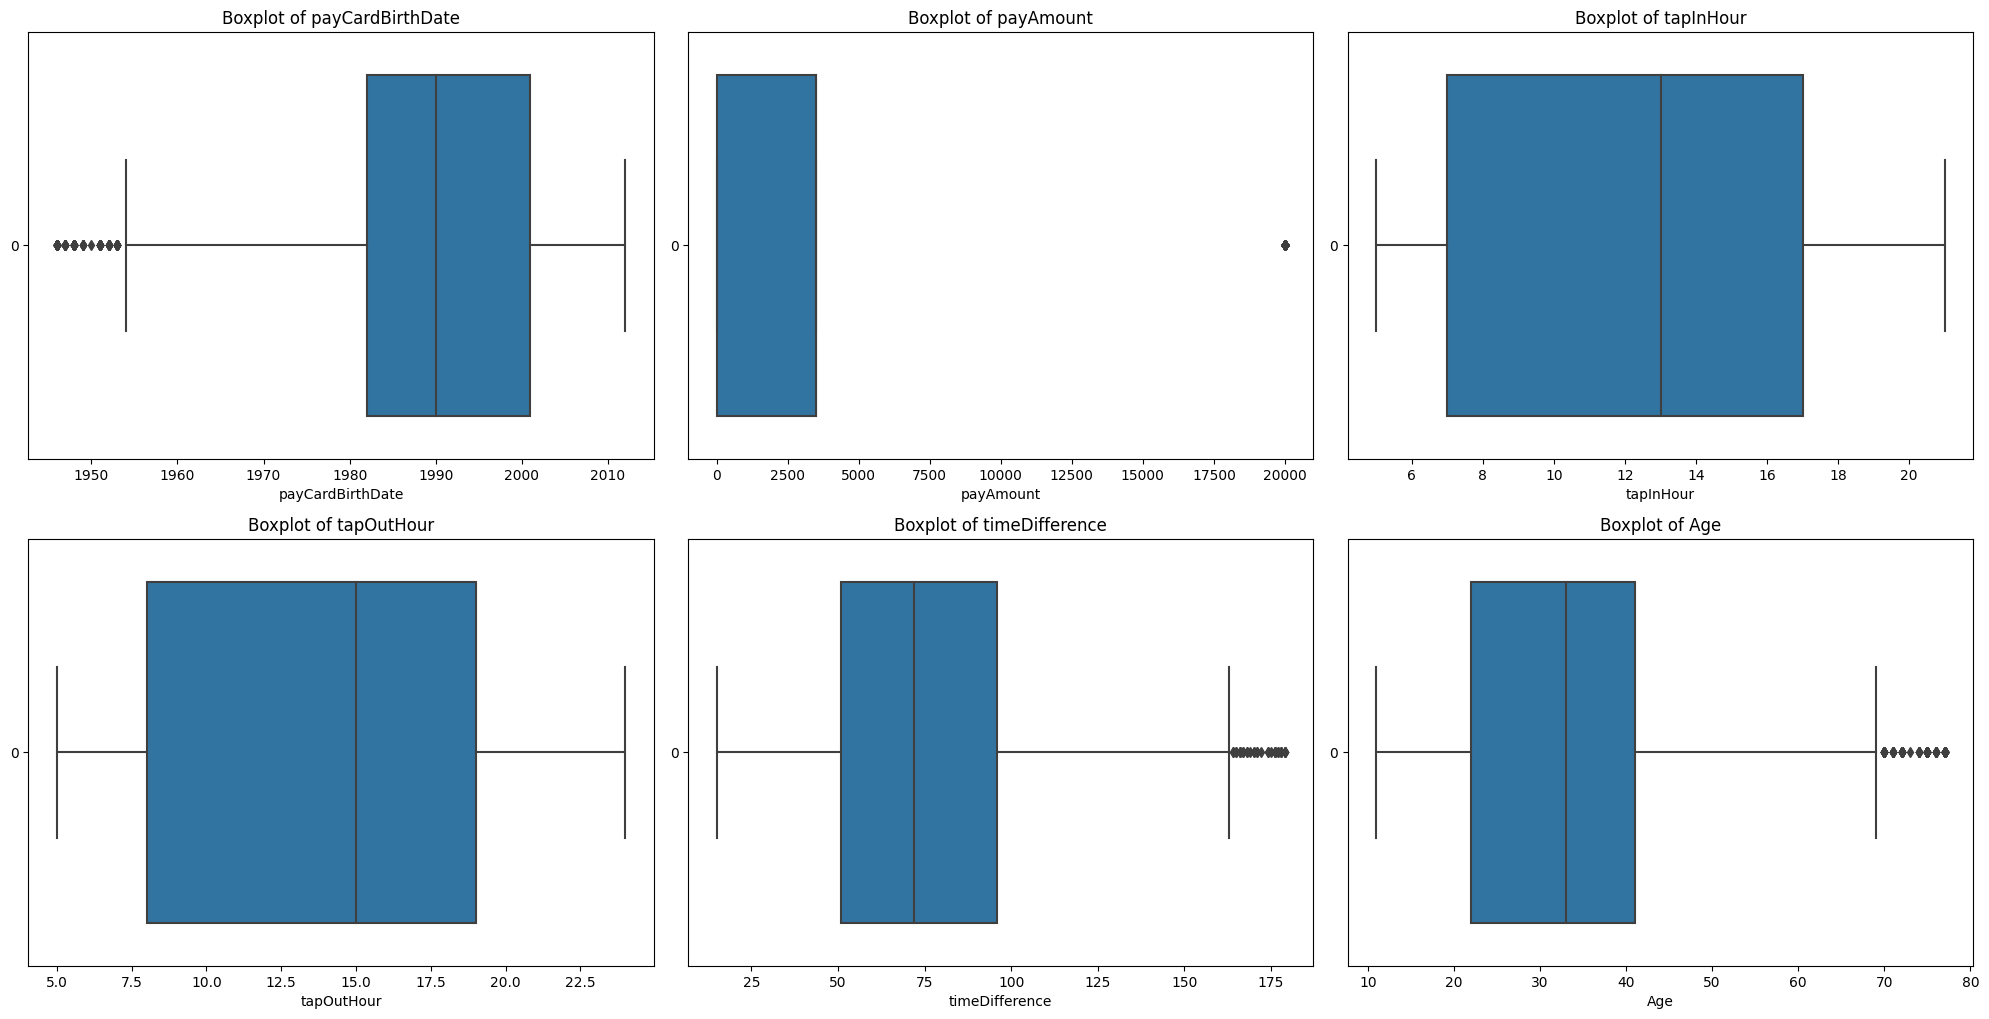

In [78]:
# Create boxplot
plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df[column], orient='horizontal')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()


In [79]:
# Create function untuk kalkulasi outliers
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Print output kalkulasi outliers
for column in numeric_columns:
    outlier_df = (len(outliers(df, column)))
    print(f'Total outliers in column "{column}" = {outlier_df}')
    print(f'Percentage of outliers in column "{column}" = {(round(outlier_df / (len(df[column]))*100,2))}%\n')

Total outliers in column "payCardBirthDate" = 314
Percentage of outliers in column "payCardBirthDate" = 0.89%

Total outliers in column "payAmount" = 1646
Percentage of outliers in column "payAmount" = 4.64%

Total outliers in column "tapInHour" = 0
Percentage of outliers in column "tapInHour" = 0.0%

Total outliers in column "tapOutHour" = 0
Percentage of outliers in column "tapOutHour" = 0.0%

Total outliers in column "timeDifference" = 34
Percentage of outliers in column "timeDifference" = 0.1%

Total outliers in column "Age" = 314
Percentage of outliers in column "Age" = 0.89%



**Findings from Outliers**
1. Kolom 'payCardBirthDate' dan 'Age' memiliki outliers sebanyak 314 data. Hal ini menunjukkan bahwa terdapat penumpang Transjakarta yang sudah Lanjut Usia (Lansia) yang berumur 70 tahun keatas
2. Kolom 'payAmount' memiliki outliers sebanyak 1646 data. Hal tersebut dikarenakan adanya transportasi Royal Trans yang memiliki tarif Rp20.000 untuk perjalanan lintas kota
3. Kolom 'timeDifference' memiliki outliers sebanyak 34 data. Hal ini menandakan bahwa terdapat perjalanan Transjakarta yang memakan waktu hampir 180 menit (3 jam). Penyebab di balik ini kemungkinan besar terjadi karena adanya kepadatan lalu lintas. 
4. Kolom 'tapInHour' dan 'tapOutHour' bebas dari outliers

**Dealing with Outliers** 

Secara keseluruhan, outliers yang ada bukan menjadi permasalahan dalam melakukan analisis data. Seperti di kolom 'payAmount' ada banyak outliers karena memang tarif yang dikenakan bagi penumpang Royal Trans cenderung lebih tinggi dibandingkan Transjakarta dan Angkot JakLingko. Meskipun begitu, outliers pada kolom 'payCardBirthDate' dan 'Age' menimbulkan sebuah pertanyaan yaitu, apakah penumpang Lansia benar-benar ada yang menggunakan Transjakarta? Pasalnya, Transjakarta mengeluarkan Program Layanan Gratis Transjakarta bagi penumpang Lanjut usia 60 tahun ke atas (Lansia) (https://transjakarta.co.id/informasi-pendaftaran-kartu-layanan-gratis-transjakarta-tj-card-terkini-2022/). Hal tersebut dapat kita telaah lebih dalam pada analisis selanjutnya, apakah penumpang Lansia benar gratis dalam menggunakan layanan Transjakarta atau justru bayar seperti pada umumnya. 

## **Findings in Data Cleaning**

1. Kolom 'tapInTime' dan 'tapOutTime' yang memiliki value berbentuk tanggal masih memiliki tipe data object sehingga diubah menjadi tipe data date time
2. Kolom baru yang diperlukan untuk analisis:
    1. Tap in hour
    2. Tap out hour
    3. Tap in days
    4. Tap out days
    5. Time difference
    6. Age
    7. Jenis transjakarta
    8. Age group
3. Missing values yang ada di dataset bisa diisi value nya berdasarkan informasi-informasi yang tersedia di dataset. Kolom missing values sudah di treatment sebagai berikut:
    - Null values pada kolom 'payAmount' diisi berdasarkan koridor ID, jika tidak bisa diisi maka di drop 
    - Null values pada kolom 'corridorID' dan 'corridorName' diisi berdasarkan informasi yang ada di antara keduanya, jika tidak bisa diisi maka di drop
    - Null values pada kolom 'tapOutTime', 'tapOutHour', 'tapOutDays','timeDifference' di drop
    - Karena kolom 'tapInStops' dan 'tapOutStops'  mengandung null values yang cukup banyak maka kedua kolom tersebut di drop
4. Tidak ada duplicate values dalam dataset
5. Outliers dalam dataset tidak extreme sehingga tidak menjadi masalah 

## **Import Clean Data to Excel**

In [80]:
# Import clean data 
df.to_excel('clean_Transjakarta.xlsx')

# Data Analysis
---
**Overview**

Analisis data akan dilakukan dalam dua platform berbeda, yaitu Jupyter Notebook dan Tableau. Dalam Jupyter Notebook, analisis data akan bersifat umum, di mana kita akan mencoba memahami informasi dalam data tanpa melakukan pengelompokan atau penyaringan berdasarkan faktor tertentu. Dengan kata lain, analisis data di Jupyter Notebook akan memberikan **gambaran umum tentang semua transaksi yang ada dalam data Transjakarta**.

Sementara itu, analisis data di Tableau akan lebih terfokus. Ini berarti kita akan melakukan analisis yang lebih mendalam dengan memilah data berdasarkan jenis layanan Transjakarta. Kita akan **mengeksplorasi informasi tentang perjalanan, waktu perjalanan, dan karakteristik penumpang berdasarkan jenis layanan transportasi yang digunakan**. Analisis akan ditampilakan dalam **story dan dashboard Tableau**. Dengan demikian, kita akan mendapatkan wawasan yang lebih spesifik tentang masing-masing jenis layanan Transjakarta.

[**Link Story Tableau**](https://public.tableau.com/views/Transjakarta_CapstoneModule2/HasilAnalisis?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

## Data Distribution

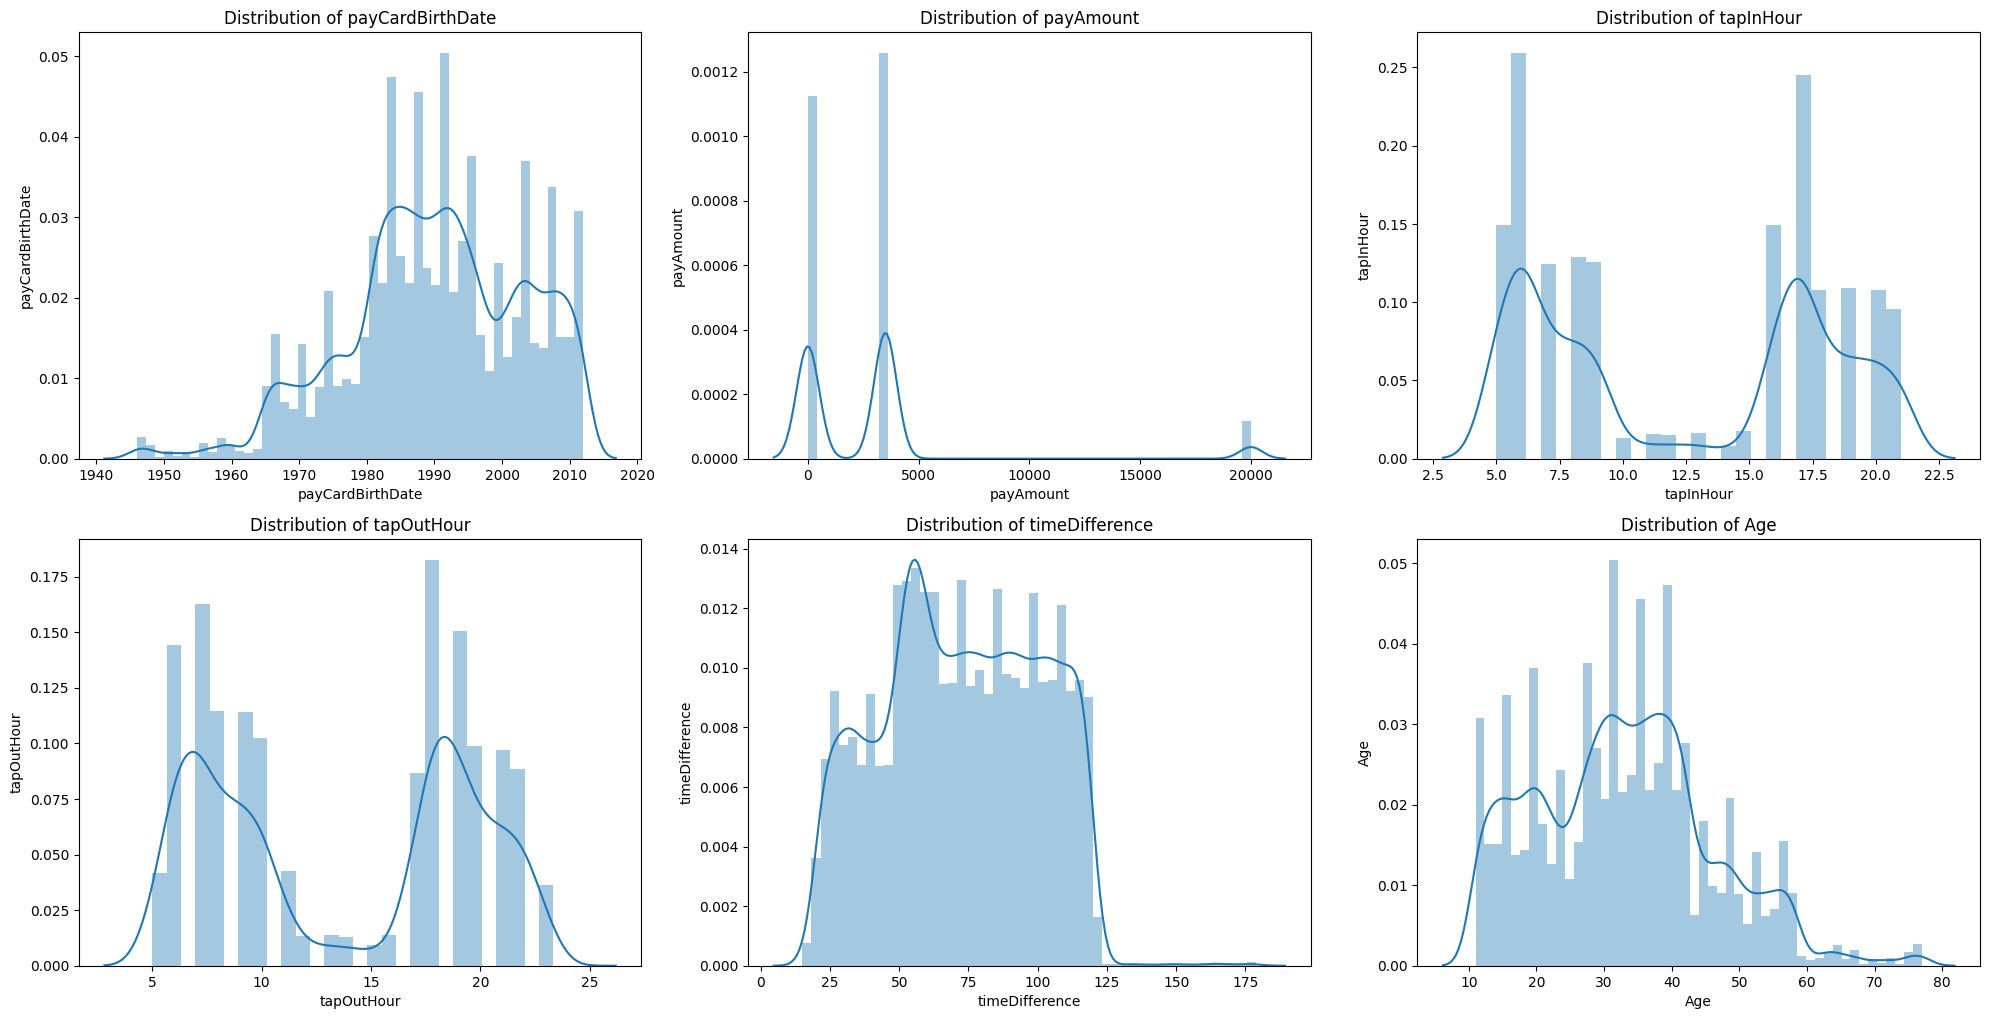

In [81]:
# Create histogram untuk distribusi data
plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.distplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.ylabel(column)
    
plt.tight_layout()
plt.show()

**Kolom numerik dalam data tidak terdistribusi normal**

### *Descriptive Statistics Summary Table*

In [82]:
# Descriptive statistics summary table untuk kolom numerik 
df.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,timeDifference,Age
count,3.546400e+04,35464.000000,35464.000000,35464.000000,35464.000000,35464.000000,35464,35464.000000,35464.000000,35464.000000,35464,35464.000000,35464.000000,35464.000000,35464.000000,35464.000000
mean,4.232487e+17,1990.137661,0.500677,-6.214886,106.841531,13.540238,2023-04-16 08:05:22.955222016,-6.214689,106.841222,21.192195,2023-04-16 09:17:34.081237504,2690.897812,12.525547,13.728542,72.184384,32.862339
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,2023-04-01 06:22:27,-6.394973,106.614730,1.000000,2023-04-01 07:27:31,0.000000,5.000000,5.000000,15.000000,11.000000
25%,1.800407e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,2023-04-10 09:03:43.249999872,-6.247225,106.801640,11.000000,2023-04-10 10:18:10,0.000000,7.000000,8.000000,51.000000,22.000000
50%,3.507251e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,2023-04-16 17:33:51.500000,-6.214808,106.834580,18.000000,2023-04-16 18:56:28,3500.000000,13.000000,15.000000,72.000000,33.000000
75%,4.693230e+15,2001.000000,1.000000,-6.175528,106.882530,19.000000,2023-04-21 21:40:41.249999872,-6.174926,106.883400,29.000000,2023-04-21 23:11:19.750000128,3500.000000,17.000000,19.000000,96.000000,41.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,2023-04-30 21:55:41,-6.091746,107.023660,77.000000,2023-04-30 23:23:18,20000.000000,21.000000,24.000000,179.000000,77.000000
std,1.319302e+18,13.035974,0.500007,0.057865,0.060395,12.197351,NaN,0.059014,0.061046,13.783811,NaN,4182.592709,5.716973,5.948002,28.063211,13.035974


In [83]:
# Descriptive statistics summary table untuk kolom non-numerik 
df.describe(include='object')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStopsName,tapOutStopsName,tapInDays,tapOutDays,jenisTransjakarta,ageGroup
count,35464,35464,35464,35464,35464,35464,35464,35464,35464,35464,35464,35464
unique,35464,6,1976,2,216,216,2534,2220,7,7,4,10
top,VWLK109G7Q00PT,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,Penjaringan,BKN,Friday,Friday,Transjakarta,32-39
freq,1,17519,78,18870,384,384,229,302,6440,6440,17307,8618


Tabel "Descriptive Statistics" di atas memberikan gambaran ringkas tentang data yang digunakan. Dalam tabel ini, kita dapat melihat statistik deskriptif untuk beberapa variabel yang termasuk dalam data. Tabel "Descriptive Statistics" tersebut terbagi menjadi dua yaitu, berdasarkan kolom numerik dan kolom non-numerik. 

## 1| Informasi Perjalanan

### *Jumlah Rute*

Pertama, kita buat dataframe untuk melihat total koridor/rute berdasarkan jenis Transjakarta

In [84]:
# Pastikan bahwa semuanya sudah teridentifikasi ke dalam jenisTransjakarta
df['jenisTransjakarta'] =  df['payAmount'].apply(assign_jenis_transjakarta)

In [85]:
# Create dataframe untuk total corridor
route = df.groupby('jenisTransjakarta')['corridorID'].nunique().reset_index()
route.columns = ['Jenis Transjakarta', 'Total Corridor']
route = route.sort_values(by = 'Total Corridor',ascending=False).reset_index(drop=True)
route

,Jenis Transjakarta,Total Corridor
0,Transjakarta,106
1,Mikrotrans JakLingko,100
2,Royal Trans,10


Di bawah ini adalah visualisasi bar graph untuk "Jumlah Rute Transjakarta"

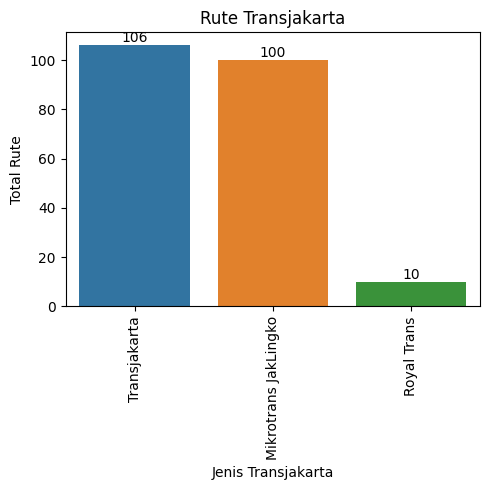

In [86]:
# Create visualisasi bar graph
plt.figure(figsize=(5,5))
bar1 = sns.barplot(data=route,x='Jenis Transjakarta',y='Total Corridor')

plt.title('Rute Transjakarta')
plt.xlabel('Jenis Transjakarta')
plt.ylabel('Total Rute')
plt.xticks(rotation=90)
plt.tight_layout()
bar1.bar_label(bar1.containers[0],fmt='%0.0f',label_type='edge')
plt.show()

PT Transportasi Jakarta (TransJakarta) memiliki 216 rute secara keseluruhan. Transjakarta merupakan transportasi dengan rute perjalanan terbanyak yaitu, 106 rute. Disusul dengan Mikrotrans JakLingko sebanyak 100 rute dan Royal Trans dengan rute paling sedikit sebanyak 10 rute. Dengan begitu, melalui grafik diatas dapat simpulkan bahwa Transjakarta memiliki jaringan yang paling luas dibandingkan Angkot JakLingko dan Royal Trans.

### *Rute Terpadat*

Setelah mengetahui jumlah rute Transjakarta, sekarang kita akan coba melihat dari 217 rute tersebut, rute apa yang paling padat penumpang?

Pertama, kita susun dataframe nya terlebih dahulu dimana kita akan sorting berdasarkan 5 rute terpadat. Perhitungan didasari dari banyaknya ID transaksi sebagai berikut:

In [87]:
# Create dataframe rute terpadat
route_padat = df.groupby(['jenisTransjakarta', 'corridorName'])['transID'].count().reset_index()
route_padat = route_padat.sort_values('transID', ascending=False).head()
route_padat

,jenisTransjakarta,corridorName,transID
104,Royal Trans,Cibubur - Balai Kota,384
121,Transjakarta,Ciputat - CSW,376
128,Transjakarta,Harmoni - Jakarta International Stadium,333
171,Transjakarta,Pulo Gadung - Monas,333
30,Mikrotrans JakLingko,Kampung Rambutan - Pondok Gede,327


Kemudian, kita susun visualisasi bar graph untuk "Top 5 Rute Terpadat"

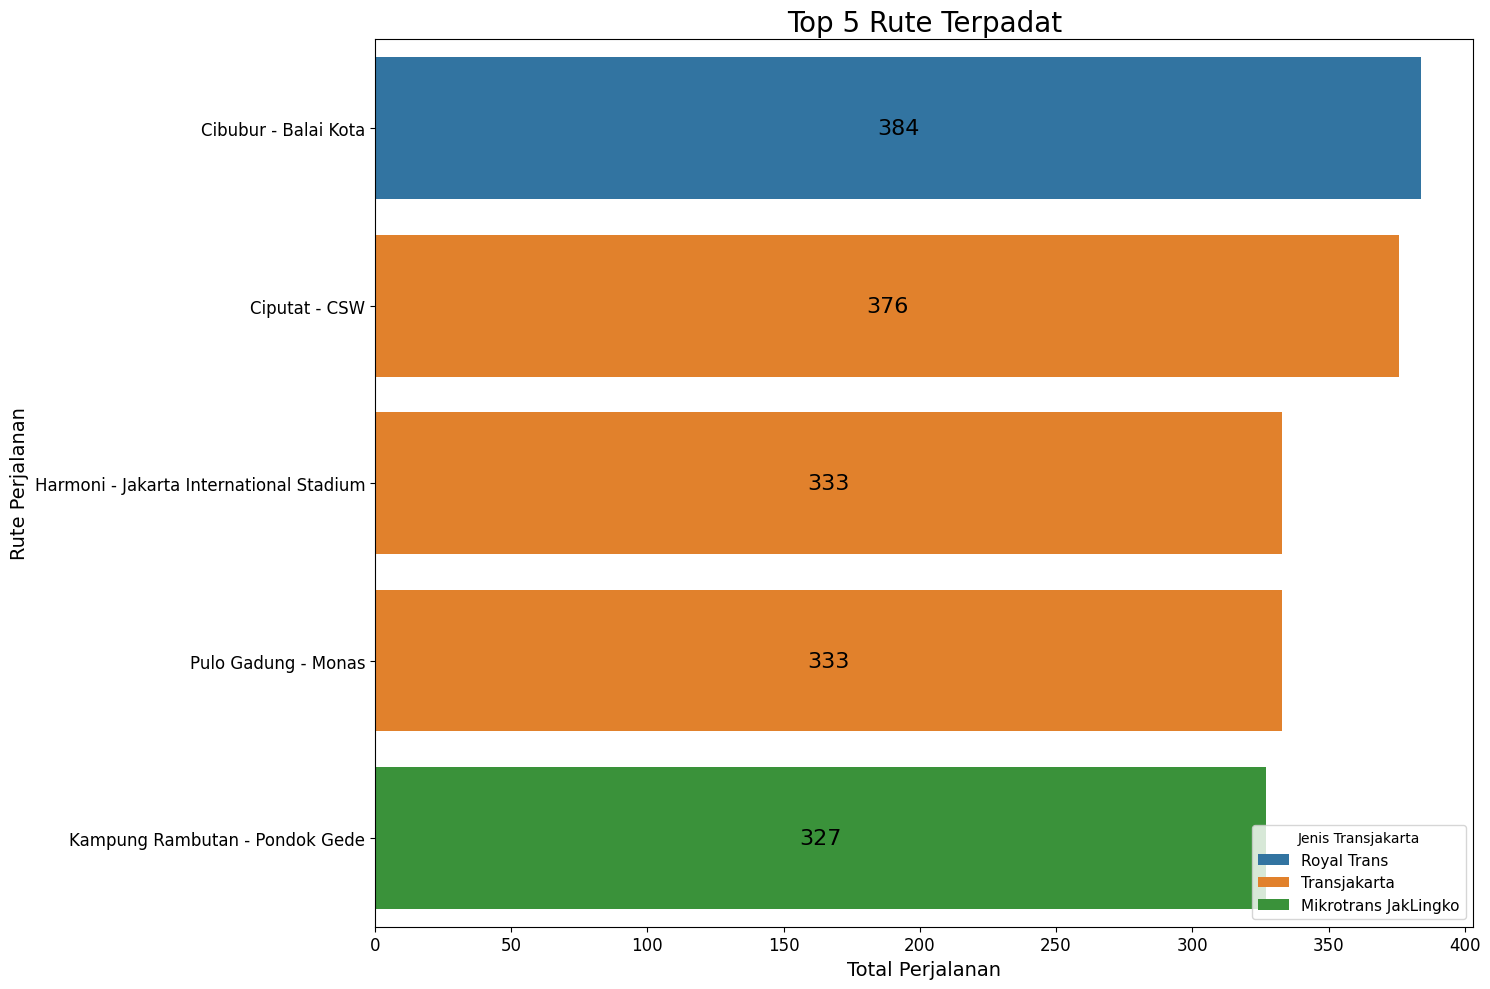

In [88]:
# Create visualisasi bar graph
plt.figure(figsize=(15,10))

ax = sns.barplot(data=route_padat,y='corridorName',x='transID',hue='jenisTransjakarta',dodge = False)

plt.title('Top 5 Rute Terpadat', size=20)
plt.xlabel('Total Perjalanan', fontsize=14)
plt.ylabel('Rute Perjalanan', fontsize=14)
plt.legend(title='Jenis Transjakarta', loc='lower right', fontsize=11)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt='%0.0f', label_type='center', size=16)

plt.tight_layout()
plt.show()

Berdasarkan hasil analisa diatas, rute paling padat merupakan rute milik Royal Trans arah Cibubur-Balai Kota dengan jumlah 384 transaksi sepanjang bulan April 2023. Kemudian, disusul dengan rute Ciputat-CSW, Harmoni-Jakarta International Stadium, dan Pulo Gadung-Monas milik Transjakarta. Terakhir adalah rute Kampung Rambutan-Pondok Gede milik Mikrotrans JakLingko. 

Secara keseluruhan, dapat kita lihat bahwa 5 rute terpadat tersebut merupakan rute dari daerah suburban ke tengah kota Jakarta. Hasil analisa ini menunjukkan bahwa seluruh kegiatan masyarakat berpusat di tengah kota Jakarta. Hal tersebut didasari bahwa titik sentral aktivitas masyarakat biasanya terletak di tengah kota seperti perkantoran, pusat belanja, dan rumah sakit besar. Dengan begitu, wajar apabila rute-rute terpadat mengarah ke daerah pusat kota Jakarta. 

### *Jumlah Tap In Stops dan Tap Out Stops*

Stops dalam kolom dataset dapat diartikan sebagai pemberhentian atau halte-halte milik Transjakarta. Kita akan mencoba menganalisa jumlah penumpang yang melakukan tap in (entrance) dan jumlah penumpang yang melakukan tap out (exit)

In [89]:
# Menghitung jumlah Tap In Stops dan mengurutkannya
tap_in_stops = df.groupby('jenisTransjakarta')['tapInStopsName'].nunique().reset_index()
tap_in_stops.columns = ['Jenis Transjakarta', 'Jumlah Tap In Stops']
tap_in_stops = tap_in_stops.sort_values(by = 'Jumlah Tap In Stops',ascending=False).reset_index(drop=True)

# Menghitung jumlah Tap Out Stops dan mengurutkannya
tap_out_stops = df.groupby('jenisTransjakarta')['tapOutStopsName'].nunique().reset_index()
tap_out_stops.columns = ['Jenis Transjakarta', 'Jumlah Tap Out Stops']
tap_out_stops = tap_out_stops.sort_values(by = 'Jumlah Tap Out Stops',ascending=False).reset_index(drop=True)

# Menggabungkan 2 dataframe
total_tap_stops = pd.merge(tap_in_stops,tap_out_stops,on='Jenis Transjakarta')
total_tap_stops

,Jenis Transjakarta,Jumlah Tap In Stops,Jumlah Tap Out Stops
0,Mikrotrans JakLingko,1634,1417
1,Transjakarta,1003,875
2,Royal Trans,91,80


Visualisasi dari jumlah Tap In Stops dan Tap Out Stops adalah sebagai berikut:

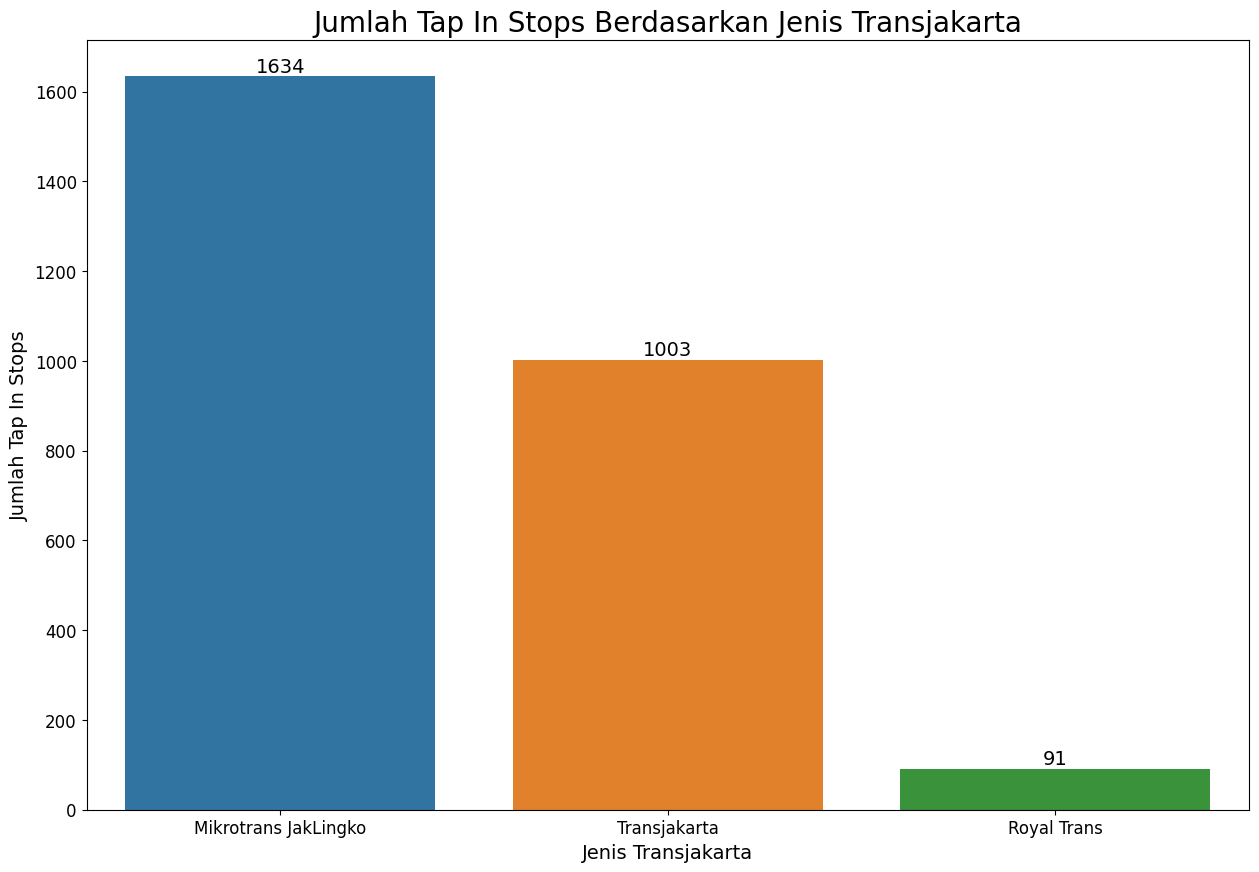

In [90]:
# Create visualisasi bar graph jumlah tap in 
plt.figure(figsize=(15,10))

ax = sns.barplot(data=tap_in_stops,y='Jumlah Tap In Stops',x='Jenis Transjakarta')

plt.title('Jumlah Tap In Stops Berdasarkan Jenis Transjakarta', size=20)
plt.xlabel('Jenis Transjakarta',fontsize=14)
plt.ylabel('Jumlah Tap In Stops',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.bar_label(ax.containers[0],fmt='%0.0f',label_type='edge',fontsize=14)

plt.show()

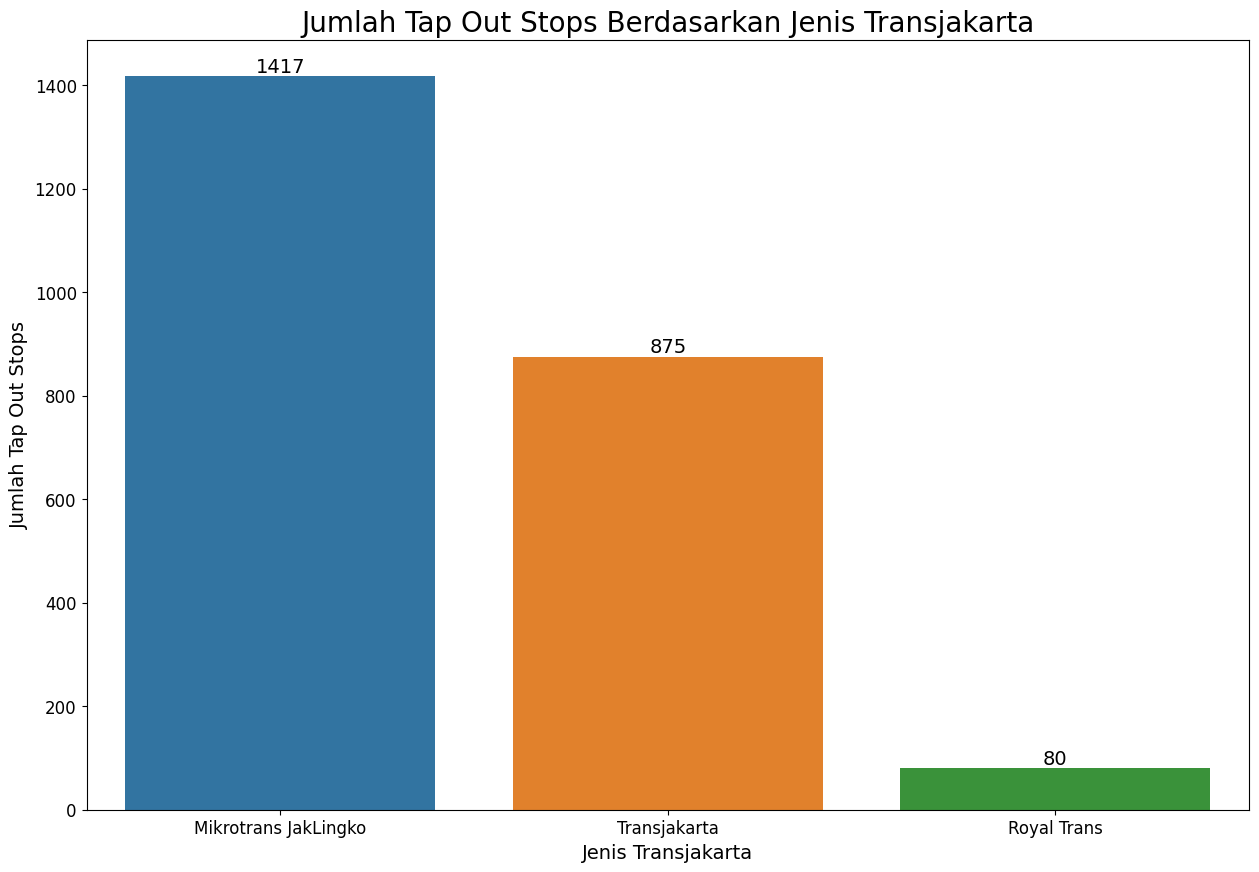

In [91]:
# Create visualisasi bar graph jumlah tap out
plt.figure(figsize=(15,10))

ax = sns.barplot(data=tap_out_stops,y='Jumlah Tap Out Stops',x='Jenis Transjakarta')

plt.title('Jumlah Tap Out Stops Berdasarkan Jenis Transjakarta', size=20)
plt.xlabel('Jenis Transjakarta',fontsize=14)
plt.ylabel('Jumlah Tap Out Stops',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.bar_label(ax.containers[0],fmt='%0.0f',label_type='edge',fontsize=14)

plt.show()

Perbedaan antara jumlah Tempat Masuk (Tap In Stops) dan Tempat Keluar (Tap Out Stops) adalah hal yang biasa terjadi dalam sistem transportasi yang rumit. Biasanya tergantung pada rute dan aturan yang diterapkan oleh penyedia layanan transportasi.

Perbedaan dalam jumlah Tap In Stops dan Tap Out Stops dalam data dapat disebabkan oleh dua faktor utama. Pertama, perbedaan ini bisa terjadi karena berbagai jenis Transjakarta memiliki rute yang berbeda, dengan beberapa rute memiliki lebih banyak atau lebih sedikit tempat masuk dan keluar. Kedua, kebijakan operasional dari penyedia layanan transportasi, seperti Transjakarta, juga mempengaruhi lokasi dan jumlah tempat masuk dan keluar. Misalnya, ada kemungkinan lebih banyak tempat masuk untuk mengakomodasi penumpang yang naik di berbagai tempat, sedangkan tempat keluar lebih terpusat di tujuan utama.

### *Stops Terpadat*

Penumpang memulai perjalanannya dengan tap in di halte Transjakarta dan tap out di halte tujuannya. Kita akan menganalisa halte-halte mana saja yang paling sering digunakan oleh penumpang ketika tap in dan tap out. Oleh karena itu, analisa akan dibagi menjadi 2 yaitu, tap in stops terpadat dan tap out stops terpadat. 

####  *Tap In Stops Terpadat*

In [92]:
# Dataframe Tap In Stops/Halte Terpadat

tap_in_padat = df[['tapInStopsName','transID']].groupby('tapInStopsName')['transID'].count().reset_index()
tap_in_padat = tap_in_padat.sort_values(by='transID',ascending=False).reset_index(drop=True)
tap_in_padat = tap_in_padat.head()
tap_in_padat

,tapInStopsName,transID
0,Penjaringan,229
1,Garuda Taman Mini,198
2,BKN,159
3,BNN LRT,145
4,Pejaten,144


Berikut adalah visualiasi dengan bar graph:

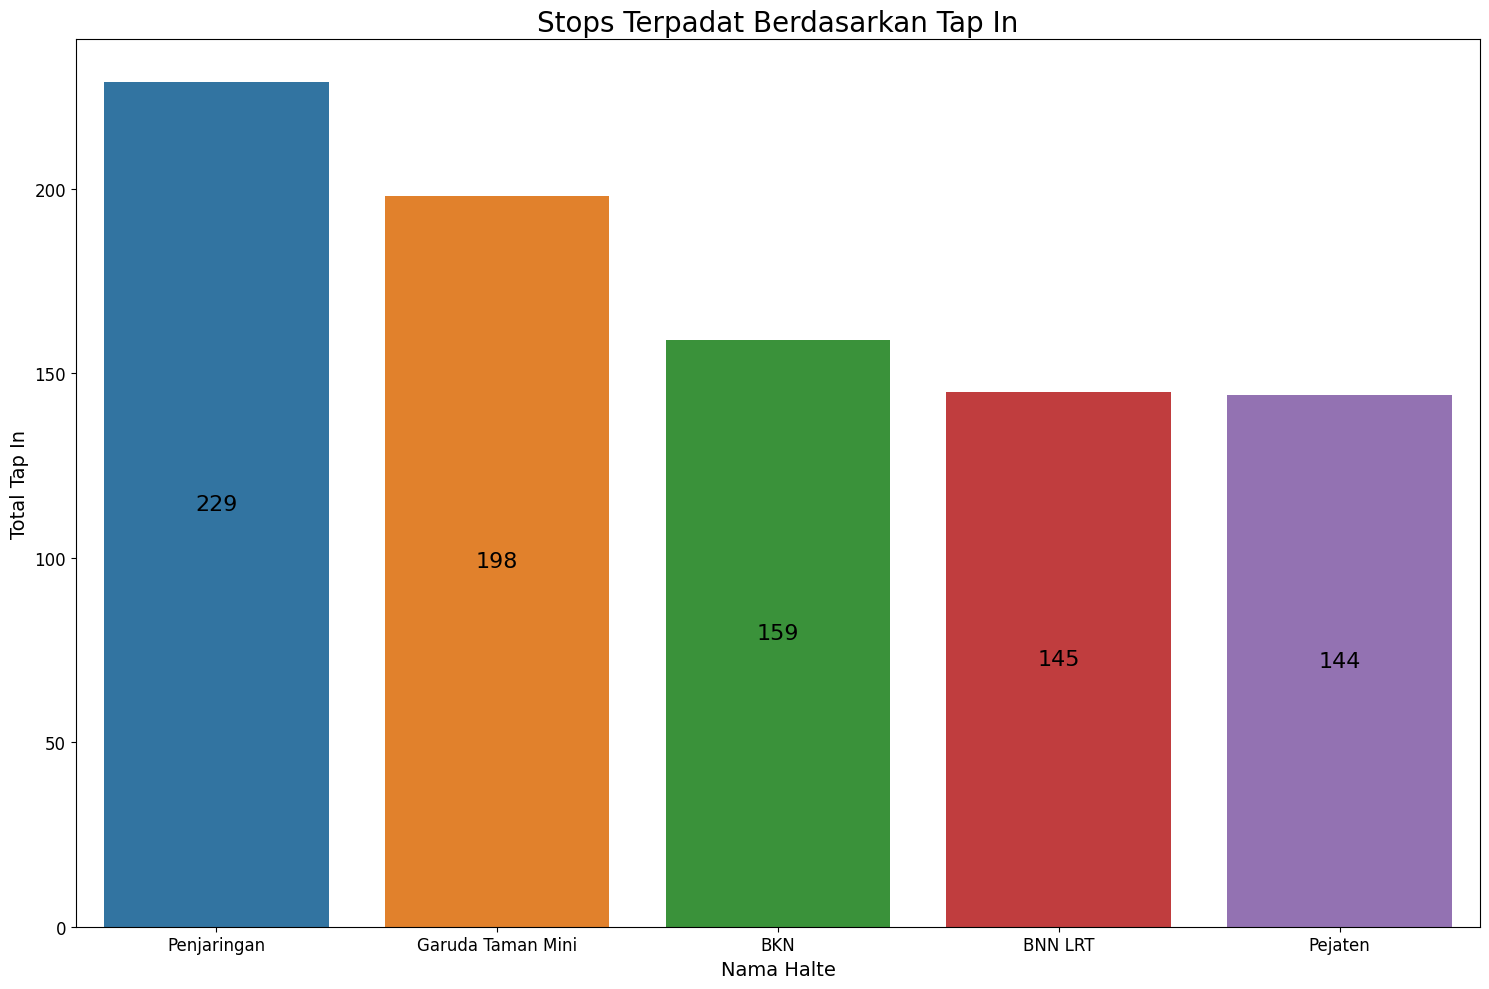

In [93]:
# Create visualisasi bar graph
plt.figure(figsize=(15,10))

ax = sns.barplot(data=tap_in_padat,x='tapInStopsName',y='transID')

plt.title('Stops Terpadat Berdasarkan Tap In', size=20)
plt.ylabel('Total Tap In', fontsize=14)
plt.xlabel('Nama Halte', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt='%0.0f', label_type='center', size=16)

plt.tight_layout()
plt.show()

Dilihat dari grafik diatas, penumpang paling banyak masuk (tap in) di halte Penjaringan dengan jumlah transaksi sebanyak 229 transaksi sepanjang April 2023. Kemudian, disusul dengan halte Garuda Taman Mini (198 transaksi), halte BKN (159 transaksi), halte BNN LRT (145 transaksi), dan halte Pejaten (144 transaksi).

#### *Tap Out Stops Terpadat*

In [94]:
# Tap Out Stops/Halte Terpadat

tap_out_padat = df[['tapOutStopsName','transID']].groupby('tapOutStopsName')['transID'].count().reset_index()
tap_out_padat = tap_out_padat.sort_values(by='transID',ascending=False).reset_index(drop=True)
tap_out_padat = tap_out_padat.head()
tap_out_padat

,tapOutStopsName,transID
0,BKN,302
1,Penjaringan,264
2,Term. Senen,188
3,Monas,158
4,Term. Kampung Rambutan,158


Berikut adalah visualiasi dengan bar graph:

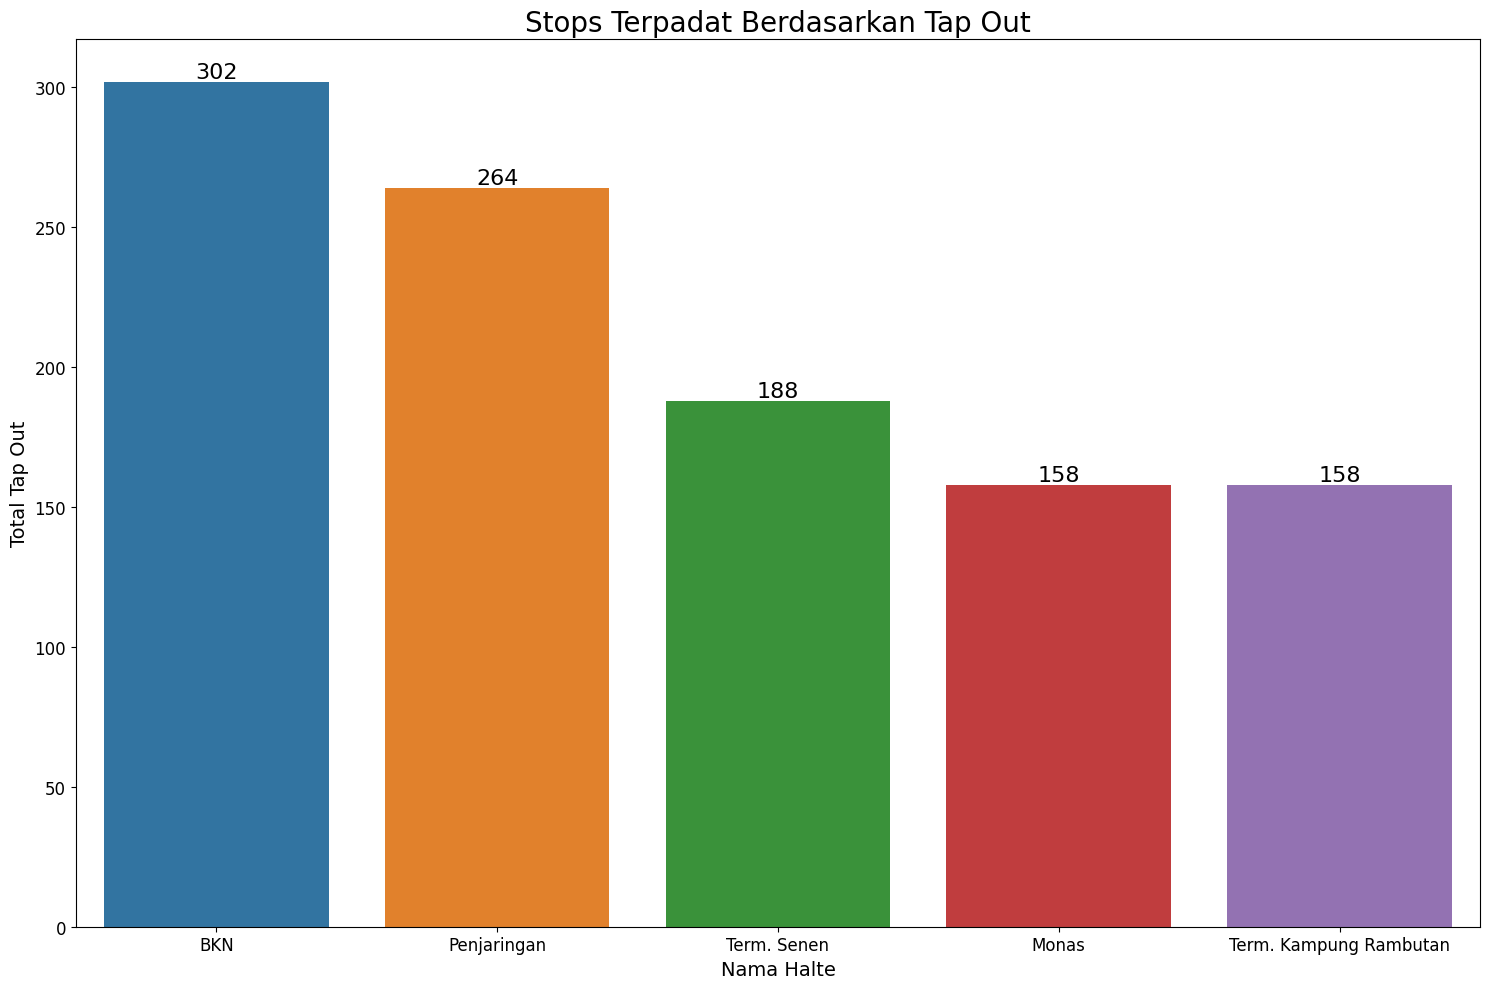

In [95]:
# Create visualisasi bar graph
plt.figure(figsize=(15,10))

ax = sns.barplot(data=tap_out_padat,x='tapOutStopsName',y='transID')

plt.title('Stops Terpadat Berdasarkan Tap Out', size=20)
plt.ylabel('Total Tap Out', fontsize=14)
plt.xlabel('Nama Halte', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt='%0.0f', label_type='edge', size=16)

plt.tight_layout()
plt.show()

Setelah melihat jumlah tap in di stops/halte Transjakarta, sekarang kita lihat jumlah penumpang yang keluar (tap out) di halte Transjakarta. Berdasarkan grafik di atas, halte tap out dengan transaksi terbesar berada di halte BKN sebesar 302 transaksi. Halte Penjaringan berada di posisi kedua dengan total 264 transaksi, disusul oleh halte Term. Senen (188 transaksi), halte Monas dan halte Term. Kampung Rambutan dengan total 158 transaksi. 

Berdasarkan analisa di atas, kita coba telaah kembali mengapa stops-stops tersebut bisa padat. Apakah stops-stops tersebut merupakan pemberhentian dari banyak rute? 

### *Jumlah Koridor Pada Setiap Tap In Stops*

Pada bagian ini, berapa banyak rute yang melewati tap in stops yang sama. Melalui informasi ini, kita dapat memperoleh *insight* apakah halte-halte padat di  atas dikarenakan banyaknya rute yang melewati halte tersebut. Dengan kata lain, semakin banyak koridor/rute yang melewati satu halte yang sama, maka semakin padat halte tersebut dengan penumpang. 

Pertama, kita susun dahulu dataframe untuk jumlah korridor di setiap tap in stops

In [96]:
# Create dataframe
tap_in_grouped = df.groupby('tapInStopsName')['corridorName'].unique().reset_index()
tap_in_grouped['corridorCount'] = tap_in_grouped['corridorName'].apply(len)
tap_in_grouped = tap_in_grouped.sort_values(by='corridorCount',ascending=False).reset_index(drop=True)
tap_in_grouped

,tapInStopsName,corridorName,corridorCount
0,BNN LRT,"[Bekasi Timur - Cawang, Kampung Rambutan - Bid...",10
1,Kejaksaan Agung,"[BKN - Blok M\t, Bekasi Barat - Blok M\t0.0, B...",8
2,SMK 57,"[Puri Beta - Ragunan, Ragunan - Dukuh Atas 2, ...",7
3,Gelora Bung Karno,"[Blok M - Kota, Kalideres - Gelora Bung Karno,...",7
4,BNN Arah Barat,"[Kampung Rambutan - Monas, PGC - Juanda, PGC 1...",7
...,...,...,...
2529,Komplek Zeni Raya Bogor,[Kp. Rambutan - Taman Wiladatika],1
2530,Komplek Wijaya Kusuma 3,[Rawamangun - Duren Sawit],1
2531,Komplek Wijaya Kusuma 2,[Pangkalan Jati - Rawamangun],1
2532,Komplek Wijaya Kusuma 1,[Kampung Melayu - Pulo Gebang via BKT],1


Kemudian, sebagai tambahan informasi, kita buat visualisasi untuk 5 tap in stops dengan juumlah koridor terbanyak

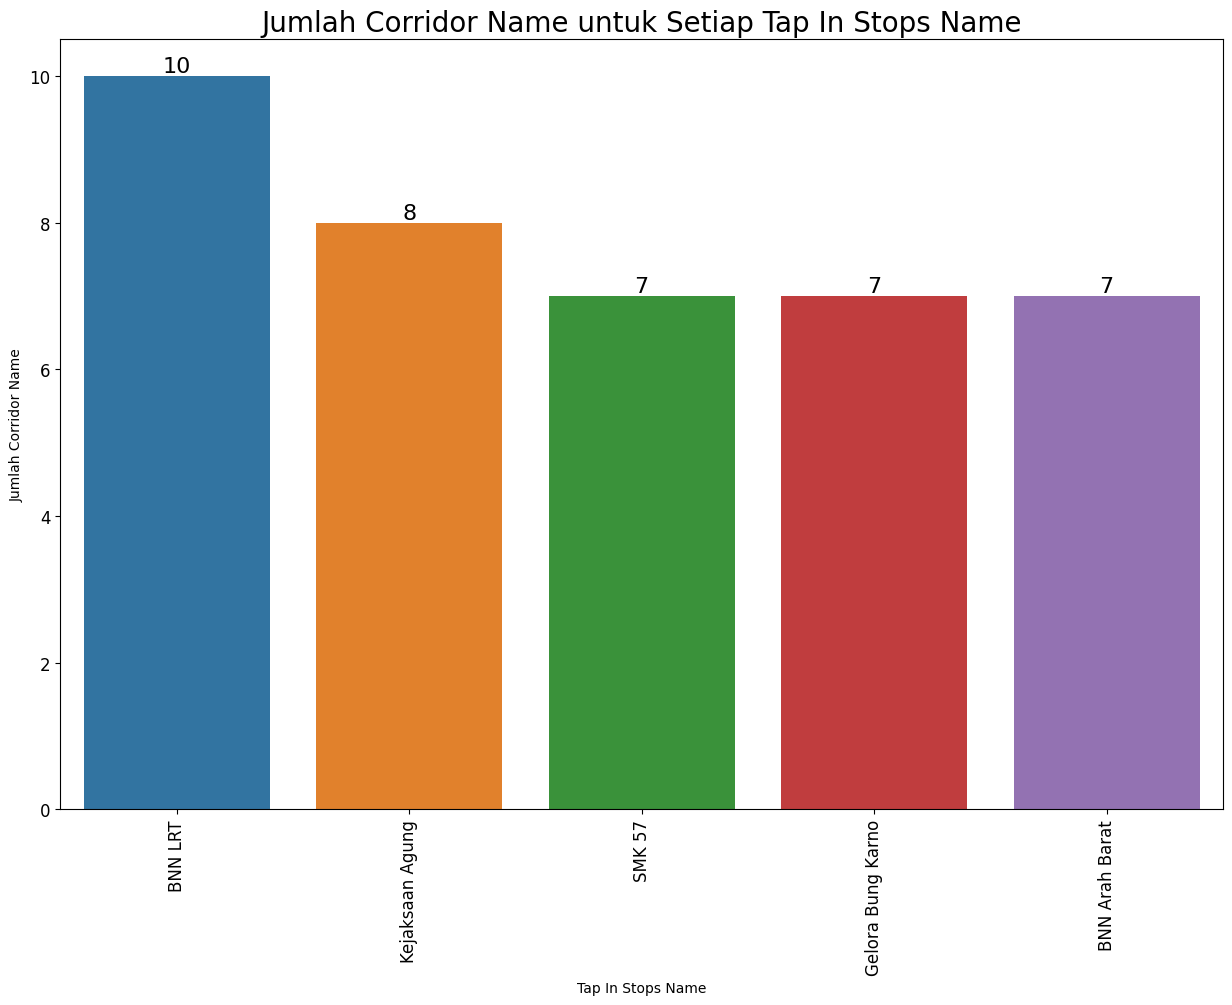

In [97]:
# Create visualisasi bar graph
plt.figure(figsize=(15,10))

ax = sns.barplot(data=tap_in_grouped.head(5),x='tapInStopsName',y='corridorCount')

plt.ylabel('Jumlah Corridor Name')
plt.xlabel('Tap In Stops Name')
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Jumlah Corridor Name untuk Setiap Tap In Stops Name',fontsize=20)

for container in ax.containers:
    ax.bar_label(container, fmt='%0.0f', label_type='edge', size=16)

plt.show()

Dari grafik diatas, kita bisa simpulkan bahwa tap in stops terpadat belum tentu memiliki jumlah koridor yang paling banyak juga. Artinya, banyaknya rute yang melewati stops tersebut belum tentu menyebabkan stops itu menjadi padat penumpang. Padatnya stops tersebut bisa dikarenakan oleh beberapa faktor. Pertama, faktor jumlah penduduk yang tinggal di daerah sekitar stops/halte dapat mendorong mobilisasi penduduk di sekitar halte menjadi lebih tinggi. Kedua, kemungkinan besar banyaknya koridor yang berhenti di suatu halte menunjukkan bahwa halte tersebut merupakan titik persilangan antara beberapa rute yang berbeda 

Untuk analisis lebih dalam, kita akan coba analisis berdasarkan stops terpadat. Kita akan melihat kembali apakah stops terpadat didorong oleh jumlah rute Transjakarta yang melewati stops tersebut atau tidak

In [98]:
# Create dataframe 
tap_in_rute_padat = tap_in_grouped[(tap_in_grouped['tapInStopsName']=='Penjaringan')|
               (tap_in_grouped['tapInStopsName']=='Garuda Taman Mini')|
               (tap_in_grouped['tapInStopsName']=='BKN')|
               (tap_in_grouped['tapInStopsName']=='BNN LRT')|
               (tap_in_grouped['tapInStopsName']=='Pejaten')]
tap_in_rute_padat

,tapInStopsName,corridorName,corridorCount
0,BNN LRT,"[Bekasi Timur - Cawang, Kampung Rambutan - Bid...",10
10,Penjaringan,"[Pelabuhan Kaliadem - Kota, Pinang Ranti - Plu...",6
17,Pejaten,"[Puri Beta - Ragunan, Ragunan - Dukuh Atas 2, ...",6
34,BKN,"[Cibubur - BKN, Kampung Rambutan - Bidara Cina...",5
130,Garuda Taman Mini,"[Pinang Ranti - Bundaran Senayan, Pinang Ranti...",3


Berikut adalah visualisasi bar graph:

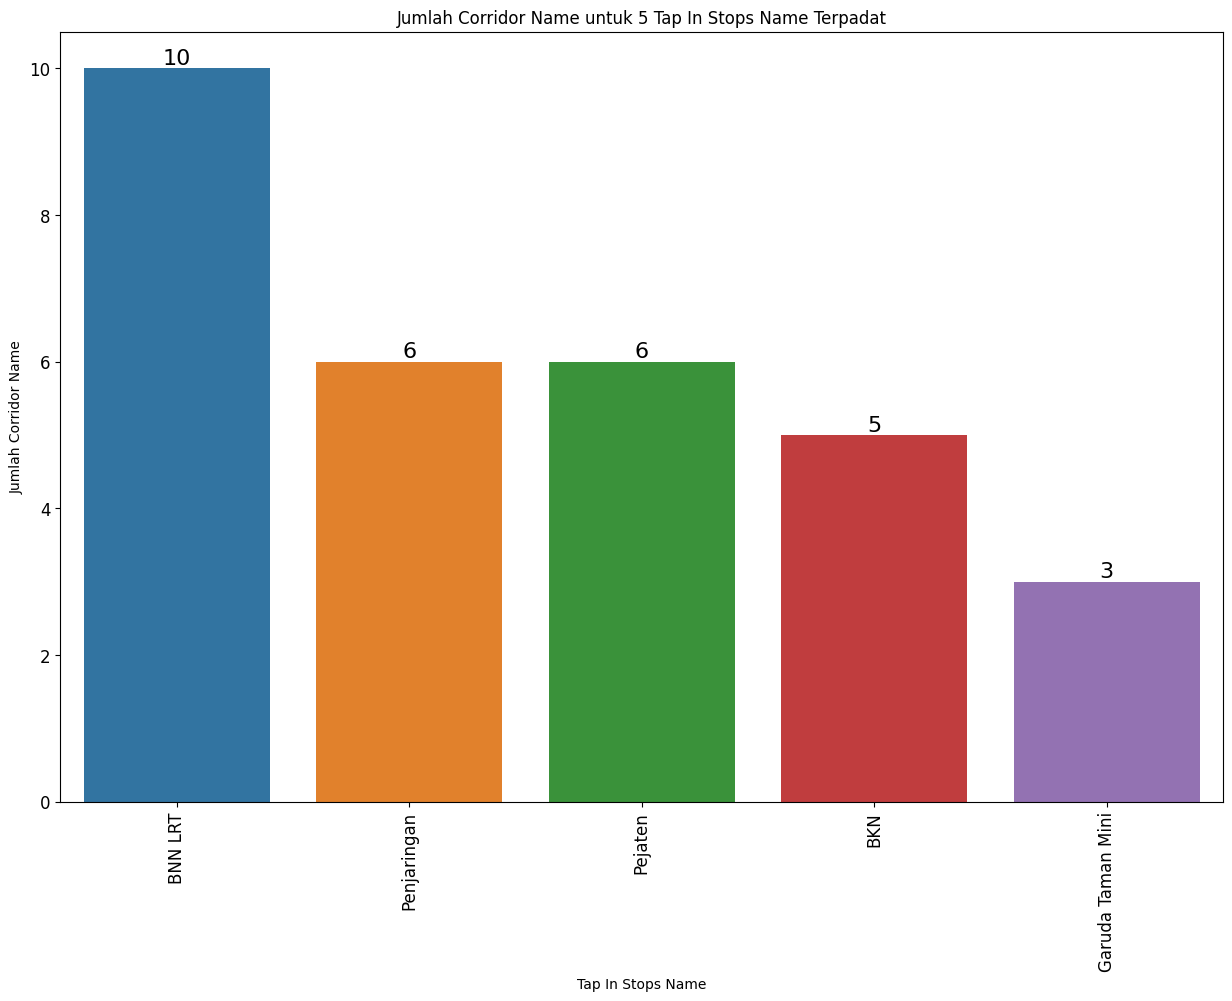

In [99]:
# Create visualisasi bar graph
plt.figure(figsize=(15,10))

ax = sns.barplot(data=tap_in_rute_padat,x='tapInStopsName',y='corridorCount')

plt.ylabel('Jumlah Corridor Name')
plt.xlabel('Tap In Stops Name')
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Jumlah Corridor Name untuk 5 Tap In Stops Name Terpadat')

for container in ax.containers:
    ax.bar_label(container, fmt='%0.0f', label_type='edge', size=16)

plt.show()

Berdasarkan grafik diatas, dapat kita simpulkan bahwa salah satu penyebab stops yang padat adalah banyaknya koridor/rute perjalanan yang melewati stops tersebut. Misalkan, stops BNN LRT menduduki posisi ke-4 untuk stops terpadat, dan ternyata stops ini memiliki 10 koridor sehingga terdapat 10 rute perjalanan yang berbeda yang melewati halte BNN LRT. 

### *Jumlah Koridor Pada Setiap Tap Out Stops*

Bagian ini akan membahas jumlah koridor di setiap tap out stops. Analisa ini mengggambarkan penumpang yang keluar (tap out) di suatu halte kemungkinan dari rute apa. Melalui informasi tersebut, kita bisa mendapatkan *insight* bahwa banyaknya koridor yang berhenti di halte yang sama menunjukkan bahwa halte tersebut adalah titik akses utama ke berbagai tujuan yang berbeda di sekitar daerah halte tersebut. 

Pertama, kita susun dahulu dataframe untuk jumlah korridor di setiap tap out stops

In [100]:
# Create dataframe
tap_out_grouped = df.groupby('tapOutStopsName')['corridorName'].unique().reset_index()
tap_out_grouped['corridorCount'] = tap_out_grouped['corridorName'].apply(len)
tap_out_grouped = tap_out_grouped.sort_values(by='corridorCount',ascending=False).reset_index(drop=True)
tap_out_grouped.head()

,tapOutStopsName,corridorName,corridorCount
0,JPO Blok G,"[Kampung Melayu - Tanah Abang via Cikini, Pasa...",12
1,Term. Senen,"[Gondangdia - Senen, Jakarta International Sta...",10
2,Kejaksaan Agung,"[BKN - Blok M\t, Bekasi Barat - Blok M\t0.0, B...",9
3,BKN,"[Cibubur - BKN, Depok - BKN, Kampung Rambutan ...",9
4,Jelambar,"[BSD - Jelambar, Jelambar - Juanda, Jelambar -...",8


Kemudian, sama seperti bagian sebelumnya, kita susun visualisasi untuk 5 tap in stops dengan jumlah koridor terbanyak

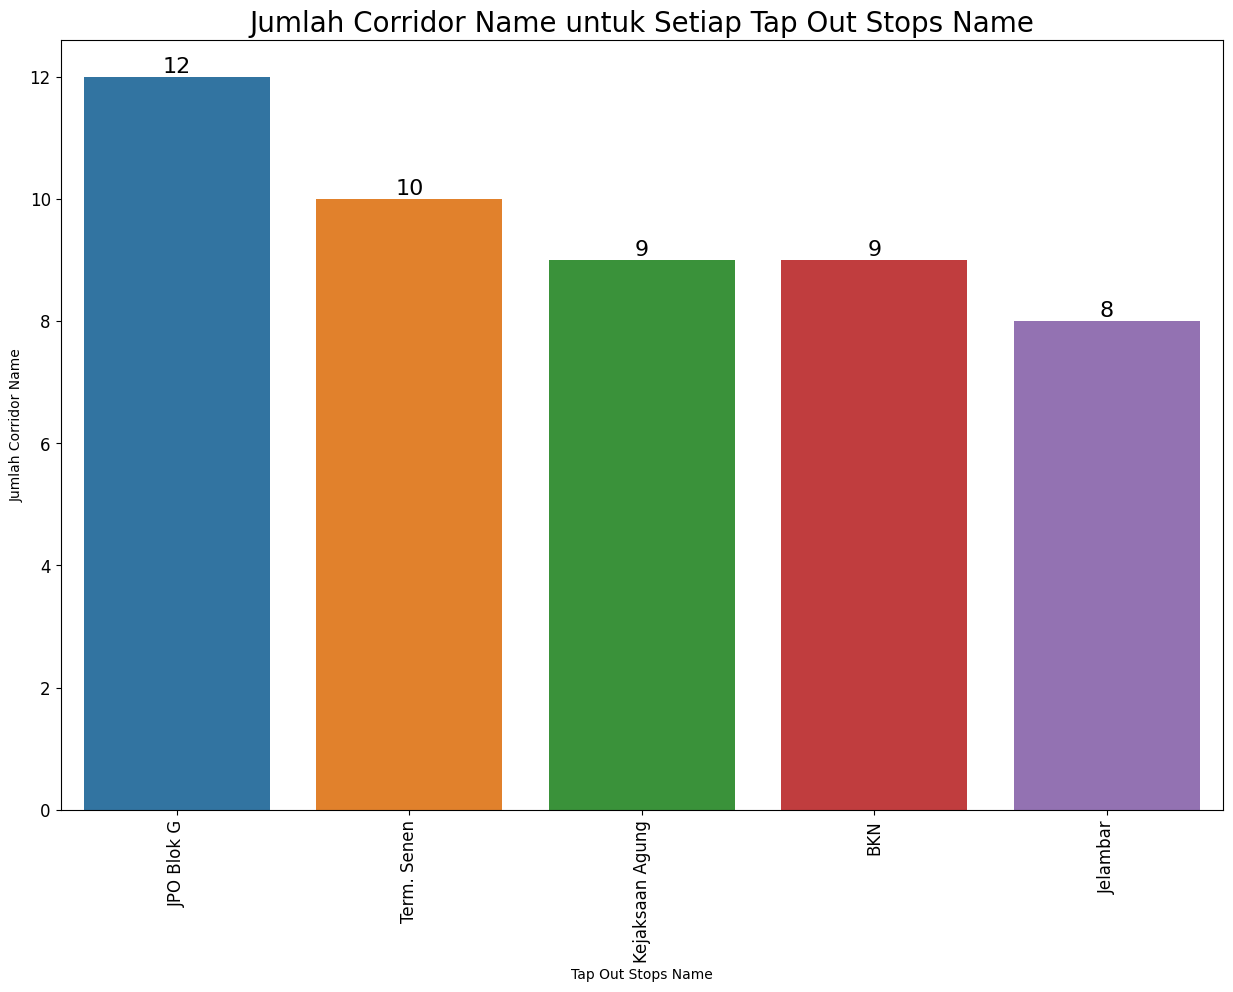

In [101]:
# Create visualisasi bar graph
plt.figure(figsize=(15,10))

ax = sns.barplot(data=tap_out_grouped.head(5),x='tapOutStopsName',y='corridorCount')

plt.ylabel('Jumlah Corridor Name')
plt.xlabel('Tap Out Stops Name')
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Jumlah Corridor Name untuk Setiap Tap Out Stops Name',fontsize=20)

for container in ax.containers:
    ax.bar_label(container, fmt='%0.0f', label_type='edge', size=16)

plt.show()

Berdasarkan grafik diatas, kesimpulan dari hasil analisa tidak jauh berbeda dengan analisa di bagian tap in stops sebelumnya. Jumlah koridor yang banyak tidak menjadi satu-satunya penyebab stops tersebut menjadi padat. Faktor lainnya adalah stops tersebut merupakan akses utama bagi para penumpang yang ingin mengunjungi berbagai area yang berbeda di sekitarnya. Misalkan, Halte JPO Blok G yang terletak di daerah Tanah Abang merupakan halte tap out dengan jumlah koridor terbanyak. Artinya, banyak penumpang dari berbagai rute melakukan tap out (exit) di halte tersebut karena dekat dengan Pasar Tanah Abang dan stasiun KRL Tanah Abang

Untuk analisis lebih dalam, kita akan coba analisis berdasarkan tap out stops terpadat

In [102]:
# Create dataframe
tap_out_rute_padat = tap_out_grouped[(tap_out_grouped['tapOutStopsName']=='BKN')|
                (tap_out_grouped['tapOutStopsName']=='Penjaringan')|
               (tap_out_grouped['tapOutStopsName']=='Term. Senen') |
                (tap_out_grouped['tapOutStopsName']=='Monas')|
                 (tap_out_grouped['tapOutStopsName']=='Term. Kampung Rambutan')]
tap_out_rute_padat

,tapOutStopsName,corridorName,corridorCount
1,Term. Senen,"[Gondangdia - Senen, Jakarta International Sta...",10
3,BKN,"[Cibubur - BKN, Depok - BKN, Kampung Rambutan ...",9
8,Term. Kampung Rambutan,"[Bulak Ringin - Kampung Rambutan, Kampung Ramb...",7
16,Monas,"[Blok M - Kota, Kampung Rambutan - Juanda via ...",6
23,Penjaringan,"[Pinang Ranti - Pluit, Rusun Kapuk Muara - Pen...",6


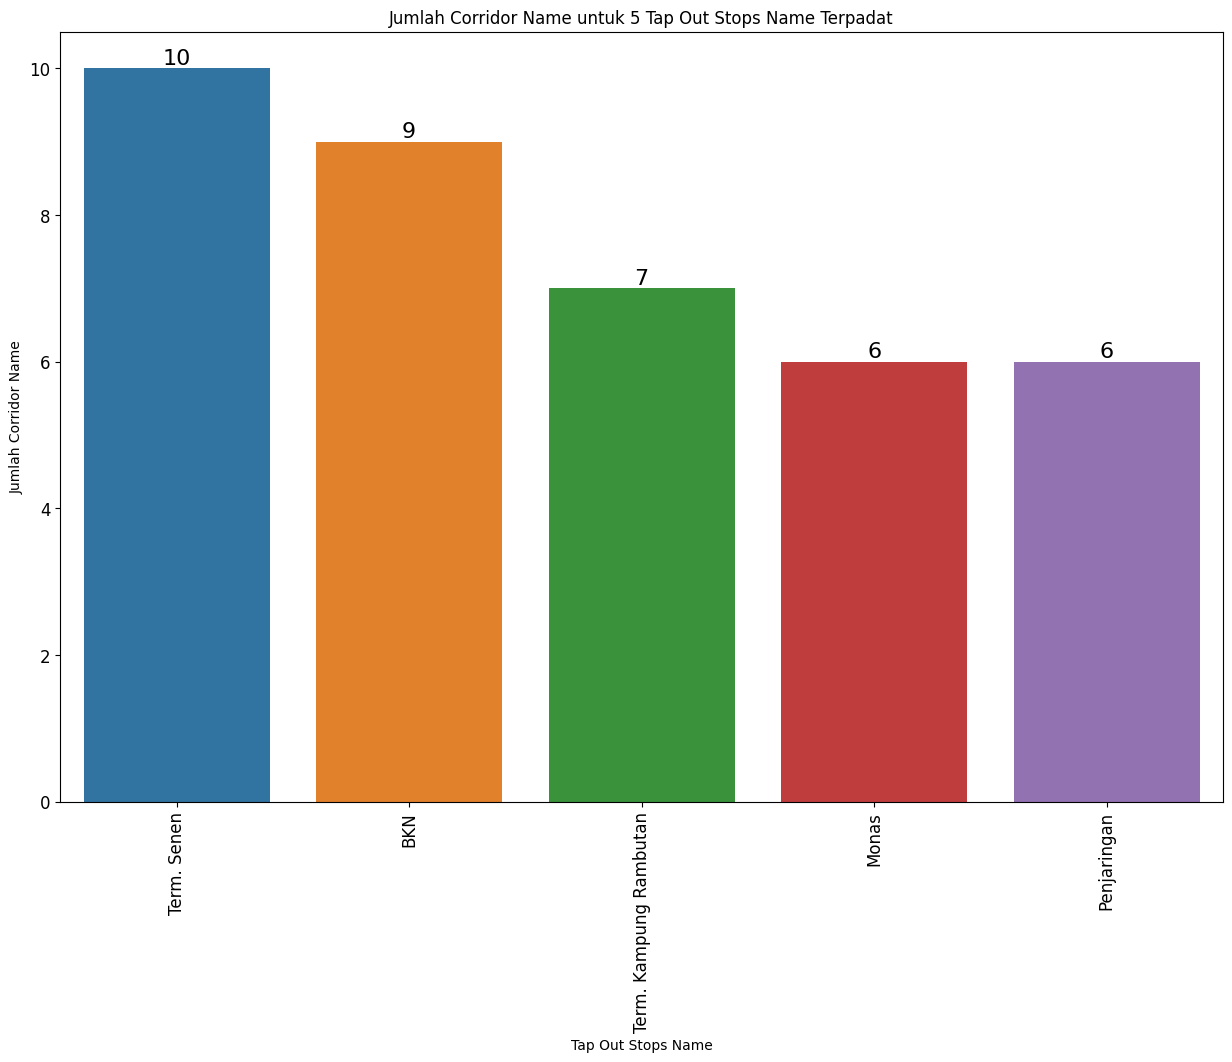

In [103]:
# Create visualisasi bar graph
plt.figure(figsize=(15,10))

ax = sns.barplot(data=tap_out_rute_padat,x='tapOutStopsName',y='corridorCount')

plt.ylabel('Jumlah Corridor Name')
plt.xlabel('Tap Out Stops Name')
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Jumlah Corridor Name untuk 5 Tap Out Stops Name Terpadat')

for container in ax.containers:
    ax.bar_label(container, fmt='%0.0f', label_type='edge', size=16)

plt.show()

Secara keseluruhan, 5 stops terpadat memiliki banyak koridor/rute perjalanan yang melewati stops tersebut. Hal ini menunjukkan bahwa banyak penumpang dari rute yang berbeda tap out (exit) di halte yang sama. Hal ini dikarenakan banyak area yang bisa dikunjungi di sekitar stops tersebut sehingga halte ini menjadi sasaran utama bagi penumpang dari berbagai daerah. Misalkan, stops Term.Senen menjadi halte terpadat dikarenakan penumpang yang keluar dari stops ini bisa ke stasiun kereta Pasar Senen dengan mudah karena jaraknya yang tidak terlalu jauh. 

## 2| Informasi Waktu Perjalanan

### *Peak Hour Penggunaan Transjakarta*

Kita akan analisa kapan peak hour terjadi berdasarkan jumlah penumpang yang masuk (tap in) ke halte-halte Transjakarta

In [104]:
# Create dataframe
peak_hour = df.groupby('tapInHour')['transID'].count().reset_index()
peak_hour = peak_hour.sort_values(by='tapInHour').reset_index(drop=True)
peak_hour

,tapInHour,transID
0,5,3135
1,6,5454
2,7,2608
3,8,2707
4,9,2637
5,10,280
6,11,325
7,12,316
8,13,339
9,14,164


Berikut adalah visualisasi line chart untuk menggambarkan peak hour penggunaan Transjakarta

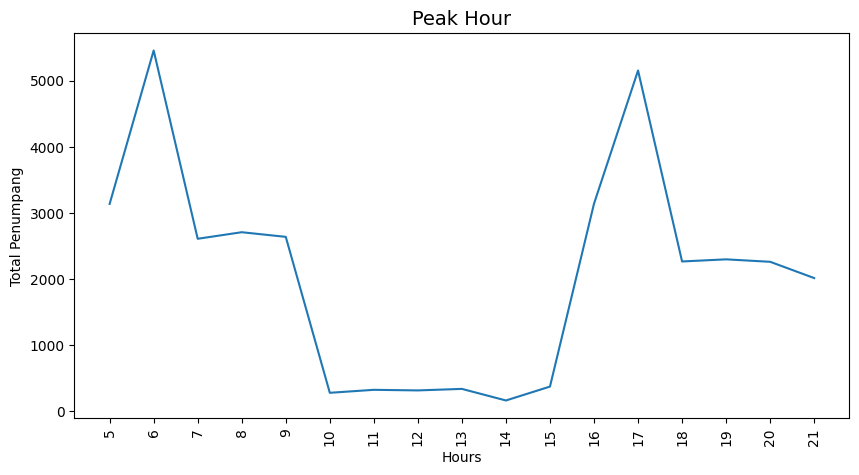

In [105]:
# Create visualisi line plot
plt.figure(figsize=(10,5))

plt.plot(peak_hour['tapInHour'],peak_hour['transID'])

plt.title('Peak Hour',size=14)
plt.xlabel('Hours',size=10)
plt.ylabel('Total Penumpang',size=10)
plt.xticks(peak_hour['tapInHour'], rotation=90) 
plt.show()

Berdasarkan analisa diatas, dapat disimpulkan bahwa peak hour penggunaan Transjakarta terjadi di jam 6 pagi dan 5 sore. Hal ini menggambarkan kondisi aktivitas masyarakat di ibu kota. Pada pagi hari, khususnya di jam 6 sore, masyarakat cenderung melakukan perjalanan untuk bekerja atau anak pergi ke sekolah. Kemudian, di sore hari, khususnya di jam 5 sore, masyarakat mulai melakukan perjalanan untuk pulang ke rumah atau melakukan aktivitas lainnya. 

Kemudian, kita akan coba analisa pada jam berapa penumpang sudah mulai exit (tap out) di halte-halte Transjakarta. Informasi ini akan menggambarkan kapan halte sudah mulai sepi.

In [106]:
# Create dataframe
peak_hour2 = df.groupby('tapOutHour')['transID'].count().reset_index()
peak_hour2 = peak_hour2.sort_values(by='tapOutHour').reset_index(drop=True)
peak_hour2

,tapOutHour,transID
0,5.0,971
1,6.0,3347
2,7.0,3783
3,8.0,2662
4,9.0,2647
5,10.0,2380
6,11.0,990
7,12.0,310
8,13.0,325
9,14.0,302


Berikut adalah visualisasi line chart untuk melihat waktu ketika tap in dan tap out

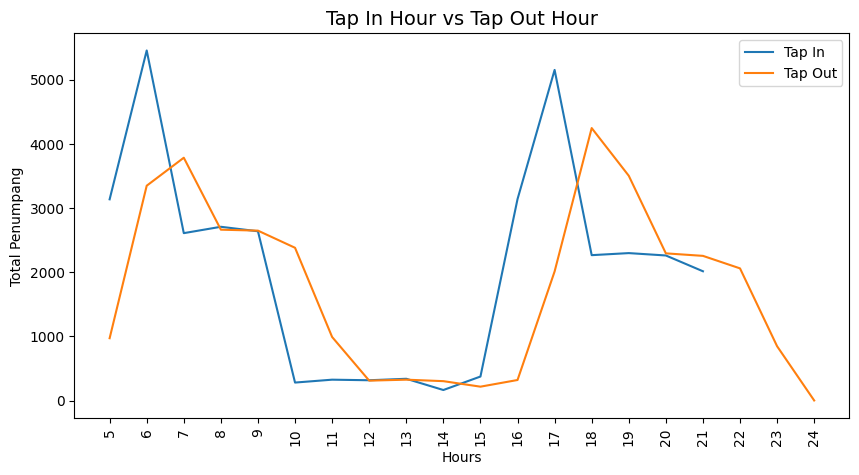

In [107]:
# Create visualisasi line plot
plt.figure(figsize=(10,5))

plt.plot(peak_hour['tapInHour'],peak_hour['transID'],label='Tap In')
plt.plot(peak_hour2['tapOutHour'],peak_hour2['transID'],label='Tap Out')

plt.title('Tap In Hour vs Tap Out Hour',size=14)
plt.xlabel('Hours',size=10)
plt.ylabel('Total Penumpang',size=10)
plt.xticks(peak_hour2['tapOutHour'],rotation=90) 
plt.legend()
plt.show()

Berdasarkan grafik diatas, secara garis besar bisa dilihat bahwa line 'tap in' dan 'tap out' saling bergantung. Dengan kata lain, pola line 'tap out' mirip dengan pola line 'tap in' dimana hal tersebut menggambarkan bahwa waktu perjalanan merupakan perbedaan antara jam tap in dengan tap out (line 'tap out' membentuk pola yang sama dengan line 'tap in' yang sudah di geser).  

### *Rute yang padat terjadi di jam berapa*

Dari analisa sebelumnya ditemukan bahwa Cibubur - Balai Kota, Ciputat - CSW,Harmoni - Jakarta International Stadium, Pulo Gadung - Monas, dan Kampung Rambutan - Pondok Gede merupakan rute/koridor terpadat. Sekarang, kita akan mencoba menganalisa pada jam berapa rute-rute tersebut padat penumpang?

In [108]:
# Create dataframe
corridor_padat = ['Cibubur - Balai Kota', 'Ciputat - CSW, Harmoni','Harmoni - Jakarta International Stadium', 'Pulo Gadung - Monas', 'Kampung Rambutan - Pondok Gede']
df_corridor = df[df['corridorName'].isin(corridor_padat)]
df_corridor = df_corridor[['transID','corridorName','tapInHour']]
df_corridor

,transID,corridorName,tapInHour
22002,ROHT384H3G50IC,Cibubur - Balai Kota,7
31121,GERX234B4W97WG,Cibubur - Balai Kota,6
17948,RTGL789V8F70MO,Cibubur - Balai Kota,19
22732,MHRD088N8L14JV,Cibubur - Balai Kota,21
30002,NNEV839Q6Y96VD,Cibubur - Balai Kota,9
...,...,...,...
27731,PFKB507N0J52YC,Pulo Gadung - Monas,20
30948,ZFVQ238W3U30AQ,Cibubur - Balai Kota,17
31143,RROZ057A4K03RX,Cibubur - Balai Kota,9
31221,WZOH810B7D85AC,Cibubur - Balai Kota,9


Berikut adalah visualisasi dengan line chart:

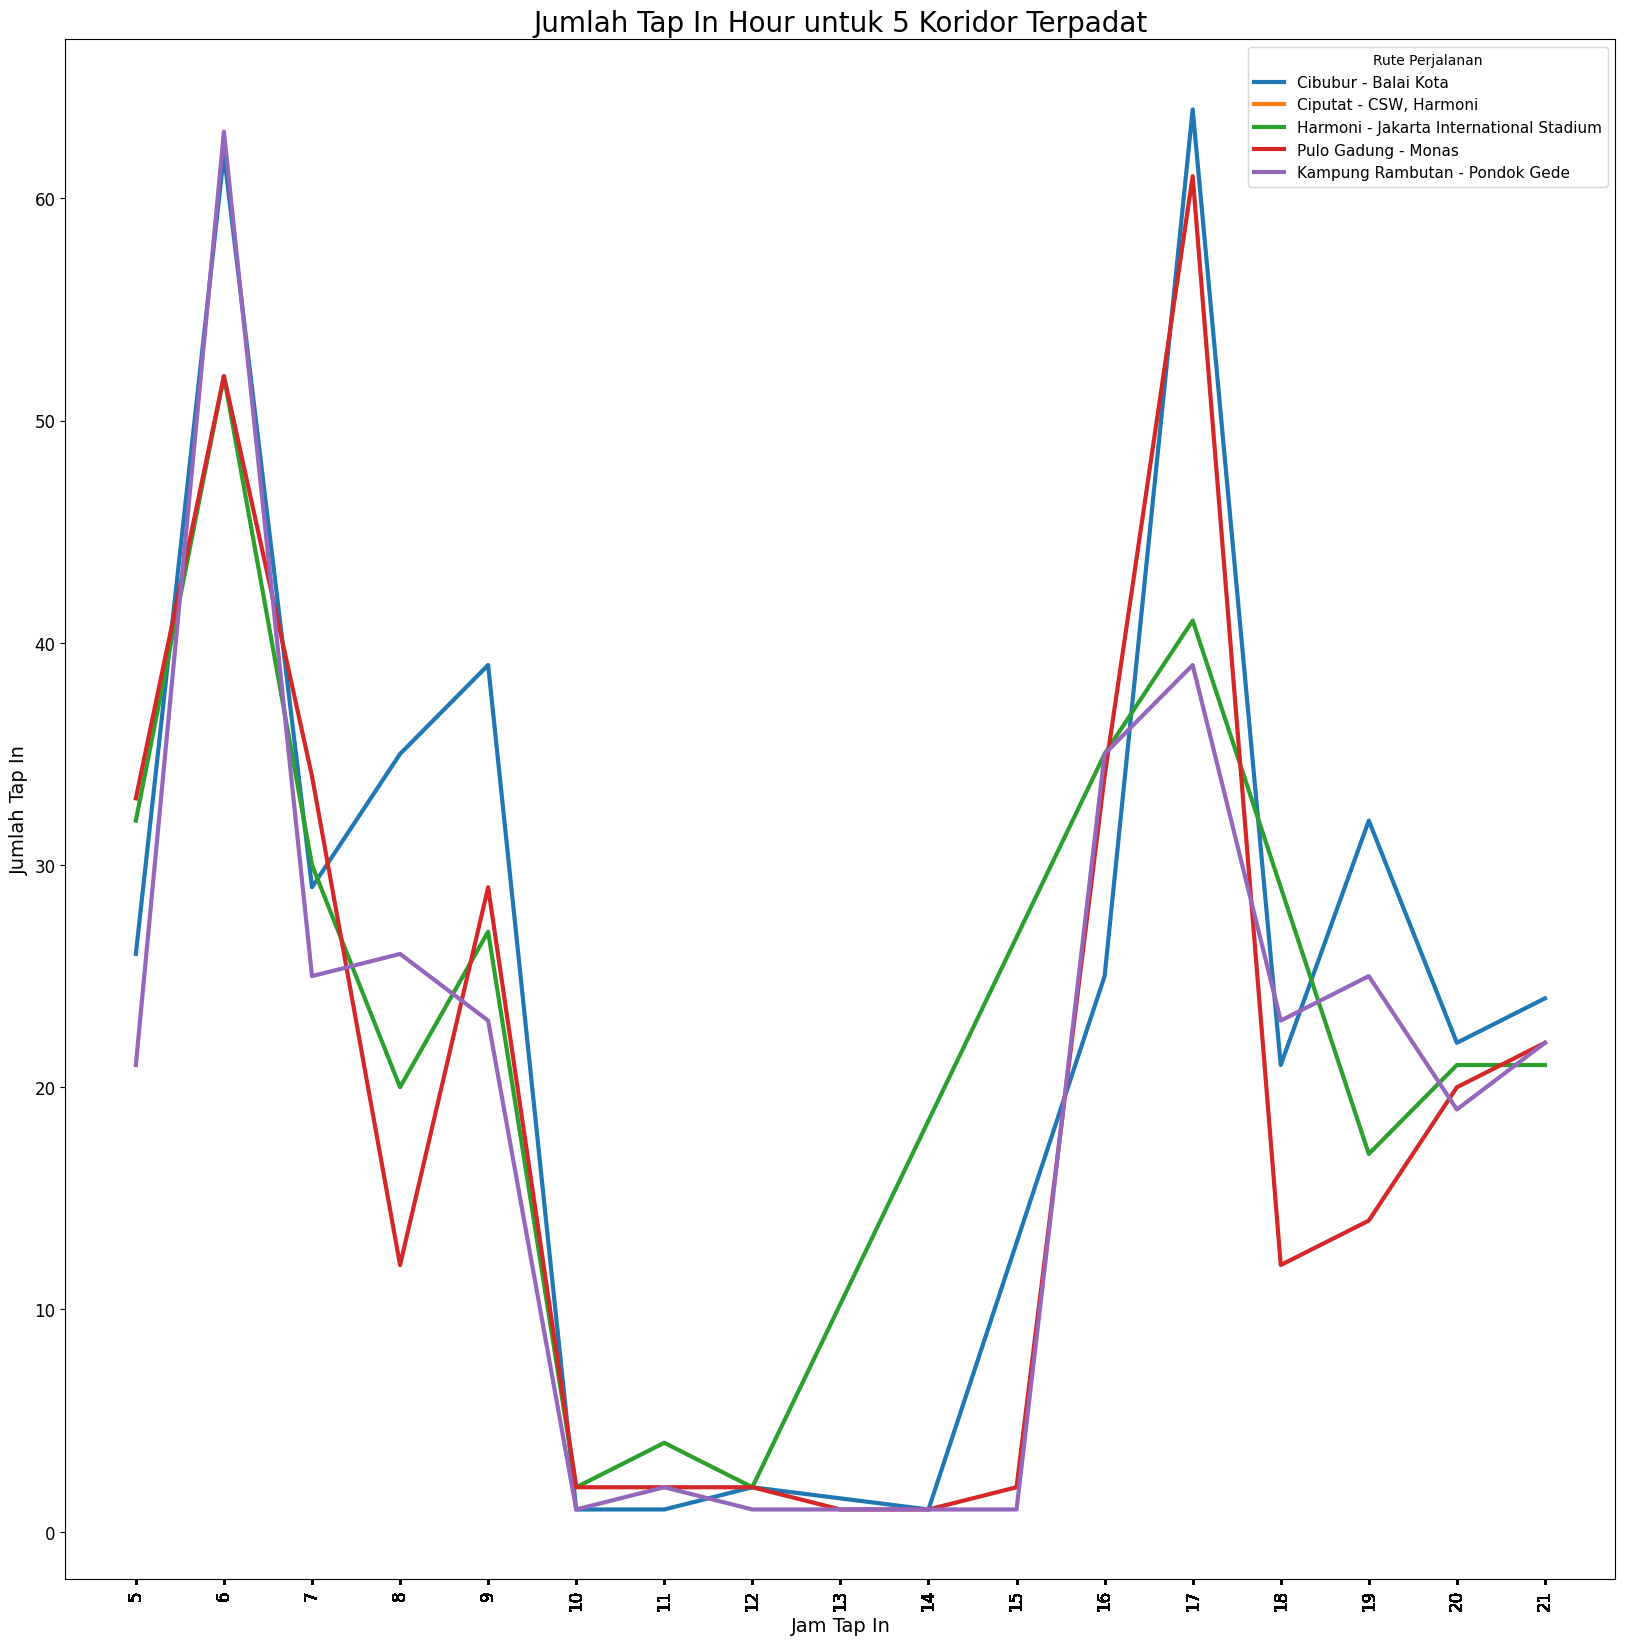

In [109]:
# Create visualisasi line chart
plt.figure(figsize=(20,20))

for corridor in corridor_padat:
    corridor_data = df[df['corridorName']==corridor]
    peakHour = corridor_data['tapInHour'].value_counts().sort_index()

    plt.plot(peakHour.index, peakHour.values, label=corridor,linewidth=3)

plt.xlabel('Jam Tap In',fontsize=14)
plt.ylabel('Jumlah Tap In',fontsize=14)
plt.title('Jumlah Tap In Hour untuk 5 Koridor Terpadat', size=20)
plt.xticks(df['tapInHour'],rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Rute Perjalanan', loc='upper right', fontsize=11)
plt.show()

Berdasarkan 5 koridor terpadat, peak hour penggunaan Transjakarta di kelima koridor tersebut sama. Artinya, kelima rute terpadat itu padat penumpang di jam 6 pagi dan 5 sore. Hal ini menandakan bahwa penumpang dari kelima rute ini paling banyak melakukan perjalanan di jam 6 pagi dan 5 sore, baik untuk berangkat maupun untuk balik. Hasil analisa ini mendukung analisa sebelumnya mengenai Peak Hour pengguunaan Transjakarta secara keseluruhan.

### *Stops yang padat di jam berapa*

Pada analisa stops/halte Transjakarta apa saja yang paling padat, ditemukan bahwa halte Penjaringan, Garuda Taman Mini, BKN, BNN LRT, dan Pejaten merupakan 5 stops paling padat. Sekarang, kita akan mencoba menganalisa pada jam berapa halte-halte tersebut padat penumpang?

In [110]:
# Create dataframe
stops_padat = ['Penjaringan','Garuda Taman Mini','BKN','BNN','LRT','Pejaten']
df_stops = df[df['tapInStopsName'].isin(stops_padat)]
df_stops = df_stops[['transID','tapInStopsName','tapInHour']]
df_stops

,transID,tapInStopsName,tapInHour
11605,FWAZ398N5E03FX,BKN,6
12250,EAWA484N9C22OS,BKN,8
3805,JLBV120N3P43KX,BKN,5
20250,NXIG955X1K13OL,BKN,9
9205,SDMO491R5V22MN,BKN,5
...,...,...,...
19546,ZWYC859V9T67TR,Pejaten,17
21250,VGKV933Z1C78SX,BKN,8
28293,YAZH414O7O58GG,Garuda Taman Mini,8
30765,IARH678V7A87SM,Garuda Taman Mini,21


Berikut adalah visualisasi line chart:

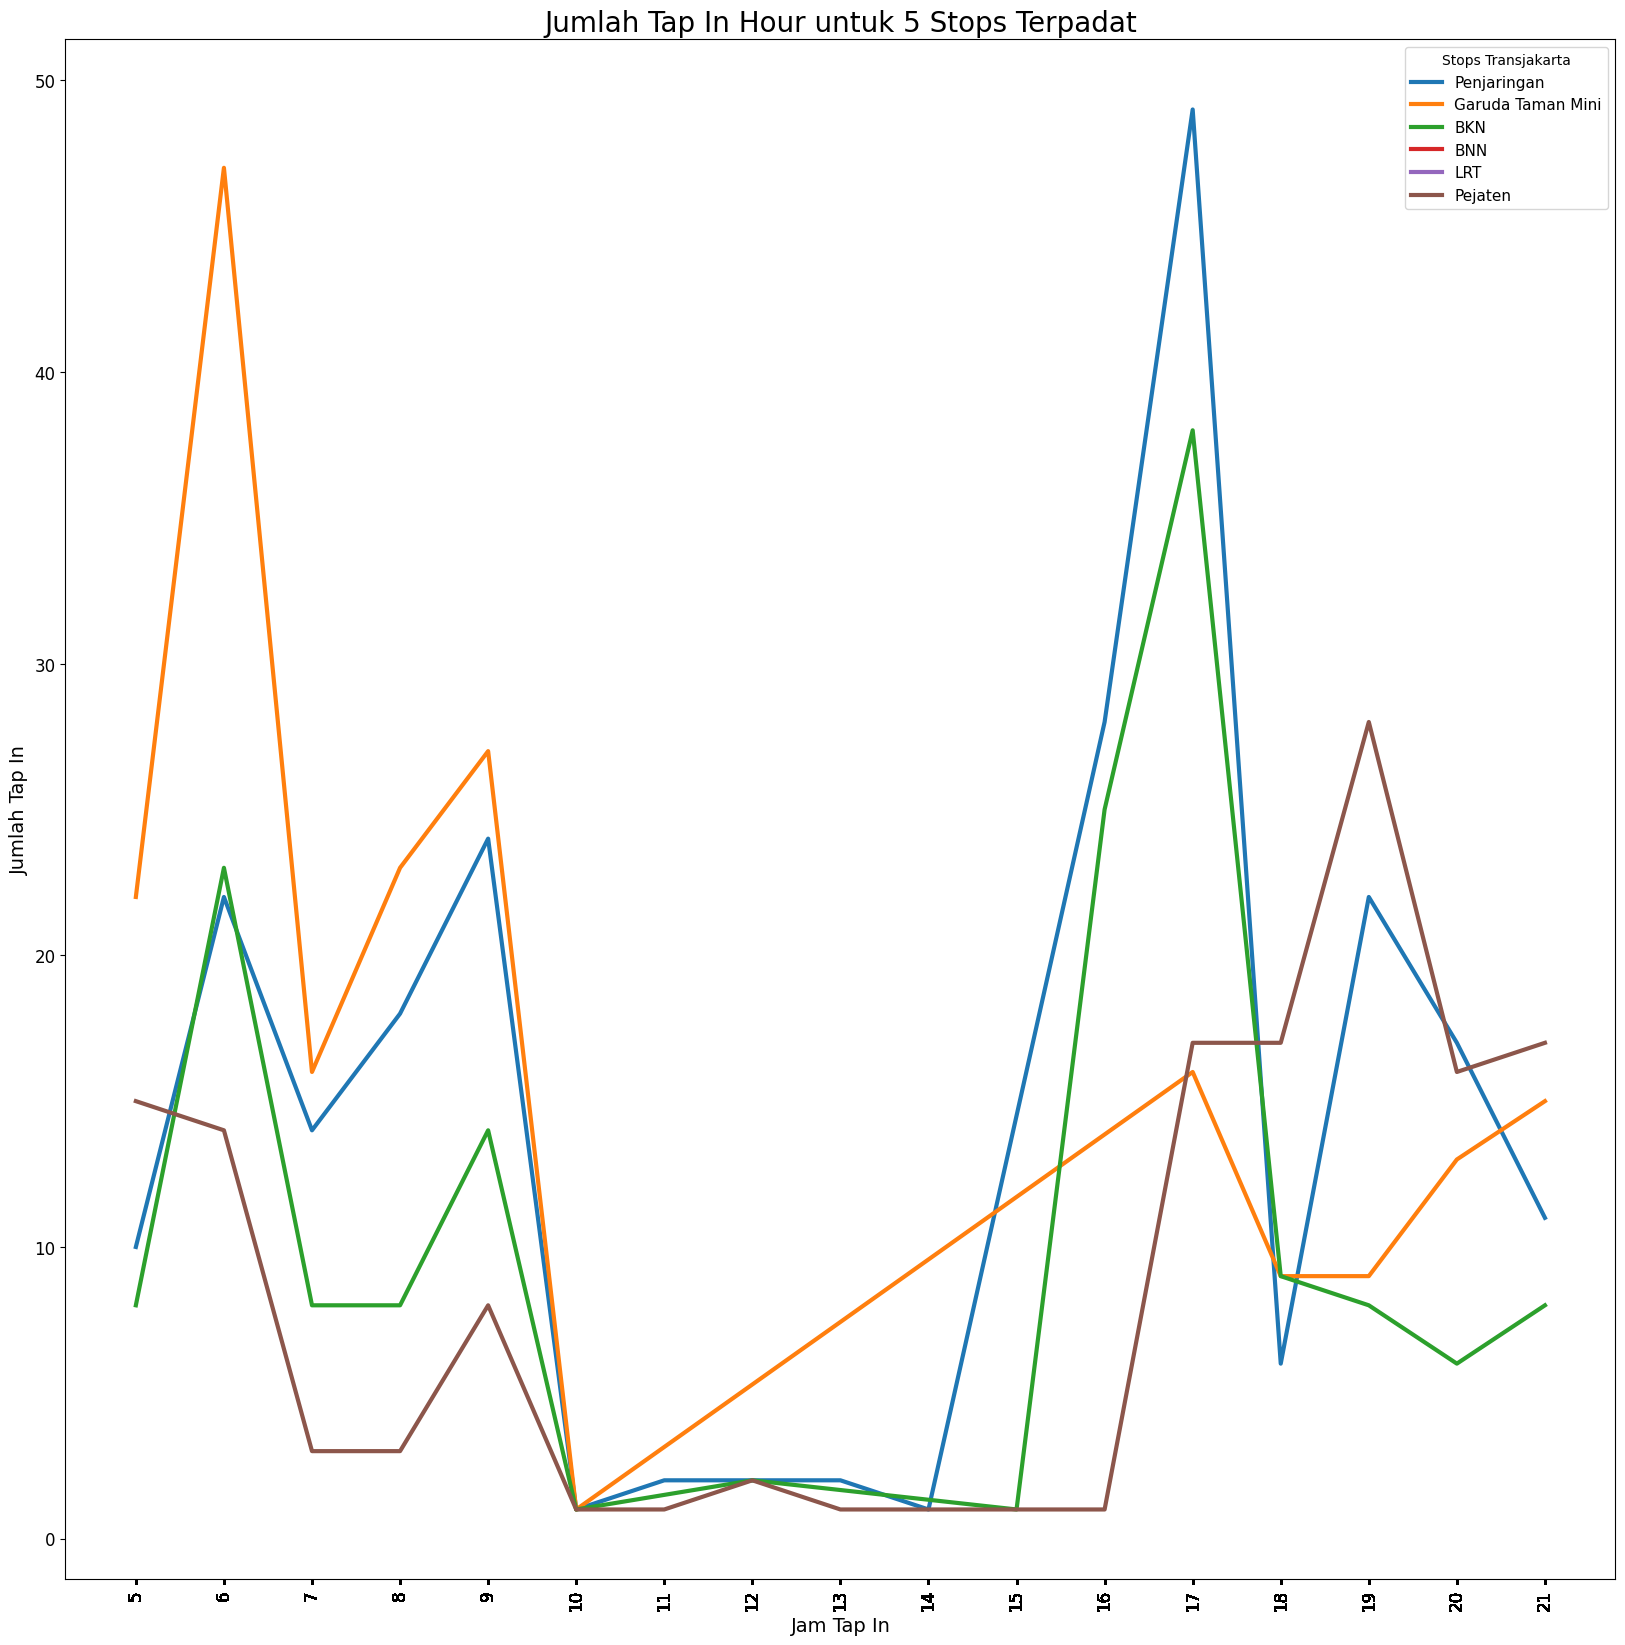

In [111]:
# Create visualisasi line chart
plt.figure(figsize=(20,20))

for stops in stops_padat:
    stops_data = df[df['tapInStopsName']==stops]
    peakHour = stops_data['tapInHour'].value_counts().sort_index()

    plt.plot(peakHour.index, peakHour.values, label=stops,linewidth=3)

plt.xlabel('Jam Tap In',fontsize=14)
plt.ylabel('Jumlah Tap In',fontsize=14)
plt.title('Jumlah Tap In Hour untuk 5 Stops Terpadat', size=20)
plt.xticks(df['tapInHour'],rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Stops Transjakarta', loc='upper right', fontsize=11)
plt.show()

Berdasarkan stops terpadat, jumlah penumpang yang mulai masuk (tap in) ke stops tersebut terjadi di jam 6 pagi dan 5 sore. Hasil analisa ini juga mendukung analisa kita sebelumnya bahwa peak hour terjadi di jam 6 pagi dan 5 sore dimana mobilisasi masyarakat meningkat.

### *Rata-rata Waktu Perjalanan*

Pada bagian ini, kita akan melihat berapa lama waktu yang dibutuhkan untuk melakukan 1x perjalanan menggunakan Transjakarta 

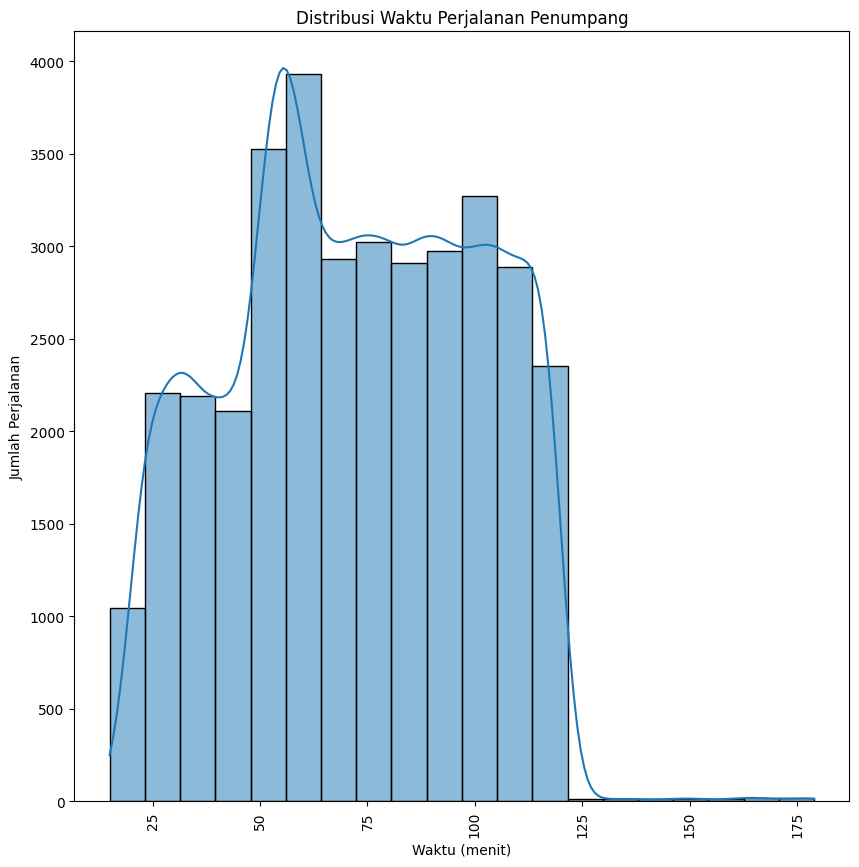

In [112]:
# Create visualisasi histogram
plt.figure(figsize=(10,10))

sns.histplot(df['timeDifference'],bins=20,kde=True)
sns.color_palette('tab10')
plt.title('Distribusi Waktu Perjalanan Penumpang')
plt.xlabel('Waktu (menit)')
plt.ylabel('Jumlah Perjalanan')
plt.xticks(rotation=90)
plt.show()

Jika melihat grafik persebaran waktu perjalanan di atas, kita bisa temukan puncak (peak) waktu perjalanan berada di rentang 50-60 menit. Dengan kata lain, sebagian besar perjalanan memakan waktu 50-60 menit.

Kemudian, karena persebaran data ini tidak terdistribusi normal dimana bentuk histogram cenderung right-skewed, maka untuk mendapatkan gambaran tengah dari distribusi ini, kita akan menggunakan median 

In [113]:
df['timeDifference'].mean()

72.18438416422288

Rata-rata waktu yang dibutuhkan untuk melakukan 1x perjalanan dengan Transjakarta adalah 72 menit. 

### *Waktu Perjalanan vs Banyaknya Stops*

Kita akan mencoba untuk menganalisa apakah ada hubungan antara banyaknya pemberhentian (stops) dengan lama waktu perjalanan. Bagian ini akan meneliti, apakah semakin banyak selisih stops maka semakin lama juga waktu perjalanan yang dibutuhkan

Kita akan menghitung dahulu selisih stops. Hal ini dapat diperoleh dengan melihat pada stops ke berapa perjalanan di mulai dan pada stops ke berapa perjalanan di akhiri. Kemudian, kita baru bisa menganalisa lama waktu perjalanan berdasarkan selisih stops 

In [114]:
# Create dataframe
data = df[['stopStartSeq','stopEndSeq','timeDifference']].reset_index(drop=True)

data['stopDifference'] = data['stopEndSeq'] - data['stopStartSeq']
data['timeDifference'] = data['timeDifference']
data

,stopStartSeq,stopEndSeq,timeDifference,stopDifference
0,7,17.0,52.0,10.0
1,11,32.0,105.0,21.0
2,3,5.0,114.0,2.0
3,0,13.0,26.0,13.0
4,25,34.0,38.0,9.0
...,...,...,...,...
35459,0,1.0,30.0,1.0
35460,2,3.0,64.0,1.0
35461,45,52.0,155.0,7.0
35462,11,13.0,168.0,2.0


Untuk melihat hubungan antara stopDifference dengan timeDifference akan di visualisasi menggunakan scatter plot

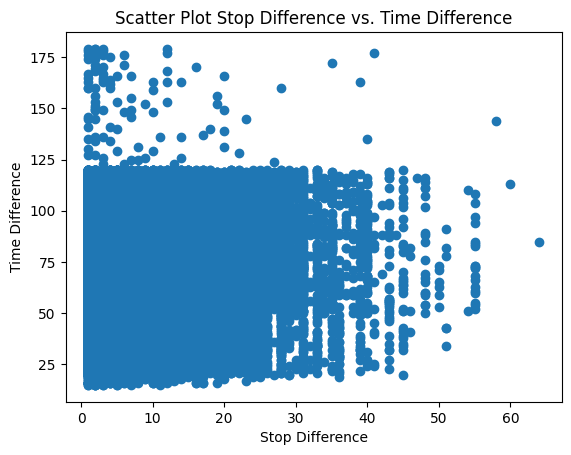

In [115]:
# Create visualisasi
plt.scatter(data['stopDifference'], data['timeDifference'])
plt.xlabel('Stop Difference')
plt.ylabel('Time Difference')
plt.title('Scatter Plot Stop Difference vs. Time Difference')
plt.show()

Berdasarkan scatter plot di atas, dapat disimpulkan bahwa tidak ada hubungan antara lama perjalanan dengan jumlah stops. Untuk memperkuat hasil analisa ini, kita akan hitung nilai korelasi antara keduanya. 

Karena data ini tidak terdistribusi normal, maka kita akan menghitung korelasi dengan Spearman Test

In [116]:
# Calculate korelasi
data[['stopDifference','timeDifference']].corr('spearman')

,stopDifference,timeDifference
stopDifference,1.0000,-0.0053
timeDifference,-0.0053,1.0000


Hasil perhitungan korelasi menunjukkan bahwa nilainya jauh dari 1 yang artinya hubungan keduanya lemah. Meskipun begitu, hubungan antara keduanya bernilai negatif dimana ketika banyak stops meningkat, maka waktu perjalanan menurun. Hubungan yang negatif ini perlu ditinjau kembali, apakah ada faktor lain yang bisa mempengaruhi hubungan keduanya. Misalkan, kita perlu teliti apakah ada jarak antar stops yang jauh atau dekat dan apakah jarak antar stops dapat mempengaruhi waktu perjalanan atau tidak.

### *Weekdays vs Weekend*

Bagian ini akan menganalisa jumlah penumpang berdasarkan hari Weekdays dan Weekend. Weekdays terdiri dari hari Senin-Jumat dan Weekend terdiri dari Sabtu-Minggu. 

In [117]:
# Create dataframe
weekdays_count = df[(df['tapInDays']=='Monday')|
                    (df['tapInDays']=='Tuesday')|
                    (df['tapInDays']=='Wednesday')|
                    (df['tapInDays']=='Thursday')|
                    (df['tapInDays']=='Friday')]['transID'].count()
weekend_count = df[(df['tapInDays']=='Saturday')|
                    (df['tapInDays']=='Sunday')] ['transID'].count()

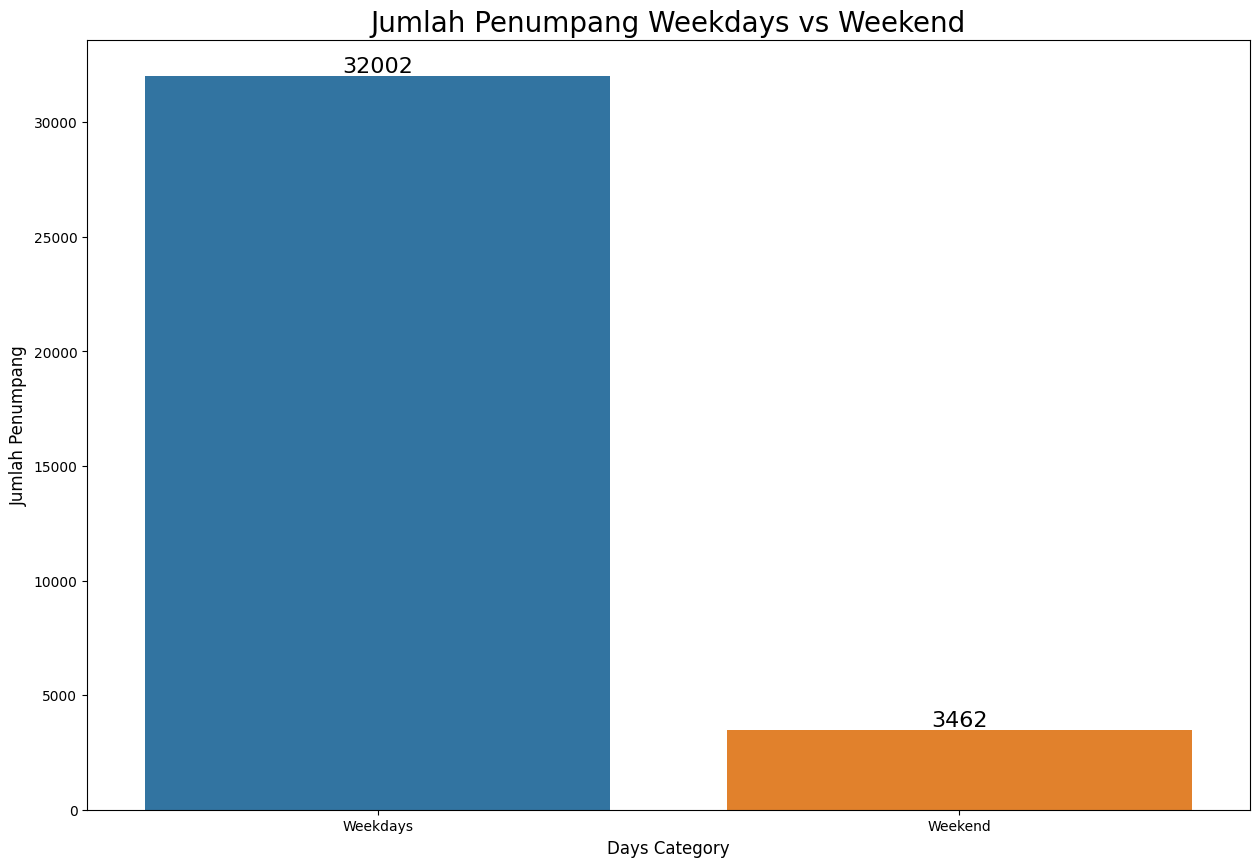

In [118]:
# Create visualisasi
plt.figure(figsize=(15,10))

ax = sns.barplot(x=['Weekdays','Weekend'],y=[weekdays_count,weekend_count])
plt.title('Jumlah Penumpang Weekdays vs Weekend',fontsize=20)
plt.xlabel('Days Category',fontsize=12)
plt.ylabel('Jumlah Penumpang',fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt='%0.0f', label_type='edge', size=16)

plt.show()

Berdasarkan grafik di atas, jumlah penumpang pada hari kerja (weekdays) dengan hari libur (weekend) memiliki gap yang sangat signifikan. Jumlah penumpang pada hari kerja sebanyak 32.002 penumpang, sementara pada hari libur hhanya 3.462 penumpang. 

Kemudian, kita akan lihat jumlah penumpang pada masing-masing hari:

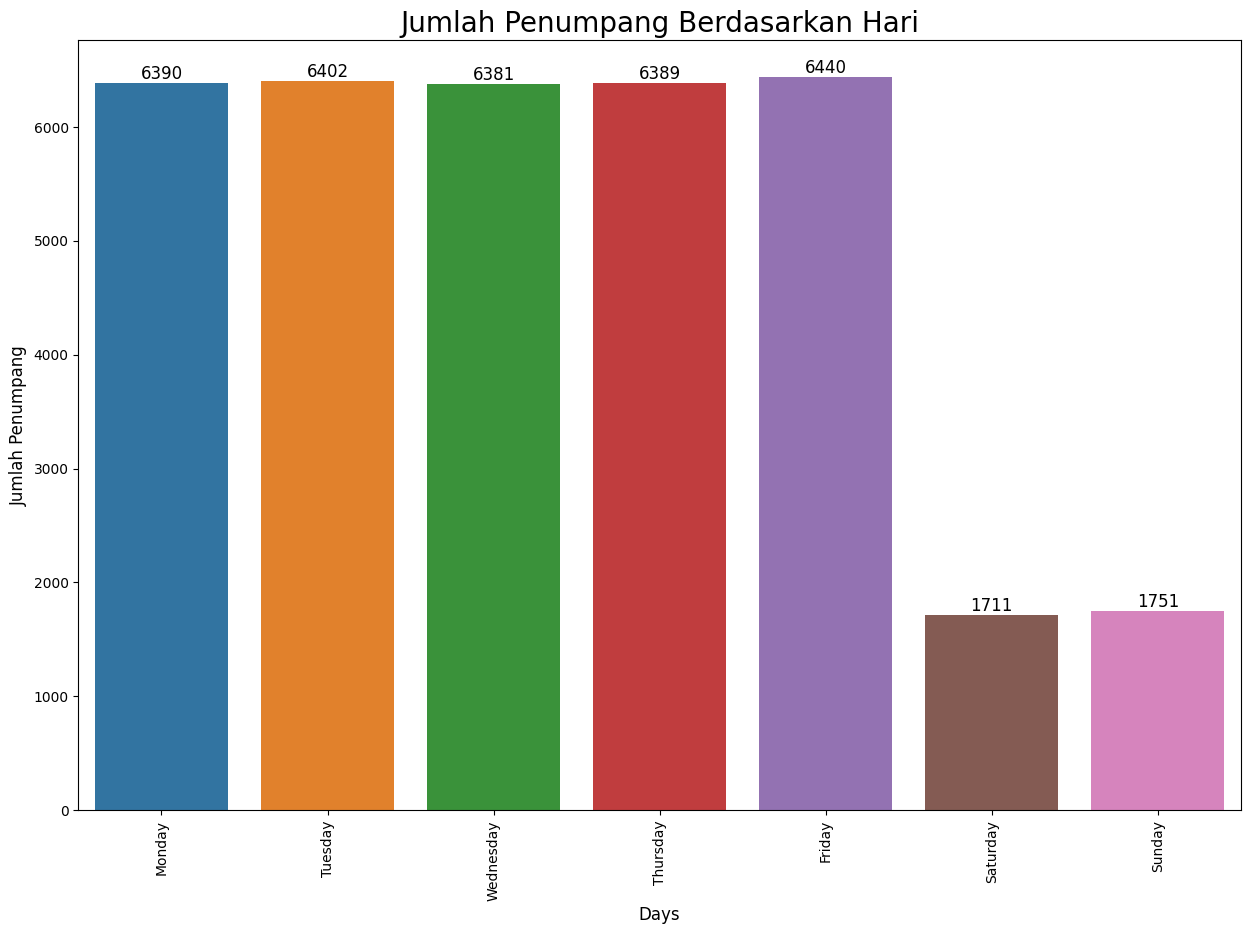

In [119]:
# Urutkan hari terlebih dahulu Monday - Sunday
order_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['tapInDays'] = pd.Categorical(df['tapInDays'], categories=order_days, ordered=True)

# Buat grafik dengan urutan hari yang sudah sesuai
plt.figure(figsize=(15,10))
ax = sns.countplot(data=df,x='tapInDays')
ax.bar_label(ax.containers[0],fmt='%0.0f',label_type='edge', fontsize=12)

# Create visualisasi
plt.title('Jumlah Penumpang Berdasarkan Hari',fontsize=20)
plt.xlabel('Days',fontsize=12)
plt.ylabel('Jumlah Penumpang',fontsize=12)
plt.xticks(rotation=90)
plt.show()

Secara umum, jumlah penumpang pada hari kerja memiliki jumlah yang hampir sama. Hal ini menunjukkan bahwa sebagian besar penumpang Transjakarta merupakan penumpang yang sama yang menggunakan Transjakarta untuk transportasi mereka dalam beraktivitas seperti bekerja. Kemudian, pada hari libur, jumlah penumpang antara hari Sabtu dan Minggu juga hampir sama. Akan tetapi, kita tidak bisa pastikan bahwa penumpang di hari libur merupakan penumpang yang sama. Hal ini dikarenakan pada hari libur tidak ada pengulangan aktivitas seperti bekerja di hari kerja (weekdays).

Untuk memastikan asumsi kita bahwa penumpang Transjakarta di hari kerja adalah mereka yang bekerja, maka kita akan lihat kelompok usia penumpang berdasarkan hari penggunaan Transjakarta. 

### *Kelompok Usia Penumpang Berdasarkan Hari Penggunaan Transjakarta*

Pertama, kita buat cross tabulation antara kelompok usia dengan hari entrance (tap in)

In [120]:
# Create crosstab
crosstab_AgeDays = pd.crosstab(df['ageGroup'],df['tapInDays'])
crosstab_AgeDays

tapInDays,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
ageGroup,,,,,,,
11-17,910,914,904,913,921,260,256
18-24,883,887,895,888,901,248,256
25-31,1178,1175,1168,1186,1192,309,330
32-39,1570,1587,1556,1557,1572,380,396
40-46,910,899,909,900,908,241,243
47-53,491,493,497,500,493,120,122
53-59,324,318,324,323,329,112,94
60-66,53,55,56,49,52,19,24
67-73,33,34,35,33,34,15,18


Kemudian, kita visualisasi dengan menggunakan stacked bar chart seperti di bawah ini:

Text(0, 0.5, 'Count')

<Figure size 1500x1500 with 0 Axes>

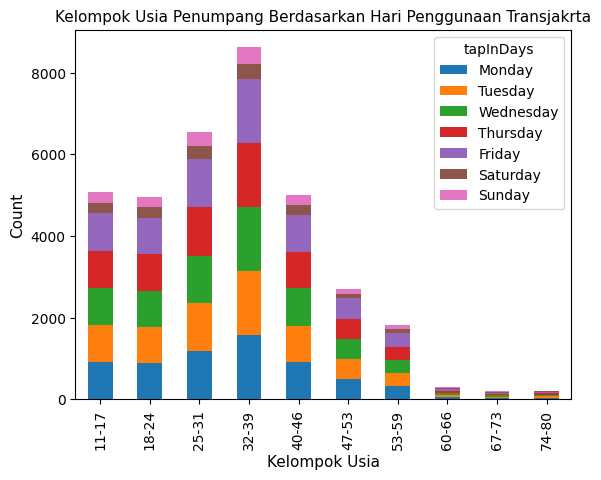

In [121]:
# Create visualisasi
plt.figure(figsize=(15,15))

crosstab_AgeDays.plot(kind='bar',stacked=True)
plt.title('Kelompok Usia Penumpang Berdasarkan Hari Penggunaan Transjakrta',fontsize=11)
plt.xlabel('Kelompok Usia',fontsize=11)
plt.ylabel('Count',fontsize=11)

Grafik di atas menunjukkan bahwa pada hari Senin - Jumat, kelompok usia penumpang Transjakarta adalah mereka yang masih produktif bekerja. Kita bisa lihat bahwa sebagian besar penumpang di hari kerja adalah kelompok usia 25-46 tahun sehingga *insight* ini dapat memvalidasi asuumsi kita sebelumnya bahwa sebagian besar penumpang Transjakarta di hari kerja adalah masyarakat usia produktif. 

## 3| Informasi Penumpang Transjakarta

### *Jenis Kelamin Penumpang*

Berdasarkan analisis ini, kita akan melihat proporsi jenis kelamin pengguna Transjakarta dengan membuat dataframe baru yang terdiri dari jenis kelamin, jumlah penumpang, dan persentase jumlah penumpang

In [122]:
# Create dataframe
customers_sex = df['payCardSex'].value_counts().reset_index()
customers_sex.columns = ['Jenis Kelamin', 'Jumlah Penumpang']
customers_sex['Persentase'] = (customers_sex['Jumlah Penumpang'] / len(df['payCardSex'])) * 100
customers_sex

,Jenis Kelamin,Jumlah Penumpang,Persentase
0,F,18870,53.208888
1,M,16594,46.791112


Dataframe diatas merupakan dataframe perbandingan penumpang wanita dan penumpang pria. Kolom 'Jenis Kelamin' berisi dua kategori, "F" untuk *female* (wanita) dan "M" untuk *male* (pria), yang menunjukkan jenis kelamin dari penumpang-penumpang yang dianalisis.

Setelah membuat dataframe jenis kelamin pengguna Transjakarta, kita akan melakukan visualisasi proporsi jumlah penumpang wanita dan pria dengan menggunakan pie chart

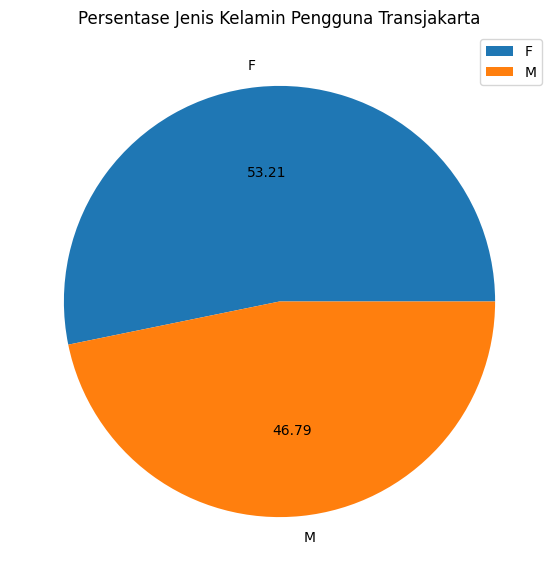

In [123]:
# Create visualsiasi 
plt.figure(figsize=(7,7))
plt.pie(
    x=customers_sex['Persentase'],   
    labels = customers_sex['Jenis Kelamin'],     
    autopct='%.2f',                                         
)
plt.title('Persentase Jenis Kelamin Pengguna Transjakarta')
plt.legend()
plt.show()

Jika dilihat dari chart diatas, proporsi penumpang Wanita lebih besar dibandingkan penumpang Pria. Dalam chart ini, penumpang perempuan sekitar 53.21% dari total penumpang, sedangkan penumpang laki-laki sekitar 46.79%. Perbedaan jumlah penumpang perempuan dan laki-laki ini bisa disebabkan oleh perempuan yang cenderung tidak bisa membawa kendaraan pribadi, memilih untuk menggunakan transportasi umum dalam mobilisasi.

#### **Apakah infrastruktur dan layanan sudah cukup memadai bagi penumpang wanita?**

Banyaknya penumpang wanita dibandingkan laki-laki merupakan *insight* baru yang kita peroleh dari data ini. Oleh karena itu, pihak Transjakarta perlu meninjau kembali layanan dan infrastruktur yang sudah ada agar dapat mengakomodir penumpang wanita lebih baik lagi, terutama ketika sedang dalam peak hour. 

Kemudian, kita akan coba melakukan perbandingkan jenis kelamin penumpang berdasarkan jenis Transjakarta dengan membuat dataframe terpisah.

In [124]:
# Create dataframe
customers_sex_types = df.groupby('jenisTransjakarta')['payCardSex'].value_counts().reset_index()
customers_sex_types.columns = ['Jenis Transjakarta','Jenis Kelamin','Total Penumpang']
customers_sex_types['Persentase'] = customers_sex_types['Total Penumpang'] / (len(df['payCardSex'])) * 100
customers_sex_types.sort_values(by='Total Penumpang',ascending=False).reset_index()
customers_sex_types

,Jenis Transjakarta,Jenis Kelamin,Total Penumpang,Persentase
0,Mikrotrans JakLingko,F,8700,24.531920
1,Mikrotrans JakLingko,M,7258,20.465824
2,Royal Trans,F,893,2.518046
3,Royal Trans,M,753,2.123280
4,Transjakarta,F,9277,26.158922
5,Transjakarta,M,8583,24.202008


Setelah membuat dataframe jenis kelamin penumpang berdasarkan jenis Transjakarta, kita akan melakukan visualisasi proporsinya dengan menggunakan bar chart

In [136]:
# Create pivot table untuk membuat stacked bar
pivot_table = customers_sex_types.pivot(index='Jenis Transjakarta', columns='Jenis Kelamin', values='Total Penumpang')
pivot_table

Jenis Kelamin,F,M
Jenis Transjakarta,,
Mikrotrans JakLingko,8700,7258
Royal Trans,893,753
Transjakarta,9277,8583


<Figure size 1000x1000 with 0 Axes>

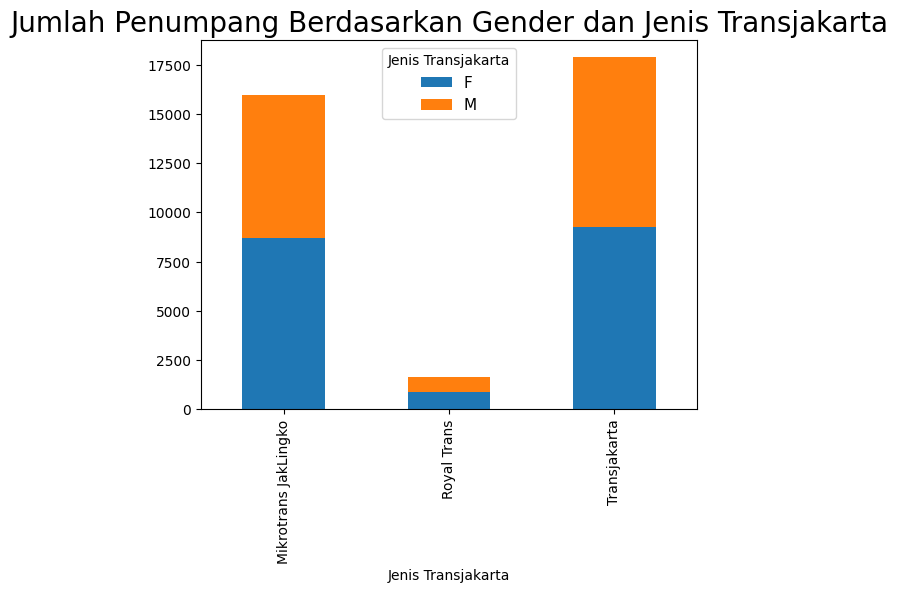

In [138]:
# Create visualisasi
plt.figure(figsize=(10,10))

pivot_table.plot(kind='bar', stacked=True)

plt.title('Jumlah Penumpang Berdasarkan Gender dan Jenis Transjakarta',fontsize=20)
plt.legend(title='Jenis Transjakarta',loc='best',fontsize=11)
plt.show()

Melalui visualisasi di atas, kita bisa lihat bahwa penumpang wanita sebagian besar menggunakan Transjakarta dan MikroTrans. Untuk itu, pihak perusahaan dapat lebih memprioritaskan ke dua transportasi tersebut untuk infrastruktur yang lebih memadai bagi penumpang wanita

### *Distribusi Usia Penumpang*

Berdasarkan analisa ini, kita akan melihat persebaran usia penumpang Transjakarta. Selain itu, kita juga dapat memperoleh informasi penumpang Transjakarta paling banyak berasal dari rentang usia berapa

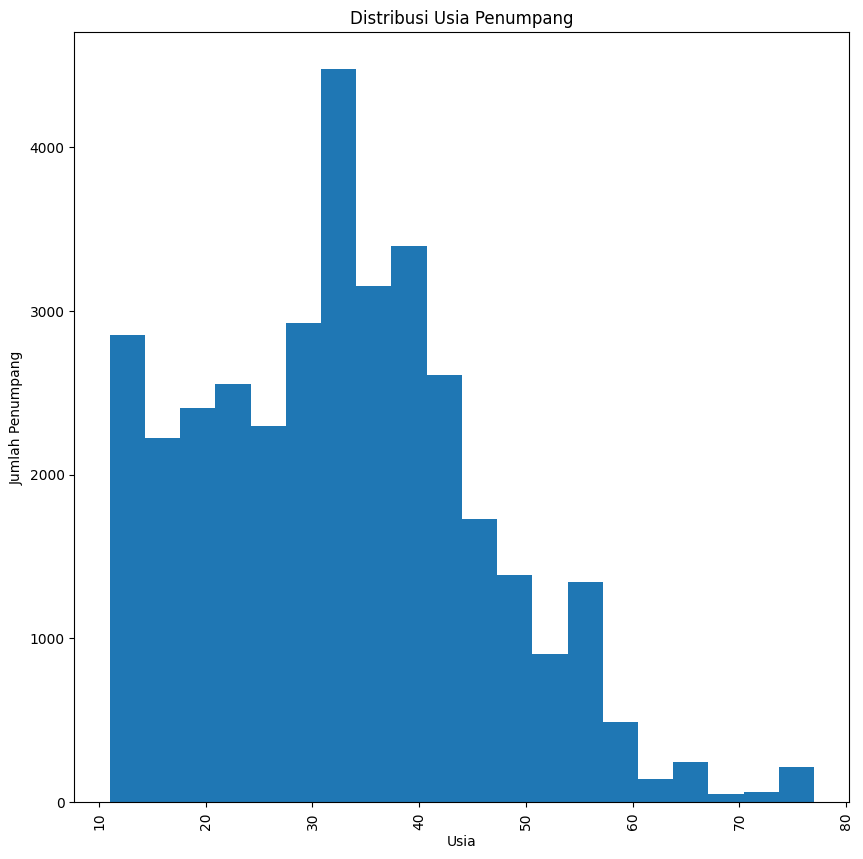

In [126]:
# Create visualisasi
plt.figure(figsize=(10,10))

plt.hist(df['Age'],bins=20)

plt.title('Distribusi Usia Penumpang')
plt.xlabel('Usia')
plt.ylabel('Jumlah Penumpang')
plt.xticks(rotation=90)
plt.show()

Sebagian besar usia penumpang Transjakarta berada di rentang usia produktif yaitu, berkisar diantara usia 25 tahun hingga 45 tahun. Hal ini menandakan bahwa Transjakarta banyak digunakan untuk melakukan perjalanan dari tempat tinggal ke kantor maupun dari kantor ke tempat tinggal. 

#### **Bagaimana dengan penumpang lansia?**
Tidak sedikit lansia yang menggunakan Transjakarta. Sebagaimana dijelaskan sebelumnya, pihak Transjakarta memberlakukan tarif gratis bagi lansia 60 tahun ke atas yang ingin berpergian menggunakan Transjakarta. Apakah lansia benar-benar gratis dalam menggunakan Transjakarta? 

Kita lihat sebagai berikut:

In [127]:
# Check lansia apakah bayar atau tidak
df[(df['ageGroup']=='60-66')| (df['ageGroup']=='67-73') | (df['ageGroup']=='74-80')][['jenisTransjakarta','ageGroup','payAmount']]

,jenisTransjakarta,ageGroup,payAmount
36062,Transjakarta,67-73,3500.0
36862,Transjakarta,67-73,3500.0
36462,Transjakarta,67-73,3500.0
37262,Transjakarta,67-73,3500.0
35662,Transjakarta,67-73,3500.0
...,...,...,...
26564,Transjakarta,60-66,3500.0
30200,Transjakarta,60-66,3500.0
30357,Mikrotrans JakLingko,74-80,0.0
30633,Transjakarta,74-80,3500.0


Ternyata, melalui data ini ditemukan bahwa penumpang lansia tidak dikenakan tarif gratis ketika menggunakan Transjakarta. Temuan ini dapat dijadikan evaluasi untuk kebijakan yang sudah diberlakukan oleh pihak perusahaan serta dijadikan pertimbangan dalam mengoptimalkan operasional dan infrastruktur Transjakarta.  

Selain itu, kita juga akan melakukan visualisasi bagaimana rentang usia pengguna Transjakarta berdasarkan jenis kelaminnya. 

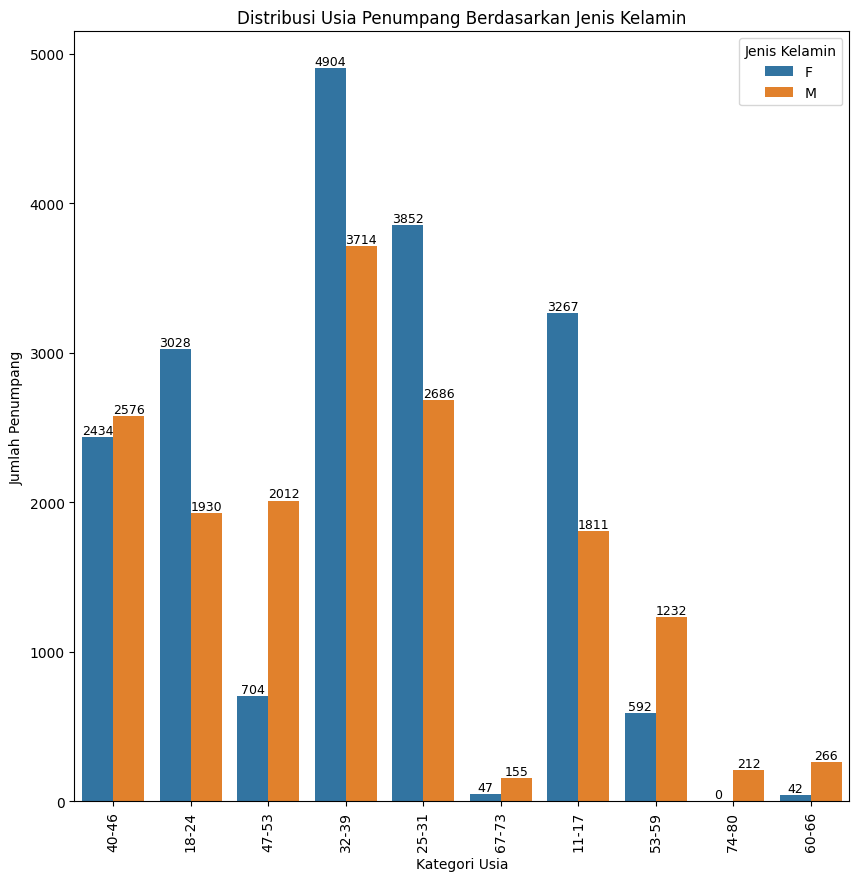

In [128]:
# Create visualisasi
plt.figure(figsize=(10,10))

ax = sns.countplot(data=df,x='ageGroup',hue='payCardSex')

plt.title('Distribusi Usia Penumpang Berdasarkan Jenis Kelamin')
plt.xlabel('Kategori Usia')
plt.ylabel('Jumlah Penumpang')
plt.legend(title='Jenis Kelamin')
plt.xticks(rotation=90)

for i in range(df['payCardSex'].nunique()):
    ax.bar_label(ax.containers[i],fmt='%0.0f',label_type='edge',size=9)

plt.show()

Berdasarkan kategori usia, penumpang Transjakarta paling banyak berada di rentang usia 32-39 tahun dimana penumpang wanita di rentang usia tersebut mendominasi.  

### *Metode Pembayaran Penumpang*

Melalui analisis ini, kita dapat memahami metode pembayaran yang paling banyak dan paling sedikit digunakan oleh penumpang Transjakarta. Dengan demikian, kita dapat menganalisa kemungkinan alasan dibalik penggunaan metode pembayaran tersebut.

Pertama, kita susun dataframe baru mengenai jumlah penumpang yang bertransaksi menggunakan metode pembayaran yang ada.

In [129]:
# Create dataframe
pay_card = df['payCardBank'].value_counts().reset_index()
pay_card.columns = ['Metode Pembayaran','Jumlah Pengguna']
pay_card['Persentase'] = (pay_card['Jumlah Pengguna']) / len(df['payCardBank'])*100 
pay_card

,Metode Pembayaran,Jumlah Pengguna,Persentase
0,dki,17519,49.399391
1,emoney,6447,18.178998
2,brizzi,3290,9.277013
3,flazz,3015,8.501579
4,online,2689,7.582337
5,bni,2504,7.060681


Pada dasarnya, penumpang Transjakarta sudah tidak bisa membayar menggunakan uang tunai sehingga penumpang wajib membayar secara *cashless* dengan kartu elektronik yang dikeluarkan oleh bank. Bank tersebut diantaranya Bank Rakyat Indonesia (brizzi), Bank Central Asia (Flazz), Bank Mandiri (emoney), Bank DKI (dki), serta Bank Negara Indonesia (bni). 

Tidak hanya itu, penumpang juga bisa membayar menggunakan aplikasi "TiJe". Aplikasi ini merupakan inovasi serta bentuk komitmen Transjakarta dalam transformasi digital. Penggunaan aplikasi memungkinkan penumpang untuk membeli tiket dan menggunakan layanan Transjakarta tanpa perlu lagi membawa kartu elektronik. Penumpang cukup bertransaksi di aplikasi dan nantinya akan muncul QRCode yang di scan ketika tap in dan tap out.

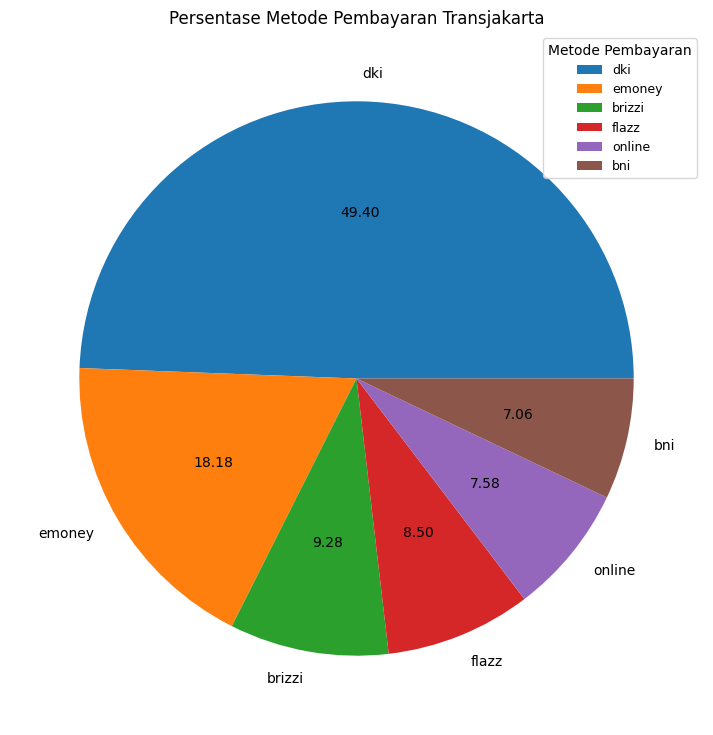

In [130]:
# Create visualisasi
plt.figure(figsize=(9,9))
plt.pie(
    x=pay_card['Persentase'],   
    labels = pay_card['Metode Pembayaran'],
    autopct='%.2f',                                         
)
plt.title('Persentase Metode Pembayaran Transjakarta')
plt.legend(title='Metode Pembayaran',fontsize="9",loc='best')
plt.show()

Dari grafik diatas, hampir separuh dari pengguna Transjakarta menggunakan kartu DKI sebagai metode pembayaran dengan persentase sebesar 49.40%. Kemudian, diikuti oleh kartu E-money sebesar 18.2% dari total pengguna dan disusul oleh kartu Brizzi, Flazz, Online (aplikasi TiJe), dan kartu elektronik dari BNI.

Maka dari itu, kita dapat disimpulkan bahwa metode "dki" adalah yang paling populer dimana metode tersebuh digunakan oleh hampir separuh pengguna. Sementara metode "bni" atau kartu elektronik dari BNI merupakan metode yang paling tidak populer di kalangan penumpang Transjakarta. 

In [131]:
# Create dataframe
pay_card_sex = df.groupby('payCardSex')['payCardBank'].value_counts().reset_index()
pay_card_sex.columns = ['Jenis Kelamin','Metode Pembayaran','Jumlah Pengguna']
pay_card_sex

,Jenis Kelamin,Metode Pembayaran,Jumlah Pengguna
0,F,dki,8919
1,F,emoney,3807
2,F,flazz,1707
3,F,brizzi,1697
4,F,bni,1430
5,F,online,1310
6,M,dki,8600
7,M,emoney,2640
8,M,brizzi,1593
9,M,online,1379


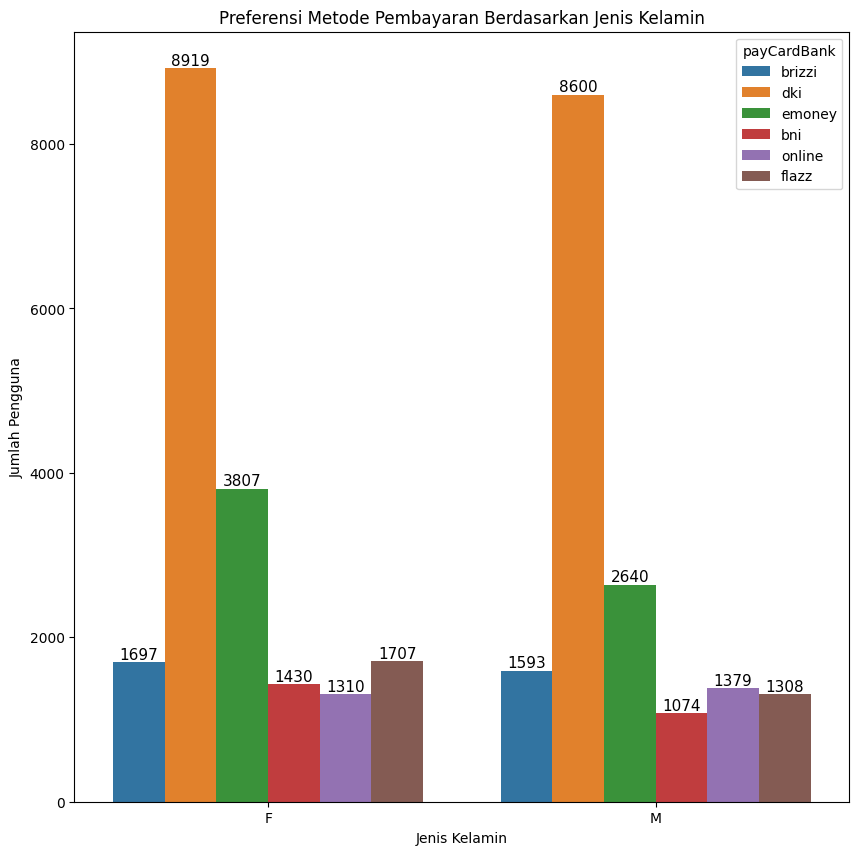

In [132]:
# Create visualisasi
plt.figure(figsize=(10,10))

ax = sns.countplot(data=df,
              x='payCardSex',
              hue='payCardBank')
for i in range(df['payCardBank'].nunique()):
    ax.bar_label(ax.containers[i],fmt='%0.0f',label_type='edge',size=11)
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Pengguna')
plt.title('Preferensi Metode Pembayaran Berdasarkan Jenis Kelamin')
plt.show()

Grafik diatas memberikan gambaran mengenai preferensi pengguna dalam hal metode pembayaran berdasarkan jenis kelamin. Dari grafik di atas, kita dapat melihat bagaimana penggunaan metode pembayaran berbeda antara jenis kelamin. Pada jenis kelamin wanita (F), metode pembayaran yang paling populer adalah "dki" dengan 8.919 pengguna, diikuti oleh "emoney" dengan 3.807 pengguna. Sedangkan pada jenis kelamin pria (M), "dki" juga mendominasi dengan 8.600 pengguna, sementara "emoney" digunakan oleh 2.640 pengguna. Perempuan juga cenderung lebih banyak menggunakan metode "flazz," "brizzi," "bni," dan "online" dibandingkan laki-laki.

### *Metode Pembayaran Berdasarkan Kelompok Usia*

Bagian ini akan membahas hubungan antara dua variabel kategorikal yaitu, kelompok usia dengan metode pembayaran. Kita akan melihat metode pembayaran apa yang digunakan oleh masing-masing kelompok usia penumpang Trannsjakarta

In [133]:
# Create crosstab
crosstab_GenderCard = pd.crosstab(df['payCardBank'],df['ageGroup'])
crosstab_GenderCard

ageGroup,11-17,18-24,25-31,32-39,40-46,47-53,53-59,60-66,67-73,74-80
payCardBank,,,,,,,,,,
bni,470,423,268,766,385,56,127,8,1,0
brizzi,437,441,648,686,700,238,91,0,14,35
dki,2155,2660,3366,4161,2376,1384,970,169,109,169
emoney,1207,955,1140,1332,832,589,318,34,36,4
flazz,408,256,723,774,416,201,147,49,41,0
online,401,223,393,899,301,248,171,48,1,4


Kita akan visualisasi mengguunakan stacked bar chart sebagai berikut:

<Figure size 1500x1500 with 0 Axes>

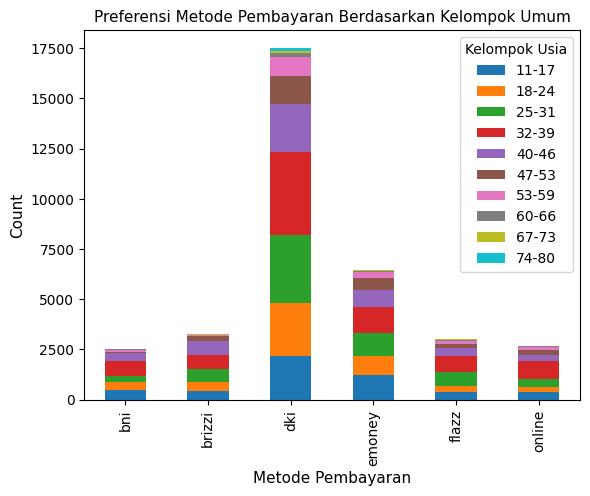

In [134]:
# Create visualisasi
plt.figure(figsize=(15,15))

crosstab_GenderCard.plot(kind='bar',stacked=True)
plt.title('Preferensi Metode Pembayaran Berdasarkan Kelompok Umum',fontsize=11)
plt.xlabel('Metode Pembayaran',fontsize=11)
plt.ylabel('Count',fontsize=11)
plt.legend(title='Kelompok Usia')

Secara umum, grafik diatas menunjukkan bahwa bank DKI adalah metode pembayaran yang paling diminati oleh seluruh kelompok usia penumpang. Kemudian, kita juga bisa lihat bahwa metode pembayaran online masih minim digunakan oleh masyarakat. Kemudian, metode pembayaran online masih relatif sedikit yang menggunakannya. Hal ini kemungkinan terjadi karena metode pembayaran online masih relatif baru sehingga belum banyak masyarakat yang mengetahui adanya metode pembayaran ini. 

## **Conclusion**

Analisis yang dilakukan didasari oleh masalah utama yang sudah kita tetapkan pada awal EDA yaitu,mengevaluasi dan meningkatkan efektivitas operasional serta infrastruktur Transjakarta. Data analysis yang dilakukan dibagi ke dalam 3 sub-topic yaitu, Informasi Perjalanan, Informasi Waktu Perjalanan, dan Informasi Penumpang Transjakarta. Berikut merupakan kesimpulan mengenai *insight* yang ditemukan:

1. **Informasi Perjalanan**
    - Transjakarta memiliki **217 rute perjalanan** dimana Bus Transjakarta memiliki 107 rute, Angkot JakLingko 100 rutee, dan Royal Trans 10 rute
    - **5 rute terpadat** adalah Cibubur - Balai Kota, Ciputat - CSW, Harmoni - Jakarta International Stadium, Pulo Gadung - Monas, dan Kampung Rambutan - Pondok Gede
        - 5 rute ini merupakan **rute dari daerah suburban ke tengah kota Jakarta** yang menunjukkan bahwa seluruh kegiatan masyarakat berpusat di tengah kota Jakarta
    - Terdapat perbedaan jumlah tempat masuk (tap in stops) dengan tempat keluar (tap out stops) karena rute Transjakarta ada yang memiliki lebih banyak dan lebih sedikit tap in dan tap out. 
    - Penumpang paling banyak masuk (tap in) di halte Penjaringan (229 transaksi), Garuda Taman Mini (198 transaksi), halte BKN (159 transaksi), halte BNN LRT (145 transaksi), dan halte Pejaten (144 transaksi).
    - Penumpang paling banyak keluar (tap out) di halte BKN  (302 transaksi), Penjaringan (264 transaksi), Term. Senen (188 transaksi), halte Monas dan halte Term. Kampung Rambutan (158 transaksi). 
    - **Penyebab stops yang padat adalah banyaknya koridor/rute perjalanan yang melewati stops tersebut.**
2. **Informasi Waktu Perjalanan**
    - **Peak hour terjadi di jam 6 pagi dan 5 sore**
    - Rata-rata waktu 1x perjalanan dengan Transjakarta adalah **72 menit**
    - Tidak ada hubungan antara lama perjalanan dengan jumlah stops yang dilewati
    - Jumlah penumpang pada hari kerja (32.002 penumpang) lebih besar dibandingkan hari libur (3.462 penumpang).
    - Sebagian besar penumpang di hari kerja adalah kelompok usia 25-46 tahun (usia produktif).
3. **Informasi Penumpang Transjakarta**
    - **Proporsi penumpang wanita sebesar 53.21%** dari total penumpang
    - Proporsi penumpang laki-laki sebesar 46.79%  dari total penumpang
    - Usia penumpang Transjakarta berada di rentang usia produktif yaitu, berkisar diantara usia 25 tahun hingga 45 tahun
    - Terdapat **penumpang lansia** yang menggunakan Transjakarta dimana seharusnya penumpang lansia diberikan tarif gratis, tetapi realitanya masih ada yang membayar sesuai dengan tarif yang ditetapkan 
    -  Hampir separuh dari pengguna Transjakarta menggunakan kartu DKI sebagai metode pembayaran dengan persentase sebesar 49.40% dari total pengguna
    - **Metode pembayaran online masih relatif sedikit digunakan** dengan proporsi 7.58% dari total pengguna


# Recommendation
---

Setelah melakukan analisis dataset, kita menemukan banyak *insights* yang sekiranya dapat membantu kita dalam menjawab masalah utama Direktur Pelayanan & Bisnis PT TransJakarta. Melalui *insights* tersebut, terdapat beberapa rekomendasi yang sekiranya dapat membantu dalam pengambilan keputusan. 

Adapun masalah yang ingin dijawab adalah **Bagaimana langkah-langkah yang dapat diambil oleh Direktur Pelayanan & Bisnis PT Transportasi Jakarta dalam rangka mengoptimalisasi operasional Transjakarta?**

Berikut adalah rekomendasi yang dapat dilakukan:
1. **Optimasi Jaringan Rute**
    - Rute-rute yang padat dapat ditinjau kembali apakah operasional sudah efisien atau belum. Berdasarkan analisis data, pihak TransJakarta dapat **menambah armada bus** untuk rute-rute tersebut dengan **mengurangi atau menghapus rute yang tidak efisien.** 
        - Hal tersebut dapat di evaluasi dengan melihat jumlah penumpang di setiap rute-rute tersebut. Jumlah penumpang yang relatif sedikit perlu di evaluasi kembali, seperti apakah ada rute alternatif lainnya yang lebih diminati oleh para penumpang. Dari situ, pihak perusahaan dapat meninjau kembali efektivitas rute perjalanan agar bisa memindahkan armada bus dari rute yang sepi ke rute yang padat. 
    - **Evaluasi konektivitas rute**
        - Sebagian besar rute yang ada adalah untuk menghubungkan daerah suburban ke pusat kota Jakarta seperti Ragunan - Monas, Lebak Bulus - Pasar Baru, Bekasi Timur - Grogol. Rute-rute ini lah yang banyak penumpangnya sehingga pihak perusahaan dapat menambah konektivitas rute melalui stops/halte yang berada di area yang banyak aktivitas masyarakat. Artinya, penambahan konektivitas rute perlu disesuaikan dengan lokasi halte yang memang **bisa dijangkau masyarakat dari berbagai daerah.** 
        - Konektivitas rute dan integrasi transportasi umum dapat ditinjau melalui waktu tunggu terlalu lama di halte-halte yang padat penumpang. Selain itu, **halte yang berada di dekat area komersial, perkantoran, atau permukiman padat penduduk besar** kemungkinan membutuhkan integrasi transportasi yang lebih tinggi
2. **Jadwal Perjalanan**
    - Analisis ini menemukan bahwa peak hour terjadi di jam 6 pagi dan 5 sore. Seperti yang kita tahu bahwa kedua waktu ini merupakan waktu dimana lalu lintas sedang padat. Untuk itu, demi meningkatkan operasional Transjakarta, pihak perusahaan perlu **mengevaluasi jadwal perjalanan Transjakarta**, khususnya rute-rute yang banyak diminati seperti Ciputat-CSW. Rute ini adalah salah satu rute terpadat karena halte CSW merupakan halte untuk melakukan transit ke rute lainnya. Oleh sebab itu, untuk mengakomodasi peningkatan penumpang, pihak TransJakarta sebaiknya **membagi pusat transit ke halte lainnya** dengan meninjau kefektifan rute perjalanan. 
    - **Infrastruktur jalur khusus Transjakarta (busway) sudah mulai berkurang**, khususnya di daerah-daerah suburban. Kebanyakan jalur busway gabung dengan jalan umum sehinggga waktu perjalanan kurang efisien. Maka dari itu, sebaiknya pihak Transjakarta memperbaiki jalur khusus busway agar perjalanan Transjakarta tidak terganggu oleh kemacetan. Dengan begitu, operasional Transjakarta menjadi lebih optimal lagi
    - Tidak hanya itu, kendaraan roda dua dan roda empat banyak sekali yang melanggar aturan dan melintas di jalur khusus (busway). Hal tersebut menyebabkan waktu perjalanan Transjakarta terhambat. Meskipun sudah diberikan palang "Dilarang masuk kecuali bus TransJakarta", masih banyak yang menghiraukan palang tersebut dan tetap melintas di dalam busway. Oleh sebab itu, sebaiknya **pemerintah ikut andil dalam menertibkan pelanggaran busway**, salah satunya adalah dengan lebih **menegaskan tilang elektronik lagi.**
3. **Kepadatan Stops**
    - Pihak TransJakarta perlu memperluas dan **menambah layanan fasilitas untuk halte-halte yang cenderung padat penumpang** seperti menambah machine tap untuk masuk dan keluar agar tidak mengantri panjang, menyediakan kursi tunggu khusus untuk Lansia, disabilitas, maupun ibu hamil. 
    - Karena masih ada penumpang lansia serta banyaknya penumpang wanita yang menggunakan Transjakarta, pihak perusahaan sebaiknya meninjau kembali infrastruktur di halte-halte. Hal ini dapat dilakukan dengan bekerja sama oleh para pekerja di halte Transjakarta. Mereka **diberi pelatihan dan penyuluhan** kembali mengenai bagaimana memprioritaskan lansia dan ibu hamil untuk memperoleh kursi duduk di dalam bus dan menuntun mereka agak tidak perlu desak-desakan antri menggunakan Transjakarta. 
4. **Tarif untuk Lansia**
    - **Secara tegas mengimplementasi kebijakan tarif gratis** untuk lansia sesuai dengan regulasi yang ada
    - Mengedukasi para pekerja Transjakarta untuk lebih aktif dan peduli terhadap penumpang lansia yang ingin menggunakan Transjakarta, membantu mereka untuk mengantarkan ke loket yang ada di halte-halte Transjakarta agar memperoleh tiket gratis
5. **Promosi Metode Pembayaran Online**
    - Lakukan **kampanye promosi** untuk mendorong penggunaan metode pembayaran online yang masih relatif rendah saat ini. 
        - Hal ini dapat dilakukan dengan bekerjasama dengan para *influencer* dan *content creator* untuk melakukan promosi bayar pakai aplikasi online untuk menggunakan Transjakarta. Berikan *referral code* bagi penumpang yang ingin membeli tiket via online agar mendapatkan potongan harga. 
    - Memberikan jalur khusus untuk QR Scan di setiap halte agar penumpang tertarik untuk menggunakan metode pembayaran online dan tidak perlu antri seperti membayar menggunakan kartu elektronik
6. **Promosi Hari Libur**
    - Implementasi **tarif diskon atau penawaran khusus** unuk meningkatkan jumlah penumpang di hari libur. Misalkan ketika sedang ada ajang olahraga seperti olimpiade atau ASEAN Games, atau Jakarta Fair, penumpang yang menggunakan Transjakarta di hari Sabtu-Minggu akan diberikan potongan harga. 

# **TABLEAU**

Akses untuk tableau story dan dashboard bisa klik [Tableau Analysis](https://public.tableau.com/views/Transjakarta_CapstoneModule2/HasilAnalisis?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link). Pada story Tableau akan ada visualisasi lengkap mengenai hasil analisis dan *findings* serta **dashboard** untuk para stakeholders